In [1]:
import torchreid

In [2]:
datamanager = torchreid.data.ImageDataManager(
    root="reid-data",
    sources="market1501",
    targets="market1501",
    height=256,
    width=128,
    batch_size_train=32,
    batch_size_test=100,
    transforms=["random_flip", "random_crop"]
)

Building train transforms ...
+ resize to 256x128
+ random flip
+ random crop (enlarge to 288x144 and crop 256x128)
+ to torch tensor of range [0, 1]
+ normalization (mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
Building test transforms ...
+ resize to 256x128
+ to torch tensor of range [0, 1]
+ normalization (mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
=> Loading train (source) dataset
=> Loaded Market1501
  ----------------------------------------
  subset   | # ids | # images | # cameras
  ----------------------------------------
  train    |   751 |    12936 |         6
  query    |   750 |     3368 |         6
  gallery  |   751 |    15913 |         6
  ----------------------------------------
=> Loading test (target) dataset


/home/amirali/Desktop/Files/win/All Desktop/deep-person-reid-master/torchreid/data/datasets/image/market1501.py:37: UserWarning: The current data structure is deprecated. Please put data folders such as "bounding_box_train" under "Market-1501-v15.09.15".
  warnings.warn(


=> Loaded Market1501
  ----------------------------------------
  subset   | # ids | # images | # cameras
  ----------------------------------------
  train    |   751 |    12936 |         6
  query    |   750 |     3368 |         6
  gallery  |   751 |    15913 |         6
  ----------------------------------------


  **************** Summary ****************
  source            : ['market1501']
  # source datasets : 1
  # source ids      : 751
  # source images   : 12936
  # source cameras  : 6
  target            : ['market1501']
  *****************************************




In [3]:
model = torchreid.models.build_model(
    name="resnet101",
    num_classes=datamanager.num_train_pids,
    loss="softmax",
    pretrained=True
)

model = model.cuda()

optimizer = torchreid.optim.build_optimizer(
    model,
    optim="adam",
    lr=0.0003
)

scheduler = torchreid.optim.build_lr_scheduler(
    optimizer,
    lr_scheduler="single_step",
    stepsize=20
)

In [4]:
engine = torchreid.engine.ImageSoftmaxEngine(
    datamanager,
    model,
    optimizer=optimizer,
    scheduler=scheduler,
    label_smooth=True
)

In [5]:
engine.run(
    save_dir="log3/resnet101",
    max_epoch=120,
    eval_freq=10,
    print_freq=10,
    test_only=False
)

=> Start training
epoch: [1/120][10/404]	time 0.202 (9.842)	data 0.000 (0.252)	eta 5 days, 12:30:41	loss 7.0360 (6.8105)	acc 3.1250 (0.3125)	lr 0.000300
epoch: [1/120][20/404]	time 0.208 (5.097)	data 0.007 (0.200)	eta 2 days, 20:36:37	loss 6.5981 (6.8370)	acc 0.0000 (1.0938)	lr 0.000300
epoch: [1/120][30/404]	time 0.728 (3.547)	data 0.525 (0.215)	eta 1 day, 23:44:27	loss 6.6021 (6.7914)	acc 0.0000 (0.8333)	lr 0.000300
epoch: [1/120][40/404]	time 0.202 (2.731)	data 0.000 (0.182)	eta 1 day, 12:45:00	loss 6.6676 (6.7483)	acc 0.0000 (1.0156)	lr 0.000300
epoch: [1/120][50/404]	time 0.202 (2.254)	data 0.000 (0.174)	eta 1 day, 6:19:36	loss 6.5514 (6.7196)	acc 0.0000 (0.8125)	lr 0.000300
epoch: [1/120][60/404]	time 0.203 (1.935)	data 0.000 (0.168)	eta 1 day, 2:01:39	loss 6.4978 (6.6923)	acc 0.0000 (0.6771)	lr 0.000300
epoch: [1/120][70/404]	time 0.202 (1.704)	data 0.000 (0.161)	eta 22:54:51	loss 6.5424 (6.6736)	acc 0.0000 (0.6696)	lr 0.000300
epoch: [1/120][80/404]	time 0.203 (1.538)	data 0.00

epoch: [2/120][250/404]	time 0.206 (0.207)	data 0.000 (0.001)	eta 2:45:20	loss 4.2417 (4.6843)	acc 12.5000 (15.6250)	lr 0.000300
epoch: [2/120][260/404]	time 0.203 (0.208)	data 0.000 (0.001)	eta 2:45:22	loss 4.0522 (4.6612)	acc 21.8750 (16.0337)	lr 0.000300
epoch: [2/120][270/404]	time 0.205 (0.207)	data 0.000 (0.001)	eta 2:45:14	loss 4.0274 (4.6472)	acc 25.0000 (16.2847)	lr 0.000300
epoch: [2/120][280/404]	time 0.203 (0.207)	data 0.000 (0.001)	eta 2:45:10	loss 4.0316 (4.6228)	acc 34.3750 (16.6741)	lr 0.000300
epoch: [2/120][290/404]	time 0.210 (0.207)	data 0.000 (0.001)	eta 2:45:07	loss 4.1775 (4.6027)	acc 28.1250 (17.0797)	lr 0.000300
epoch: [2/120][300/404]	time 0.205 (0.207)	data 0.000 (0.001)	eta 2:45:00	loss 4.2783 (4.5819)	acc 31.2500 (17.5000)	lr 0.000300
epoch: [2/120][310/404]	time 0.203 (0.207)	data 0.000 (0.001)	eta 2:45:06	loss 3.8469 (4.5617)	acc 31.2500 (17.7823)	lr 0.000300
epoch: [2/120][320/404]	time 0.205 (0.207)	data 0.000 (0.001)	eta 2:44:59	loss 3.6325 (4.5405)	ac

epoch: [4/120][90/404]	time 0.203 (0.207)	data 0.000 (0.001)	eta 2:42:47	loss 2.6220 (2.5078)	acc 56.2500 (63.9583)	lr 0.000300
epoch: [4/120][100/404]	time 0.203 (0.207)	data 0.000 (0.001)	eta 2:42:29	loss 2.4134 (2.5138)	acc 75.0000 (64.0312)	lr 0.000300
epoch: [4/120][110/404]	time 0.203 (0.206)	data 0.000 (0.001)	eta 2:42:12	loss 2.5764 (2.4984)	acc 68.7500 (64.6307)	lr 0.000300
epoch: [4/120][120/404]	time 0.203 (0.206)	data 0.000 (0.001)	eta 2:41:57	loss 2.2708 (2.4854)	acc 75.0000 (65.1042)	lr 0.000300
epoch: [4/120][130/404]	time 0.205 (0.206)	data 0.000 (0.001)	eta 2:41:47	loss 2.5122 (2.4820)	acc 65.6250 (65.0000)	lr 0.000300
epoch: [4/120][140/404]	time 0.209 (0.206)	data 0.000 (0.001)	eta 2:41:55	loss 2.4715 (2.4777)	acc 59.3750 (65.2232)	lr 0.000300
epoch: [4/120][150/404]	time 0.204 (0.206)	data 0.000 (0.001)	eta 2:41:51	loss 2.8390 (2.4772)	acc 62.5000 (65.0833)	lr 0.000300
epoch: [4/120][160/404]	time 0.203 (0.206)	data 0.000 (0.001)	eta 2:41:41	loss 3.1954 (2.4759)	acc

epoch: [5/120][330/404]	time 0.205 (0.205)	data 0.000 (0.001)	eta 2:39:05	loss 2.1137 (2.0981)	acc 78.1250 (75.8996)	lr 0.000300
epoch: [5/120][340/404]	time 0.206 (0.205)	data 0.000 (0.001)	eta 2:39:04	loss 1.8373 (2.0972)	acc 81.2500 (75.9007)	lr 0.000300
epoch: [5/120][350/404]	time 0.206 (0.205)	data 0.000 (0.001)	eta 2:39:03	loss 2.0227 (2.0975)	acc 75.0000 (75.8839)	lr 0.000300
epoch: [5/120][360/404]	time 0.205 (0.205)	data 0.000 (0.001)	eta 2:39:02	loss 2.0496 (2.0950)	acc 84.3750 (75.9983)	lr 0.000300
epoch: [5/120][370/404]	time 0.206 (0.205)	data 0.000 (0.000)	eta 2:39:01	loss 2.3367 (2.0961)	acc 71.8750 (75.9797)	lr 0.000300
epoch: [5/120][380/404]	time 0.204 (0.205)	data 0.000 (0.000)	eta 2:38:59	loss 2.1598 (2.0940)	acc 68.7500 (76.0115)	lr 0.000300
epoch: [5/120][390/404]	time 0.204 (0.205)	data 0.000 (0.000)	eta 2:38:57	loss 2.1466 (2.0920)	acc 68.7500 (75.9936)	lr 0.000300
epoch: [5/120][400/404]	time 0.204 (0.205)	data 0.000 (0.000)	eta 2:38:54	loss 1.6772 (2.0916)	ac

epoch: [7/120][170/404]	time 0.204 (0.206)	data 0.000 (0.001)	eta 2:37:55	loss 1.7909 (1.7515)	acc 81.2500 (86.1581)	lr 0.000300
epoch: [7/120][180/404]	time 0.204 (0.206)	data 0.000 (0.001)	eta 2:37:47	loss 2.0295 (1.7520)	acc 68.7500 (86.1458)	lr 0.000300
epoch: [7/120][190/404]	time 0.204 (0.206)	data 0.000 (0.001)	eta 2:37:39	loss 1.7566 (1.7524)	acc 87.5000 (86.0691)	lr 0.000300
epoch: [7/120][200/404]	time 0.204 (0.206)	data 0.000 (0.001)	eta 2:37:32	loss 1.8953 (1.7547)	acc 75.0000 (85.8750)	lr 0.000300
epoch: [7/120][210/404]	time 0.204 (0.206)	data 0.000 (0.001)	eta 2:37:26	loss 1.7443 (1.7617)	acc 81.2500 (85.6548)	lr 0.000300
epoch: [7/120][220/404]	time 0.204 (0.206)	data 0.000 (0.001)	eta 2:37:19	loss 1.7440 (1.7639)	acc 81.2500 (85.4830)	lr 0.000300
epoch: [7/120][230/404]	time 0.204 (0.206)	data 0.000 (0.001)	eta 2:37:14	loss 1.8028 (1.7651)	acc 81.2500 (85.4348)	lr 0.000300
epoch: [7/120][240/404]	time 0.204 (0.206)	data 0.000 (0.001)	eta 2:37:09	loss 2.0796 (1.7666)	ac

epoch: [9/120][10/404]	time 0.204 (0.215)	data 0.000 (0.012)	eta 2:42:24	loss 1.4738 (1.5344)	acc 100.0000 (92.8125)	lr 0.000300
epoch: [9/120][20/404]	time 0.203 (0.210)	data 0.000 (0.006)	eta 2:38:01	loss 1.5698 (1.5463)	acc 90.6250 (92.5000)	lr 0.000300
epoch: [9/120][30/404]	time 0.219 (0.209)	data 0.000 (0.004)	eta 2:37:33	loss 1.7477 (1.5522)	acc 87.5000 (92.0833)	lr 0.000300
epoch: [9/120][40/404]	time 0.204 (0.209)	data 0.000 (0.003)	eta 2:37:28	loss 1.6950 (1.5480)	acc 90.6250 (92.2656)	lr 0.000300
epoch: [9/120][50/404]	time 0.203 (0.208)	data 0.000 (0.003)	eta 2:36:40	loss 1.6041 (1.5515)	acc 93.7500 (92.0000)	lr 0.000300
epoch: [9/120][60/404]	time 0.203 (0.207)	data 0.000 (0.002)	eta 2:36:03	loss 1.6238 (1.5529)	acc 87.5000 (92.0312)	lr 0.000300
epoch: [9/120][70/404]	time 0.203 (0.207)	data 0.000 (0.002)	eta 2:35:38	loss 1.5239 (1.5541)	acc 96.8750 (92.0089)	lr 0.000300
epoch: [9/120][80/404]	time 0.203 (0.207)	data 0.000 (0.002)	eta 2:35:30	loss 1.6342 (1.5575)	acc 93.75

epoch: [10/120][250/404]	time 0.203 (0.209)	data 0.000 (0.001)	eta 2:35:02	loss 1.5947 (1.5332)	acc 93.7500 (91.8875)	lr 0.000300
epoch: [10/120][260/404]	time 0.203 (0.208)	data 0.000 (0.001)	eta 2:34:54	loss 1.4887 (1.5362)	acc 93.7500 (91.7788)	lr 0.000300
epoch: [10/120][270/404]	time 0.205 (0.208)	data 0.001 (0.001)	eta 2:34:44	loss 1.4190 (1.5378)	acc 100.0000 (91.7824)	lr 0.000300
epoch: [10/120][280/404]	time 0.203 (0.208)	data 0.000 (0.001)	eta 2:34:36	loss 1.4967 (1.5393)	acc 96.8750 (91.7522)	lr 0.000300
epoch: [10/120][290/404]	time 0.203 (0.208)	data 0.000 (0.001)	eta 2:34:27	loss 1.7287 (1.5402)	acc 78.1250 (91.7026)	lr 0.000300
epoch: [10/120][300/404]	time 0.204 (0.208)	data 0.000 (0.001)	eta 2:34:19	loss 1.9268 (1.5449)	acc 71.8750 (91.5312)	lr 0.000300
epoch: [10/120][310/404]	time 0.205 (0.208)	data 0.000 (0.001)	eta 2:34:14	loss 1.7108 (1.5460)	acc 84.3750 (91.4919)	lr 0.000300
epoch: [10/120][320/404]	time 0.213 (0.208)	data 0.001 (0.001)	eta 2:34:13	loss 1.5026 (1

epoch: [12/120][50/404]	time 0.209 (0.212)	data 0.000 (0.005)	eta 2:35:41	loss 1.3507 (1.4392)	acc 100.0000 (94.3125)	lr 0.000300
epoch: [12/120][60/404]	time 0.207 (0.212)	data 0.000 (0.004)	eta 2:35:19	loss 1.5631 (1.4454)	acc 90.6250 (94.1146)	lr 0.000300
epoch: [12/120][70/404]	time 0.220 (0.212)	data 0.015 (0.004)	eta 2:35:00	loss 1.5090 (1.4402)	acc 96.8750 (94.5982)	lr 0.000300
epoch: [12/120][80/404]	time 0.208 (0.211)	data 0.000 (0.004)	eta 2:34:41	loss 1.4853 (1.4408)	acc 93.7500 (94.6094)	lr 0.000300
epoch: [12/120][90/404]	time 0.208 (0.211)	data 0.000 (0.003)	eta 2:34:27	loss 1.6145 (1.4395)	acc 87.5000 (94.4792)	lr 0.000300
epoch: [12/120][100/404]	time 0.208 (0.211)	data 0.000 (0.004)	eta 2:34:32	loss 1.3902 (1.4369)	acc 93.7500 (94.5938)	lr 0.000300
epoch: [12/120][110/404]	time 0.206 (0.211)	data 0.000 (0.003)	eta 2:34:16	loss 1.4940 (1.4391)	acc 84.3750 (94.3750)	lr 0.000300
epoch: [12/120][120/404]	time 0.215 (0.211)	data 0.000 (0.003)	eta 2:34:10	loss 1.4517 (1.4390

epoch: [13/120][290/404]	time 0.209 (0.210)	data 0.000 (0.003)	eta 2:31:56	loss 1.4418 (1.4347)	acc 90.6250 (94.2349)	lr 0.000300
epoch: [13/120][300/404]	time 0.210 (0.210)	data 0.000 (0.003)	eta 2:31:51	loss 1.3645 (1.4362)	acc 96.8750 (94.1771)	lr 0.000300
epoch: [13/120][310/404]	time 0.209 (0.210)	data 0.000 (0.003)	eta 2:31:47	loss 1.3642 (1.4358)	acc 100.0000 (94.1935)	lr 0.000300
epoch: [13/120][320/404]	time 0.207 (0.210)	data 0.000 (0.002)	eta 2:31:43	loss 1.4305 (1.4366)	acc 93.7500 (94.1406)	lr 0.000300
epoch: [13/120][330/404]	time 0.227 (0.210)	data 0.020 (0.003)	eta 2:31:43	loss 1.4849 (1.4362)	acc 90.6250 (94.1477)	lr 0.000300
epoch: [13/120][340/404]	time 0.206 (0.210)	data 0.000 (0.003)	eta 2:31:41	loss 1.6277 (1.4379)	acc 90.6250 (94.1268)	lr 0.000300
epoch: [13/120][350/404]	time 0.209 (0.210)	data 0.000 (0.002)	eta 2:31:38	loss 1.4304 (1.4369)	acc 96.8750 (94.1875)	lr 0.000300
epoch: [13/120][360/404]	time 0.206 (0.210)	data 0.000 (0.002)	eta 2:31:35	loss 1.3724 (1

epoch: [15/120][130/404]	time 0.214 (0.210)	data 0.000 (0.004)	eta 2:29:35	loss 1.4910 (1.3760)	acc 93.7500 (95.1442)	lr 0.000300
epoch: [15/120][140/404]	time 0.206 (0.210)	data 0.001 (0.003)	eta 2:29:26	loss 1.5125 (1.3789)	acc 90.6250 (94.9107)	lr 0.000300
epoch: [15/120][150/404]	time 0.218 (0.210)	data 0.000 (0.003)	eta 2:29:40	loss 1.3151 (1.3805)	acc 100.0000 (94.8333)	lr 0.000300
epoch: [15/120][160/404]	time 0.219 (0.211)	data 0.000 (0.003)	eta 2:30:03	loss 1.3044 (1.3809)	acc 100.0000 (94.9219)	lr 0.000300
epoch: [15/120][170/404]	time 0.205 (0.211)	data 0.000 (0.003)	eta 2:30:05	loss 1.3587 (1.3811)	acc 96.8750 (94.9632)	lr 0.000300
epoch: [15/120][180/404]	time 0.212 (0.211)	data 0.002 (0.003)	eta 2:30:07	loss 1.4929 (1.3810)	acc 90.6250 (94.9132)	lr 0.000300
epoch: [15/120][190/404]	time 0.212 (0.211)	data 0.000 (0.003)	eta 2:30:06	loss 1.3836 (1.3866)	acc 93.7500 (94.6875)	lr 0.000300
epoch: [15/120][200/404]	time 0.207 (0.211)	data 0.000 (0.003)	eta 2:30:10	loss 1.4905 (

epoch: [16/120][360/404]	time 0.208 (0.212)	data 0.000 (0.002)	eta 2:28:22	loss 1.4796 (1.3839)	acc 90.6250 (95.1128)	lr 0.000300
epoch: [16/120][370/404]	time 0.217 (0.212)	data 0.011 (0.002)	eta 2:28:19	loss 1.2902 (1.3841)	acc 100.0000 (95.1182)	lr 0.000300
epoch: [16/120][380/404]	time 0.207 (0.212)	data 0.000 (0.002)	eta 2:28:13	loss 1.3950 (1.3854)	acc 96.8750 (95.0658)	lr 0.000300
epoch: [16/120][390/404]	time 0.208 (0.211)	data 0.000 (0.002)	eta 2:28:08	loss 1.2926 (1.3868)	acc 100.0000 (94.9679)	lr 0.000300
epoch: [16/120][400/404]	time 0.207 (0.211)	data 0.000 (0.002)	eta 2:28:04	loss 1.3180 (1.3861)	acc 100.0000 (95.0000)	lr 0.000300
epoch: [17/120][10/404]	time 0.208 (0.228)	data 0.000 (0.021)	eta 2:39:53	loss 1.3258 (1.3358)	acc 96.8750 (95.9375)	lr 0.000300
epoch: [17/120][20/404]	time 0.211 (0.219)	data 0.003 (0.011)	eta 2:32:57	loss 1.3927 (1.3305)	acc 100.0000 (97.0312)	lr 0.000300
epoch: [17/120][30/404]	time 0.209 (0.216)	data 0.000 (0.008)	eta 2:31:02	loss 1.2755 (1

epoch: [18/120][200/404]	time 0.205 (0.208)	data 0.000 (0.003)	eta 2:23:50	loss 1.3066 (1.3415)	acc 96.8750 (95.9375)	lr 0.000300
epoch: [18/120][210/404]	time 0.221 (0.209)	data 0.000 (0.003)	eta 2:23:52	loss 1.4316 (1.3429)	acc 93.7500 (95.9375)	lr 0.000300
epoch: [18/120][220/404]	time 0.205 (0.208)	data 0.000 (0.003)	eta 2:23:44	loss 1.3964 (1.3445)	acc 93.7500 (95.8949)	lr 0.000300
epoch: [18/120][230/404]	time 0.206 (0.208)	data 0.000 (0.003)	eta 2:23:41	loss 1.3967 (1.3441)	acc 93.7500 (95.9647)	lr 0.000300
epoch: [18/120][240/404]	time 0.205 (0.208)	data 0.000 (0.003)	eta 2:23:36	loss 1.3084 (1.3451)	acc 96.8750 (95.8854)	lr 0.000300
epoch: [18/120][250/404]	time 0.208 (0.208)	data 0.003 (0.003)	eta 2:23:33	loss 1.4403 (1.3466)	acc 96.8750 (95.8750)	lr 0.000300
epoch: [18/120][260/404]	time 0.207 (0.208)	data 0.002 (0.003)	eta 2:23:28	loss 1.3575 (1.3466)	acc 96.8750 (95.8894)	lr 0.000300
epoch: [18/120][270/404]	time 0.206 (0.208)	data 0.000 (0.003)	eta 2:23:22	loss 1.4076 (1.

epoch: [20/120][30/404]	time 0.207 (0.217)	data 0.000 (0.007)	eta 2:27:47	loss 1.4542 (1.2950)	acc 96.8750 (97.0833)	lr 0.000300
epoch: [20/120][40/404]	time 0.207 (0.216)	data 0.001 (0.006)	eta 2:26:30	loss 1.2596 (1.2938)	acc 96.8750 (97.1094)	lr 0.000300
epoch: [20/120][50/404]	time 0.206 (0.214)	data 0.000 (0.005)	eta 2:25:17	loss 1.3410 (1.2963)	acc 96.8750 (97.0000)	lr 0.000300
epoch: [20/120][60/404]	time 0.205 (0.213)	data 0.000 (0.004)	eta 2:24:41	loss 1.2630 (1.2945)	acc 100.0000 (96.9792)	lr 0.000300
epoch: [20/120][70/404]	time 0.211 (0.212)	data 0.006 (0.004)	eta 2:24:06	loss 1.3862 (1.2938)	acc 93.7500 (97.1875)	lr 0.000300
epoch: [20/120][80/404]	time 0.221 (0.212)	data 0.000 (0.004)	eta 2:23:44	loss 1.3579 (1.2924)	acc 96.8750 (97.2266)	lr 0.000300
epoch: [20/120][90/404]	time 0.221 (0.212)	data 0.000 (0.003)	eta 2:23:45	loss 1.2569 (1.2938)	acc 100.0000 (97.1875)	lr 0.000300
epoch: [20/120][100/404]	time 0.205 (0.212)	data 0.000 (0.003)	eta 2:23:32	loss 1.3287 (1.2993)

epoch: [21/120][230/404]	time 0.205 (0.206)	data 0.000 (0.002)	eta 2:18:05	loss 1.1789 (1.2063)	acc 100.0000 (99.0082)	lr 0.000030
epoch: [21/120][240/404]	time 0.203 (0.206)	data 0.000 (0.002)	eta 2:17:59	loss 1.1829 (1.2053)	acc 96.8750 (99.0104)	lr 0.000030
epoch: [21/120][250/404]	time 0.205 (0.206)	data 0.000 (0.001)	eta 2:17:54	loss 1.1617 (1.2047)	acc 96.8750 (99.0000)	lr 0.000030
epoch: [21/120][260/404]	time 0.204 (0.206)	data 0.001 (0.001)	eta 2:17:49	loss 1.1595 (1.2035)	acc 100.0000 (99.0024)	lr 0.000030
epoch: [21/120][270/404]	time 0.205 (0.206)	data 0.001 (0.001)	eta 2:17:44	loss 1.1559 (1.2021)	acc 100.0000 (99.0162)	lr 0.000030
epoch: [21/120][280/404]	time 0.205 (0.206)	data 0.000 (0.001)	eta 2:17:39	loss 1.1722 (1.2004)	acc 100.0000 (99.0513)	lr 0.000030
epoch: [21/120][290/404]	time 0.203 (0.206)	data 0.000 (0.001)	eta 2:17:34	loss 1.2134 (1.1991)	acc 96.8750 (99.0625)	lr 0.000030
epoch: [21/120][300/404]	time 0.205 (0.206)	data 0.000 (0.001)	eta 2:17:30	loss 1.1855

epoch: [23/120][60/404]	time 0.204 (0.206)	data 0.000 (0.002)	eta 2:15:44	loss 1.1458 (1.1379)	acc 100.0000 (99.8438)	lr 0.000030
epoch: [23/120][70/404]	time 0.205 (0.206)	data 0.000 (0.002)	eta 2:15:32	loss 1.1106 (1.1365)	acc 100.0000 (99.8661)	lr 0.000030
epoch: [23/120][80/404]	time 0.203 (0.206)	data 0.000 (0.002)	eta 2:15:21	loss 1.1335 (1.1348)	acc 100.0000 (99.8828)	lr 0.000030
epoch: [23/120][90/404]	time 0.205 (0.205)	data 0.000 (0.002)	eta 2:15:11	loss 1.1405 (1.1360)	acc 96.8750 (99.7917)	lr 0.000030
epoch: [23/120][100/404]	time 0.204 (0.205)	data 0.000 (0.001)	eta 2:15:03	loss 1.1038 (1.1350)	acc 100.0000 (99.8125)	lr 0.000030
epoch: [23/120][110/404]	time 0.203 (0.205)	data 0.000 (0.001)	eta 2:14:57	loss 1.1648 (1.1353)	acc 96.8750 (99.7727)	lr 0.000030
epoch: [23/120][120/404]	time 0.204 (0.205)	data 0.000 (0.001)	eta 2:14:53	loss 1.1447 (1.1356)	acc 100.0000 (99.7396)	lr 0.000030
epoch: [23/120][130/404]	time 0.204 (0.205)	data 0.000 (0.001)	eta 2:14:50	loss 1.1255 (1

epoch: [24/120][290/404]	time 0.204 (0.204)	data 0.000 (0.001)	eta 2:12:32	loss 1.1368 (1.1305)	acc 100.0000 (99.8060)	lr 0.000030
epoch: [24/120][300/404]	time 0.204 (0.204)	data 0.000 (0.001)	eta 2:12:29	loss 1.1745 (1.1304)	acc 100.0000 (99.8125)	lr 0.000030
epoch: [24/120][310/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 2:12:26	loss 1.1069 (1.1305)	acc 100.0000 (99.7984)	lr 0.000030
epoch: [24/120][320/404]	time 0.205 (0.204)	data 0.000 (0.001)	eta 2:12:24	loss 1.1291 (1.1304)	acc 100.0000 (99.7949)	lr 0.000030
epoch: [24/120][330/404]	time 0.205 (0.204)	data 0.002 (0.001)	eta 2:12:22	loss 1.1119 (1.1304)	acc 100.0000 (99.7917)	lr 0.000030
epoch: [24/120][340/404]	time 0.204 (0.204)	data 0.000 (0.001)	eta 2:12:20	loss 1.1100 (1.1303)	acc 100.0000 (99.7886)	lr 0.000030
epoch: [24/120][350/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 2:12:17	loss 1.1450 (1.1299)	acc 100.0000 (99.7946)	lr 0.000030
epoch: [24/120][360/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 2:12:15	loss 1.1

epoch: [26/120][120/404]	time 0.204 (0.210)	data 0.000 (0.001)	eta 2:13:53	loss 1.1350 (1.1208)	acc 100.0000 (99.9479)	lr 0.000030
epoch: [26/120][130/404]	time 0.211 (0.210)	data 0.000 (0.001)	eta 2:13:47	loss 1.1605 (1.1212)	acc 100.0000 (99.9038)	lr 0.000030
epoch: [26/120][140/404]	time 0.205 (0.210)	data 0.000 (0.001)	eta 2:13:43	loss 1.1091 (1.1214)	acc 100.0000 (99.9107)	lr 0.000030
epoch: [26/120][150/404]	time 0.212 (0.210)	data 0.001 (0.001)	eta 2:13:29	loss 1.1897 (1.1221)	acc 100.0000 (99.8750)	lr 0.000030
epoch: [26/120][160/404]	time 0.204 (0.209)	data 0.000 (0.001)	eta 2:13:18	loss 1.1057 (1.1224)	acc 100.0000 (99.8633)	lr 0.000030
epoch: [26/120][170/404]	time 0.204 (0.209)	data 0.000 (0.001)	eta 2:13:04	loss 1.1118 (1.1225)	acc 100.0000 (99.8713)	lr 0.000030
epoch: [26/120][180/404]	time 0.204 (0.209)	data 0.000 (0.001)	eta 2:12:51	loss 1.1003 (1.1226)	acc 100.0000 (99.8785)	lr 0.000030
epoch: [26/120][190/404]	time 0.204 (0.208)	data 0.000 (0.001)	eta 2:12:39	loss 1.1

epoch: [27/120][350/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 2:08:06	loss 1.0953 (1.1163)	acc 100.0000 (99.8839)	lr 0.000030
epoch: [27/120][360/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 2:08:03	loss 1.0923 (1.1164)	acc 100.0000 (99.8785)	lr 0.000030
epoch: [27/120][370/404]	time 0.204 (0.204)	data 0.000 (0.001)	eta 2:08:01	loss 1.1205 (1.1167)	acc 100.0000 (99.8649)	lr 0.000030
epoch: [27/120][380/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 2:07:58	loss 1.0895 (1.1166)	acc 100.0000 (99.8684)	lr 0.000030
epoch: [27/120][390/404]	time 0.204 (0.204)	data 0.001 (0.001)	eta 2:07:55	loss 1.0859 (1.1164)	acc 100.0000 (99.8718)	lr 0.000030
epoch: [27/120][400/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 2:07:53	loss 1.0976 (1.1166)	acc 100.0000 (99.8594)	lr 0.000030
epoch: [28/120][10/404]	time 0.203 (0.215)	data 0.000 (0.011)	eta 2:14:19	loss 1.0958 (1.1083)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [28/120][20/404]	time 0.203 (0.209)	data 0.000 (0.006)	eta 2:10:52	loss 1.09

epoch: [29/120][180/404]	time 0.204 (0.204)	data 0.001 (0.001)	eta 2:05:49	loss 1.0958 (1.1110)	acc 100.0000 (99.8611)	lr 0.000030
epoch: [29/120][190/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 2:05:46	loss 1.1000 (1.1109)	acc 100.0000 (99.8684)	lr 0.000030
epoch: [29/120][200/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 2:05:43	loss 1.0974 (1.1102)	acc 100.0000 (99.8750)	lr 0.000030
epoch: [29/120][210/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 2:05:40	loss 1.1292 (1.1099)	acc 100.0000 (99.8810)	lr 0.000030
epoch: [29/120][220/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 2:05:37	loss 1.1194 (1.1098)	acc 100.0000 (99.8722)	lr 0.000030
epoch: [29/120][230/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 2:05:34	loss 1.0964 (1.1097)	acc 100.0000 (99.8777)	lr 0.000030
epoch: [29/120][240/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 2:05:31	loss 1.0837 (1.1096)	acc 100.0000 (99.8828)	lr 0.000030
epoch: [29/120][250/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 2:05:28	loss 1.1

##### Evaluating market1501 (source) #####
Extracting features from query set ...
Done, obtained 3368-by-2048 matrix
Extracting features from gallery set ...
Done, obtained 15913-by-2048 matrix
Speed: 0.0093 sec/batch
Computing distance matrix with metric=euclidean ...
Computing CMC and mAP ...
** Results **
mAP: 66.7%
CMC curve
Rank-1  : 83.3%
Rank-5  : 93.1%
Rank-10 : 95.6%
Rank-20 : 97.3%
Checkpoint saved to "log3/resnet101/model/model.pth.tar-30"
epoch: [31/120][10/404]	time 0.220 (0.221)	data 0.000 (0.011)	eta 2:14:10	loss 1.1010 (1.1008)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [31/120][20/404]	time 0.219 (0.218)	data 0.000 (0.006)	eta 2:12:13	loss 1.0897 (1.1045)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [31/120][30/404]	time 0.210 (0.215)	data 0.000 (0.004)	eta 2:10:26	loss 1.1279 (1.1065)	acc 100.0000 (99.7917)	lr 0.000030
epoch: [31/120][40/404]	time 0.205 (0.214)	data 0.000 (0.003)	eta 2:09:46	loss 1.0957 (1.1042)	acc 100.0000 (99.8438)	lr 0.000030
epoch: [31/120][50/404]

epoch: [32/120][210/404]	time 0.205 (0.212)	data 0.001 (0.001)	eta 2:06:34	loss 1.0967 (1.1021)	acc 100.0000 (99.9256)	lr 0.000030
epoch: [32/120][220/404]	time 0.203 (0.212)	data 0.000 (0.001)	eta 2:06:26	loss 1.0990 (1.1020)	acc 100.0000 (99.9148)	lr 0.000030
epoch: [32/120][230/404]	time 0.219 (0.212)	data 0.001 (0.001)	eta 2:06:24	loss 1.1140 (1.1022)	acc 100.0000 (99.9185)	lr 0.000030
epoch: [32/120][240/404]	time 0.206 (0.212)	data 0.001 (0.001)	eta 2:06:16	loss 1.1003 (1.1022)	acc 100.0000 (99.9219)	lr 0.000030
epoch: [32/120][250/404]	time 0.203 (0.212)	data 0.000 (0.001)	eta 2:06:10	loss 1.0832 (1.1022)	acc 100.0000 (99.9250)	lr 0.000030
epoch: [32/120][260/404]	time 0.206 (0.212)	data 0.000 (0.001)	eta 2:06:09	loss 1.1334 (1.1025)	acc 96.8750 (99.9038)	lr 0.000030
epoch: [32/120][270/404]	time 0.215 (0.212)	data 0.000 (0.001)	eta 2:06:03	loss 1.0817 (1.1023)	acc 100.0000 (99.9074)	lr 0.000030
epoch: [32/120][280/404]	time 0.205 (0.212)	data 0.000 (0.001)	eta 2:06:04	loss 1.12

epoch: [34/120][40/404]	time 0.207 (0.211)	data 0.002 (0.005)	eta 2:03:42	loss 1.1016 (1.0967)	acc 100.0000 (99.9219)	lr 0.000030
epoch: [34/120][50/404]	time 0.208 (0.211)	data 0.001 (0.005)	eta 2:03:40	loss 1.1053 (1.0963)	acc 100.0000 (99.9375)	lr 0.000030
epoch: [34/120][60/404]	time 0.208 (0.211)	data 0.001 (0.004)	eta 2:03:24	loss 1.1146 (1.0955)	acc 100.0000 (99.9479)	lr 0.000030
epoch: [34/120][70/404]	time 0.205 (0.211)	data 0.000 (0.004)	eta 2:03:06	loss 1.1188 (1.0966)	acc 100.0000 (99.9554)	lr 0.000030
epoch: [34/120][80/404]	time 0.206 (0.210)	data 0.000 (0.004)	eta 2:02:51	loss 1.1099 (1.0963)	acc 100.0000 (99.9609)	lr 0.000030
epoch: [34/120][90/404]	time 0.205 (0.210)	data 0.000 (0.003)	eta 2:02:44	loss 1.1126 (1.0966)	acc 100.0000 (99.9653)	lr 0.000030
epoch: [34/120][100/404]	time 0.218 (0.210)	data 0.000 (0.003)	eta 2:02:57	loss 1.0815 (1.0960)	acc 100.0000 (99.9688)	lr 0.000030
epoch: [34/120][110/404]	time 0.205 (0.211)	data 0.001 (0.003)	eta 2:02:57	loss 1.1112 (1

epoch: [35/120][270/404]	time 0.203 (0.208)	data 0.000 (0.001)	eta 1:59:22	loss 1.0807 (1.0933)	acc 100.0000 (99.9537)	lr 0.000030
epoch: [35/120][280/404]	time 0.203 (0.208)	data 0.000 (0.001)	eta 1:59:15	loss 1.1057 (1.0935)	acc 100.0000 (99.9554)	lr 0.000030
epoch: [35/120][290/404]	time 0.203 (0.208)	data 0.000 (0.001)	eta 1:59:09	loss 1.0807 (1.0935)	acc 100.0000 (99.9569)	lr 0.000030
epoch: [35/120][300/404]	time 0.204 (0.207)	data 0.000 (0.001)	eta 1:59:04	loss 1.1330 (1.0938)	acc 100.0000 (99.9583)	lr 0.000030
epoch: [35/120][310/404]	time 0.205 (0.207)	data 0.001 (0.001)	eta 1:58:58	loss 1.1191 (1.0941)	acc 100.0000 (99.9496)	lr 0.000030
epoch: [35/120][320/404]	time 0.204 (0.207)	data 0.000 (0.001)	eta 1:58:52	loss 1.1050 (1.0945)	acc 100.0000 (99.9512)	lr 0.000030
epoch: [35/120][330/404]	time 0.204 (0.207)	data 0.000 (0.001)	eta 1:58:47	loss 1.1011 (1.0946)	acc 100.0000 (99.9527)	lr 0.000030
epoch: [35/120][340/404]	time 0.205 (0.207)	data 0.000 (0.001)	eta 1:58:42	loss 1.0

epoch: [37/120][100/404]	time 0.204 (0.206)	data 0.000 (0.002)	eta 1:55:53	loss 1.0859 (1.0900)	acc 100.0000 (99.9688)	lr 0.000030
epoch: [37/120][110/404]	time 0.204 (0.205)	data 0.000 (0.001)	eta 1:55:46	loss 1.0973 (1.0900)	acc 100.0000 (99.9716)	lr 0.000030
epoch: [37/120][120/404]	time 0.203 (0.205)	data 0.000 (0.001)	eta 1:55:40	loss 1.0949 (1.0906)	acc 100.0000 (99.9479)	lr 0.000030
epoch: [37/120][130/404]	time 0.204 (0.205)	data 0.000 (0.001)	eta 1:55:34	loss 1.1207 (1.0910)	acc 100.0000 (99.9519)	lr 0.000030
epoch: [37/120][140/404]	time 0.204 (0.205)	data 0.000 (0.001)	eta 1:55:30	loss 1.0933 (1.0911)	acc 100.0000 (99.9554)	lr 0.000030
epoch: [37/120][150/404]	time 0.205 (0.205)	data 0.002 (0.001)	eta 1:55:26	loss 1.0955 (1.0912)	acc 100.0000 (99.9583)	lr 0.000030
epoch: [37/120][160/404]	time 0.204 (0.205)	data 0.000 (0.001)	eta 1:55:22	loss 1.0820 (1.0915)	acc 100.0000 (99.9609)	lr 0.000030
epoch: [37/120][170/404]	time 0.203 (0.205)	data 0.000 (0.001)	eta 1:55:18	loss 1.0

epoch: [38/120][330/404]	time 0.215 (0.212)	data 0.000 (0.001)	eta 1:57:21	loss 1.0890 (1.0898)	acc 100.0000 (99.9716)	lr 0.000030
epoch: [38/120][340/404]	time 0.219 (0.212)	data 0.000 (0.001)	eta 1:57:23	loss 1.0835 (1.0899)	acc 100.0000 (99.9632)	lr 0.000030
epoch: [38/120][350/404]	time 0.214 (0.212)	data 0.000 (0.001)	eta 1:57:23	loss 1.0796 (1.0900)	acc 100.0000 (99.9554)	lr 0.000030
epoch: [38/120][360/404]	time 0.213 (0.212)	data 0.000 (0.001)	eta 1:57:18	loss 1.0977 (1.0900)	acc 100.0000 (99.9566)	lr 0.000030
epoch: [38/120][370/404]	time 0.205 (0.212)	data 0.000 (0.001)	eta 1:57:10	loss 1.0708 (1.0898)	acc 100.0000 (99.9578)	lr 0.000030
epoch: [38/120][380/404]	time 0.218 (0.212)	data 0.001 (0.001)	eta 1:57:05	loss 1.1262 (1.0897)	acc 100.0000 (99.9589)	lr 0.000030
epoch: [38/120][390/404]	time 0.216 (0.212)	data 0.000 (0.001)	eta 1:57:07	loss 1.0932 (1.0898)	acc 100.0000 (99.9519)	lr 0.000030
epoch: [38/120][400/404]	time 0.220 (0.212)	data 0.000 (0.001)	eta 1:57:03	loss 1.0

epoch: [40/120][160/404]	time 0.207 (0.210)	data 0.000 (0.002)	eta 1:53:59	loss 1.0951 (1.0858)	acc 100.0000 (99.9609)	lr 0.000030
epoch: [40/120][170/404]	time 0.208 (0.210)	data 0.000 (0.002)	eta 1:53:53	loss 1.1162 (1.0861)	acc 100.0000 (99.9632)	lr 0.000030
epoch: [40/120][180/404]	time 0.205 (0.210)	data 0.000 (0.002)	eta 1:53:46	loss 1.0809 (1.0861)	acc 100.0000 (99.9653)	lr 0.000030
epoch: [40/120][190/404]	time 0.208 (0.210)	data 0.002 (0.002)	eta 1:53:40	loss 1.0947 (1.0858)	acc 100.0000 (99.9671)	lr 0.000030
epoch: [40/120][200/404]	time 0.210 (0.210)	data 0.004 (0.002)	eta 1:53:38	loss 1.0904 (1.0861)	acc 100.0000 (99.9688)	lr 0.000030
epoch: [40/120][210/404]	time 0.223 (0.210)	data 0.017 (0.002)	eta 1:53:34	loss 1.1079 (1.0862)	acc 100.0000 (99.9702)	lr 0.000030
epoch: [40/120][220/404]	time 0.210 (0.210)	data 0.002 (0.002)	eta 1:53:30	loss 1.0657 (1.0859)	acc 100.0000 (99.9716)	lr 0.000030
epoch: [40/120][230/404]	time 0.207 (0.209)	data 0.000 (0.002)	eta 1:53:26	loss 1.0

epoch: [41/120][350/404]	time 0.218 (0.208)	data 0.014 (0.002)	eta 1:51:04	loss 1.0679 (1.0771)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [41/120][360/404]	time 0.207 (0.208)	data 0.001 (0.002)	eta 1:51:02	loss 1.0772 (1.0771)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [41/120][370/404]	time 0.207 (0.208)	data 0.000 (0.002)	eta 1:50:58	loss 1.0944 (1.0770)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [41/120][380/404]	time 0.206 (0.208)	data 0.000 (0.002)	eta 1:50:54	loss 1.1005 (1.0769)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [41/120][390/404]	time 0.206 (0.208)	data 0.000 (0.002)	eta 1:50:51	loss 1.0903 (1.0769)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [41/120][400/404]	time 0.207 (0.208)	data 0.000 (0.002)	eta 1:50:48	loss 1.0531 (1.0771)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [42/120][10/404]	time 0.206 (0.220)	data 0.000 (0.014)	eta 1:57:11	loss 1.1091 (1.0770)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [42/120][20/404]	time 0.206 (0.213)	data 0.001 (0.008)	eta 1:53:26	los

epoch: [43/120][180/404]	time 0.205 (0.211)	data 0.000 (0.002)	eta 1:50:10	loss 1.0645 (1.0720)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [43/120][190/404]	time 0.206 (0.211)	data 0.000 (0.002)	eta 1:50:03	loss 1.1017 (1.0721)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [43/120][200/404]	time 0.204 (0.211)	data 0.000 (0.002)	eta 1:49:55	loss 1.0675 (1.0719)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [43/120][210/404]	time 0.206 (0.210)	data 0.000 (0.002)	eta 1:49:46	loss 1.0619 (1.0719)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [43/120][220/404]	time 0.206 (0.210)	data 0.002 (0.002)	eta 1:49:39	loss 1.0629 (1.0719)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [43/120][230/404]	time 0.207 (0.210)	data 0.001 (0.002)	eta 1:49:32	loss 1.0592 (1.0716)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [43/120][240/404]	time 0.205 (0.210)	data 0.001 (0.002)	eta 1:49:24	loss 1.0538 (1.0717)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [43/120][250/404]	time 0.204 (0.210)	data 0.000 (0.002)	eta 1:49:21	l

epoch: [45/120][10/404]	time 0.205 (0.223)	data 0.000 (0.016)	eta 1:54:01	loss 1.0741 (1.0667)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [45/120][20/404]	time 0.206 (0.217)	data 0.000 (0.009)	eta 1:50:52	loss 1.0938 (1.0697)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [45/120][30/404]	time 0.205 (0.213)	data 0.000 (0.006)	eta 1:48:56	loss 1.0875 (1.0710)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [45/120][40/404]	time 0.208 (0.212)	data 0.000 (0.006)	eta 1:48:30	loss 1.0842 (1.0708)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [45/120][50/404]	time 0.206 (0.211)	data 0.000 (0.005)	eta 1:47:59	loss 1.0678 (1.0705)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [45/120][60/404]	time 0.206 (0.210)	data 0.000 (0.004)	eta 1:47:30	loss 1.0694 (1.0709)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [45/120][70/404]	time 0.206 (0.210)	data 0.000 (0.004)	eta 1:47:25	loss 1.1053 (1.0707)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [45/120][80/404]	time 0.209 (0.210)	data 0.003 (0.004)	eta 1:47:18	loss 1.06

epoch: [46/120][240/404]	time 0.209 (0.211)	data 0.005 (0.003)	eta 1:45:47	loss 1.0584 (1.0715)	acc 100.0000 (99.9870)	lr 0.000003
epoch: [46/120][250/404]	time 0.207 (0.211)	data 0.000 (0.003)	eta 1:45:39	loss 1.0626 (1.0716)	acc 100.0000 (99.9875)	lr 0.000003
epoch: [46/120][260/404]	time 0.206 (0.211)	data 0.001 (0.003)	eta 1:45:31	loss 1.0507 (1.0716)	acc 100.0000 (99.9880)	lr 0.000003
epoch: [46/120][270/404]	time 0.208 (0.211)	data 0.001 (0.002)	eta 1:45:24	loss 1.0581 (1.0715)	acc 100.0000 (99.9884)	lr 0.000003
epoch: [46/120][280/404]	time 0.206 (0.210)	data 0.000 (0.002)	eta 1:45:16	loss 1.0544 (1.0715)	acc 100.0000 (99.9888)	lr 0.000003
epoch: [46/120][290/404]	time 0.204 (0.210)	data 0.000 (0.002)	eta 1:45:09	loss 1.1302 (1.0720)	acc 100.0000 (99.9892)	lr 0.000003
epoch: [46/120][300/404]	time 0.206 (0.210)	data 0.000 (0.002)	eta 1:45:03	loss 1.0590 (1.0718)	acc 100.0000 (99.9896)	lr 0.000003
epoch: [46/120][310/404]	time 0.207 (0.210)	data 0.003 (0.002)	eta 1:44:57	loss 1.0

epoch: [48/120][70/404]	time 0.206 (0.215)	data 0.000 (0.005)	eta 1:45:14	loss 1.0897 (1.0709)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [48/120][80/404]	time 0.206 (0.214)	data 0.000 (0.005)	eta 1:44:57	loss 1.0693 (1.0712)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [48/120][90/404]	time 0.207 (0.213)	data 0.000 (0.004)	eta 1:44:32	loss 1.1038 (1.0717)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [48/120][100/404]	time 0.206 (0.213)	data 0.000 (0.004)	eta 1:44:14	loss 1.0543 (1.0718)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [48/120][110/404]	time 0.209 (0.212)	data 0.000 (0.004)	eta 1:44:00	loss 1.0598 (1.0716)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [48/120][120/404]	time 0.207 (0.212)	data 0.000 (0.003)	eta 1:43:45	loss 1.0556 (1.0716)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [48/120][130/404]	time 0.208 (0.212)	data 0.003 (0.003)	eta 1:43:32	loss 1.0566 (1.0715)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [48/120][140/404]	time 0.219 (0.211)	data 0.000 (0.003)	eta 1:43:27	loss

epoch: [49/120][300/404]	time 0.208 (0.210)	data 0.000 (0.002)	eta 1:40:56	loss 1.0550 (1.0709)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [49/120][310/404]	time 0.207 (0.210)	data 0.000 (0.002)	eta 1:40:50	loss 1.0644 (1.0708)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [49/120][320/404]	time 0.206 (0.210)	data 0.000 (0.002)	eta 1:40:51	loss 1.0582 (1.0707)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [49/120][330/404]	time 0.223 (0.210)	data 0.017 (0.002)	eta 1:40:49	loss 1.0622 (1.0707)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [49/120][340/404]	time 0.206 (0.210)	data 0.001 (0.002)	eta 1:40:44	loss 1.0623 (1.0704)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [49/120][350/404]	time 0.208 (0.210)	data 0.000 (0.002)	eta 1:40:40	loss 1.1054 (1.0706)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [49/120][360/404]	time 0.218 (0.211)	data 0.000 (0.002)	eta 1:40:48	loss 1.0762 (1.0705)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [49/120][370/404]	time 0.216 (0.211)	data 0.008 (0.002)	eta 1:40:51	l

epoch: [51/120][90/404]	time 0.205 (0.208)	data 0.000 (0.003)	eta 1:37:51	loss 1.0746 (1.0695)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [51/120][100/404]	time 0.205 (0.208)	data 0.000 (0.003)	eta 1:37:46	loss 1.0735 (1.0700)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [51/120][110/404]	time 0.206 (0.208)	data 0.000 (0.002)	eta 1:37:37	loss 1.0645 (1.0704)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [51/120][120/404]	time 0.205 (0.208)	data 0.000 (0.003)	eta 1:37:45	loss 1.0652 (1.0700)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [51/120][130/404]	time 0.208 (0.208)	data 0.000 (0.003)	eta 1:37:39	loss 1.0875 (1.0702)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [51/120][140/404]	time 0.205 (0.208)	data 0.000 (0.002)	eta 1:37:33	loss 1.0869 (1.0704)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [51/120][150/404]	time 0.209 (0.208)	data 0.004 (0.003)	eta 1:37:33	loss 1.0572 (1.0701)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [51/120][160/404]	time 0.205 (0.208)	data 0.000 (0.002)	eta 1:37:30	lo

epoch: [52/120][320/404]	time 0.206 (0.208)	data 0.000 (0.002)	eta 1:35:40	loss 1.0812 (1.0707)	acc 100.0000 (99.9805)	lr 0.000003
epoch: [52/120][330/404]	time 0.209 (0.208)	data 0.002 (0.002)	eta 1:35:37	loss 1.0768 (1.0708)	acc 100.0000 (99.9811)	lr 0.000003
epoch: [52/120][340/404]	time 0.209 (0.208)	data 0.002 (0.002)	eta 1:35:35	loss 1.0554 (1.0708)	acc 100.0000 (99.9816)	lr 0.000003
epoch: [52/120][350/404]	time 0.216 (0.208)	data 0.000 (0.002)	eta 1:35:33	loss 1.0623 (1.0707)	acc 100.0000 (99.9821)	lr 0.000003
epoch: [52/120][360/404]	time 0.205 (0.208)	data 0.000 (0.002)	eta 1:35:30	loss 1.0803 (1.0707)	acc 100.0000 (99.9826)	lr 0.000003
epoch: [52/120][370/404]	time 0.205 (0.208)	data 0.000 (0.002)	eta 1:35:26	loss 1.0777 (1.0708)	acc 100.0000 (99.9831)	lr 0.000003
epoch: [52/120][380/404]	time 0.208 (0.208)	data 0.000 (0.002)	eta 1:35:23	loss 1.0769 (1.0709)	acc 100.0000 (99.9836)	lr 0.000003
epoch: [52/120][390/404]	time 0.206 (0.208)	data 0.000 (0.002)	eta 1:35:20	loss 1.0

epoch: [54/120][150/404]	time 0.203 (0.206)	data 0.000 (0.003)	eta 1:32:36	loss 1.0956 (1.0711)	acc 100.0000 (99.9792)	lr 0.000003
epoch: [54/120][160/404]	time 0.205 (0.206)	data 0.001 (0.003)	eta 1:32:32	loss 1.0972 (1.0707)	acc 100.0000 (99.9805)	lr 0.000003
epoch: [54/120][170/404]	time 0.203 (0.206)	data 0.000 (0.002)	eta 1:32:26	loss 1.0534 (1.0711)	acc 100.0000 (99.9816)	lr 0.000003
epoch: [54/120][180/404]	time 0.204 (0.206)	data 0.000 (0.002)	eta 1:32:23	loss 1.0579 (1.0708)	acc 100.0000 (99.9826)	lr 0.000003
epoch: [54/120][190/404]	time 0.204 (0.206)	data 0.000 (0.002)	eta 1:32:22	loss 1.0606 (1.0715)	acc 100.0000 (99.9836)	lr 0.000003
epoch: [54/120][200/404]	time 0.204 (0.206)	data 0.000 (0.002)	eta 1:32:19	loss 1.0611 (1.0714)	acc 100.0000 (99.9844)	lr 0.000003
epoch: [54/120][210/404]	time 0.203 (0.206)	data 0.000 (0.002)	eta 1:32:17	loss 1.0520 (1.0712)	acc 100.0000 (99.9851)	lr 0.000003
epoch: [54/120][220/404]	time 0.203 (0.206)	data 0.000 (0.002)	eta 1:32:13	loss 1.0

epoch: [55/120][380/404]	time 0.203 (0.205)	data 0.000 (0.002)	eta 1:29:58	loss 1.0682 (1.0698)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [55/120][390/404]	time 0.204 (0.205)	data 0.000 (0.002)	eta 1:29:57	loss 1.0643 (1.0700)	acc 100.0000 (99.9920)	lr 0.000003
epoch: [55/120][400/404]	time 0.204 (0.205)	data 0.000 (0.002)	eta 1:29:55	loss 1.0801 (1.0700)	acc 100.0000 (99.9922)	lr 0.000003
epoch: [56/120][10/404]	time 0.206 (0.220)	data 0.002 (0.016)	eta 1:36:03	loss 1.0536 (1.0745)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [56/120][20/404]	time 0.204 (0.212)	data 0.000 (0.008)	eta 1:32:40	loss 1.0746 (1.0739)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [56/120][30/404]	time 0.204 (0.210)	data 0.000 (0.006)	eta 1:31:40	loss 1.0559 (1.0737)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [56/120][40/404]	time 0.207 (0.208)	data 0.004 (0.005)	eta 1:31:01	loss 1.0975 (1.0721)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [56/120][50/404]	time 0.205 (0.208)	data 0.000 (0.005)	eta 1:30:58	loss 1.0

epoch: [57/120][210/404]	time 0.204 (0.206)	data 0.000 (0.002)	eta 1:27:54	loss 1.0588 (1.0698)	acc 100.0000 (99.9702)	lr 0.000003
epoch: [57/120][220/404]	time 0.205 (0.206)	data 0.001 (0.002)	eta 1:27:50	loss 1.0990 (1.0698)	acc 100.0000 (99.9716)	lr 0.000003
epoch: [57/120][230/404]	time 0.203 (0.206)	data 0.000 (0.002)	eta 1:27:48	loss 1.0655 (1.0702)	acc 100.0000 (99.9728)	lr 0.000003
epoch: [57/120][240/404]	time 0.204 (0.206)	data 0.000 (0.002)	eta 1:27:48	loss 1.0556 (1.0701)	acc 100.0000 (99.9740)	lr 0.000003
epoch: [57/120][250/404]	time 0.204 (0.206)	data 0.000 (0.002)	eta 1:27:45	loss 1.0576 (1.0701)	acc 100.0000 (99.9625)	lr 0.000003
epoch: [57/120][260/404]	time 0.205 (0.206)	data 0.001 (0.002)	eta 1:27:45	loss 1.0575 (1.0702)	acc 100.0000 (99.9639)	lr 0.000003
epoch: [57/120][270/404]	time 0.203 (0.206)	data 0.000 (0.002)	eta 1:27:43	loss 1.0637 (1.0700)	acc 100.0000 (99.9653)	lr 0.000003
epoch: [57/120][280/404]	time 0.216 (0.206)	data 0.013 (0.002)	eta 1:27:42	loss 1.0

epoch: [59/120][40/404]	time 0.203 (0.208)	data 0.000 (0.004)	eta 1:26:37	loss 1.0470 (1.0653)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [59/120][50/404]	time 0.203 (0.207)	data 0.000 (0.004)	eta 1:26:21	loss 1.0771 (1.0679)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [59/120][60/404]	time 0.203 (0.207)	data 0.000 (0.003)	eta 1:26:05	loss 1.0522 (1.0673)	acc 100.0000 (99.9479)	lr 0.000003
epoch: [59/120][70/404]	time 0.204 (0.206)	data 0.000 (0.003)	eta 1:25:53	loss 1.0559 (1.0671)	acc 100.0000 (99.9554)	lr 0.000003
epoch: [59/120][80/404]	time 0.204 (0.206)	data 0.000 (0.003)	eta 1:25:47	loss 1.0593 (1.0666)	acc 100.0000 (99.9609)	lr 0.000003
epoch: [59/120][90/404]	time 0.204 (0.206)	data 0.000 (0.002)	eta 1:25:40	loss 1.0537 (1.0661)	acc 100.0000 (99.9653)	lr 0.000003
epoch: [59/120][100/404]	time 0.204 (0.206)	data 0.000 (0.002)	eta 1:25:37	loss 1.0565 (1.0660)	acc 100.0000 (99.9688)	lr 0.000003
epoch: [59/120][110/404]	time 0.204 (0.206)	data 0.000 (0.002)	eta 1:25:32	loss 1.0696 

epoch: [60/120][270/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 1:22:40	loss 1.0516 (1.0693)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [60/120][280/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 1:22:38	loss 1.0635 (1.0691)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [60/120][290/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 1:22:36	loss 1.0779 (1.0691)	acc 100.0000 (99.9892)	lr 0.000003
epoch: [60/120][300/404]	time 0.203 (0.203)	data 0.000 (0.001)	eta 1:22:33	loss 1.0838 (1.0691)	acc 100.0000 (99.9896)	lr 0.000003
epoch: [60/120][310/404]	time 0.203 (0.203)	data 0.000 (0.001)	eta 1:22:31	loss 1.0672 (1.0690)	acc 100.0000 (99.9899)	lr 0.000003
epoch: [60/120][320/404]	time 0.203 (0.203)	data 0.000 (0.001)	eta 1:22:29	loss 1.1021 (1.0689)	acc 100.0000 (99.9902)	lr 0.000003
epoch: [60/120][330/404]	time 0.203 (0.203)	data 0.000 (0.001)	eta 1:22:26	loss 1.1130 (1.0689)	acc 100.0000 (99.9905)	lr 0.000003
epoch: [60/120][340/404]	time 0.204 (0.203)	data 0.000 (0.001)	eta 1:22:25	loss 1

epoch: [62/120][60/404]	time 0.203 (0.205)	data 0.000 (0.002)	eta 1:21:13	loss 1.0744 (1.0682)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [62/120][70/404]	time 0.203 (0.205)	data 0.000 (0.002)	eta 1:21:04	loss 1.0517 (1.0677)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [62/120][80/404]	time 0.203 (0.204)	data 0.000 (0.002)	eta 1:20:57	loss 1.0673 (1.0675)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [62/120][90/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 1:20:52	loss 1.0615 (1.0671)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [62/120][100/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 1:20:46	loss 1.0855 (1.0672)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [62/120][110/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 1:20:42	loss 1.0799 (1.0679)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [62/120][120/404]	time 0.203 (0.204)	data 0.001 (0.001)	eta 1:20:38	loss 1.0540 (1.0673)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [62/120][130/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 1:20:34	loss 

epoch: [63/120][290/404]	time 0.203 (0.203)	data 0.000 (0.001)	eta 1:18:29	loss 1.0518 (1.0676)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [63/120][300/404]	time 0.203 (0.203)	data 0.000 (0.001)	eta 1:18:26	loss 1.0759 (1.0673)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [63/120][310/404]	time 0.203 (0.203)	data 0.000 (0.001)	eta 1:18:24	loss 1.0598 (1.0672)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [63/120][320/404]	time 0.203 (0.203)	data 0.000 (0.001)	eta 1:18:22	loss 1.0640 (1.0673)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [63/120][330/404]	time 0.203 (0.203)	data 0.000 (0.000)	eta 1:18:20	loss 1.0481 (1.0673)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [63/120][340/404]	time 0.203 (0.203)	data 0.000 (0.000)	eta 1:18:17	loss 1.0690 (1.0674)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [63/120][350/404]	time 0.203 (0.203)	data 0.000 (0.000)	eta 1:18:15	loss 1.0594 (1.0675)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [63/120][360/404]	time 0.203 (0.203)	data 0.000 (0.000)	eta 1:18:13	l

epoch: [65/120][120/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 1:16:33	loss 1.0538 (1.0683)	acc 100.0000 (99.9740)	lr 0.000000
epoch: [65/120][130/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 1:16:29	loss 1.0561 (1.0681)	acc 100.0000 (99.9760)	lr 0.000000
epoch: [65/120][140/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 1:16:25	loss 1.0632 (1.0674)	acc 100.0000 (99.9777)	lr 0.000000
epoch: [65/120][150/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 1:16:22	loss 1.0624 (1.0674)	acc 100.0000 (99.9792)	lr 0.000000
epoch: [65/120][160/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 1:16:19	loss 1.0551 (1.0680)	acc 100.0000 (99.9805)	lr 0.000000
epoch: [65/120][170/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 1:16:16	loss 1.0688 (1.0676)	acc 100.0000 (99.9816)	lr 0.000000
epoch: [65/120][180/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 1:16:14	loss 1.0670 (1.0673)	acc 100.0000 (99.9826)	lr 0.000000
epoch: [65/120][190/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 1:16:11	loss 1.0

epoch: [66/120][350/404]	time 0.204 (0.204)	data 0.001 (0.000)	eta 1:14:10	loss 1.0495 (1.0678)	acc 100.0000 (99.9911)	lr 0.000000
epoch: [66/120][360/404]	time 0.203 (0.204)	data 0.000 (0.000)	eta 1:14:08	loss 1.0604 (1.0678)	acc 100.0000 (99.9913)	lr 0.000000
epoch: [66/120][370/404]	time 0.203 (0.203)	data 0.000 (0.000)	eta 1:14:06	loss 1.0563 (1.0681)	acc 100.0000 (99.9916)	lr 0.000000
epoch: [66/120][380/404]	time 0.203 (0.203)	data 0.000 (0.000)	eta 1:14:04	loss 1.0686 (1.0679)	acc 100.0000 (99.9918)	lr 0.000000
epoch: [66/120][390/404]	time 0.203 (0.203)	data 0.000 (0.000)	eta 1:14:01	loss 1.0544 (1.0678)	acc 100.0000 (99.9920)	lr 0.000000
epoch: [66/120][400/404]	time 0.203 (0.203)	data 0.000 (0.000)	eta 1:13:59	loss 1.0487 (1.0679)	acc 100.0000 (99.9922)	lr 0.000000
epoch: [67/120][10/404]	time 0.203 (0.214)	data 0.000 (0.011)	eta 1:17:54	loss 1.0476 (1.0630)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [67/120][20/404]	time 0.203 (0.209)	data 0.000 (0.006)	eta 1:15:51	loss 1.05

epoch: [68/120][180/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 1:12:08	loss 1.0529 (1.0665)	acc 100.0000 (99.9826)	lr 0.000000
epoch: [68/120][190/404]	time 0.204 (0.204)	data 0.001 (0.001)	eta 1:12:05	loss 1.0611 (1.0664)	acc 100.0000 (99.9836)	lr 0.000000
epoch: [68/120][200/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 1:12:03	loss 1.0674 (1.0667)	acc 100.0000 (99.9844)	lr 0.000000
epoch: [68/120][210/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 1:12:00	loss 1.0700 (1.0664)	acc 100.0000 (99.9851)	lr 0.000000
epoch: [68/120][220/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 1:11:57	loss 1.1095 (1.0665)	acc 100.0000 (99.9858)	lr 0.000000
epoch: [68/120][230/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 1:11:55	loss 1.0778 (1.0664)	acc 100.0000 (99.9864)	lr 0.000000
epoch: [68/120][240/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 1:11:52	loss 1.0648 (1.0661)	acc 100.0000 (99.9870)	lr 0.000000
epoch: [68/120][250/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 1:11:50	loss 1.0

epoch: [70/120][10/404]	time 0.203 (0.214)	data 0.000 (0.011)	eta 1:13:20	loss 1.0681 (1.0665)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [70/120][20/404]	time 0.204 (0.209)	data 0.001 (0.005)	eta 1:11:31	loss 1.0701 (1.0651)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [70/120][30/404]	time 0.204 (0.207)	data 0.001 (0.004)	eta 1:10:53	loss 1.0844 (1.0672)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [70/120][40/404]	time 0.203 (0.206)	data 0.000 (0.003)	eta 1:10:33	loss 1.0890 (1.0671)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [70/120][50/404]	time 0.203 (0.205)	data 0.000 (0.002)	eta 1:10:19	loss 1.0557 (1.0656)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [70/120][60/404]	time 0.203 (0.205)	data 0.000 (0.002)	eta 1:10:11	loss 1.0880 (1.0672)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [70/120][70/404]	time 0.203 (0.205)	data 0.000 (0.002)	eta 1:10:04	loss 1.0728 (1.0675)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [70/120][80/404]	time 0.203 (0.205)	data 0.000 (0.002)	eta 1:09:58	loss 1.06

epoch: [71/120][200/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 1:07:55	loss 1.0605 (1.0678)	acc 100.0000 (99.9844)	lr 0.000000
epoch: [71/120][210/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 1:07:52	loss 1.0876 (1.0680)	acc 100.0000 (99.9851)	lr 0.000000
epoch: [71/120][220/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 1:07:50	loss 1.0627 (1.0680)	acc 100.0000 (99.9858)	lr 0.000000
epoch: [71/120][230/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 1:07:47	loss 1.1142 (1.0681)	acc 100.0000 (99.9864)	lr 0.000000
epoch: [71/120][240/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 1:07:45	loss 1.0551 (1.0679)	acc 100.0000 (99.9870)	lr 0.000000
epoch: [71/120][250/404]	time 0.205 (0.204)	data 0.002 (0.001)	eta 1:07:43	loss 1.0545 (1.0677)	acc 100.0000 (99.9875)	lr 0.000000
epoch: [71/120][260/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 1:07:41	loss 1.0559 (1.0678)	acc 100.0000 (99.9880)	lr 0.000000
epoch: [71/120][270/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 1:07:38	loss 1.0

epoch: [73/120][30/404]	time 0.203 (0.207)	data 0.000 (0.004)	eta 1:06:47	loss 1.0605 (1.0644)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [73/120][40/404]	time 0.203 (0.206)	data 0.000 (0.003)	eta 1:06:27	loss 1.0742 (1.0663)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [73/120][50/404]	time 0.203 (0.206)	data 0.000 (0.002)	eta 1:06:15	loss 1.0585 (1.0660)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [73/120][60/404]	time 0.203 (0.205)	data 0.000 (0.002)	eta 1:06:06	loss 1.0674 (1.0660)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [73/120][70/404]	time 0.203 (0.205)	data 0.000 (0.002)	eta 1:05:58	loss 1.0735 (1.0682)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [73/120][80/404]	time 0.203 (0.205)	data 0.000 (0.002)	eta 1:05:52	loss 1.0954 (1.0690)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [73/120][90/404]	time 0.203 (0.205)	data 0.000 (0.001)	eta 1:05:47	loss 1.0648 (1.0690)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [73/120][100/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 1:05:42	loss 1.0

epoch: [74/120][260/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 1:03:34	loss 1.0773 (1.0678)	acc 100.0000 (99.9880)	lr 0.000000
epoch: [74/120][270/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 1:03:31	loss 1.0565 (1.0677)	acc 100.0000 (99.9884)	lr 0.000000
epoch: [74/120][280/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 1:03:29	loss 1.0630 (1.0678)	acc 100.0000 (99.9888)	lr 0.000000
epoch: [74/120][290/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 1:03:27	loss 1.0632 (1.0677)	acc 100.0000 (99.9892)	lr 0.000000
epoch: [74/120][300/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 1:03:25	loss 1.0600 (1.0679)	acc 100.0000 (99.9896)	lr 0.000000
epoch: [74/120][310/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 1:03:22	loss 1.0509 (1.0676)	acc 100.0000 (99.9899)	lr 0.000000
epoch: [74/120][320/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 1:03:20	loss 1.0661 (1.0677)	acc 100.0000 (99.9902)	lr 0.000000
epoch: [74/120][330/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 1:03:18	loss 1.0

epoch: [76/120][90/404]	time 0.203 (0.205)	data 0.000 (0.002)	eta 1:01:40	loss 1.0487 (1.0679)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [76/120][100/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 1:01:35	loss 1.0543 (1.0675)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [76/120][110/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 1:01:31	loss 1.0551 (1.0671)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [76/120][120/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 1:01:28	loss 1.0892 (1.0668)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [76/120][130/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 1:01:24	loss 1.0520 (1.0666)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [76/120][140/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 1:01:21	loss 1.0652 (1.0669)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [76/120][150/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 1:01:18	loss 1.0678 (1.0669)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [76/120][160/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 1:01:15	lo

epoch: [77/120][320/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:59:13	loss 1.1400 (1.0662)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [77/120][330/404]	time 0.205 (0.204)	data 0.001 (0.001)	eta 0:59:10	loss 1.0649 (1.0662)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [77/120][340/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:59:08	loss 1.0566 (1.0661)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [77/120][350/404]	time 0.205 (0.204)	data 0.002 (0.001)	eta 0:59:06	loss 1.0566 (1.0664)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [77/120][360/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:59:04	loss 1.0641 (1.0662)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [77/120][370/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:59:02	loss 1.0625 (1.0663)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [77/120][380/404]	time 0.203 (0.204)	data 0.000 (0.000)	eta 0:59:00	loss 1.0595 (1.0663)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [77/120][390/404]	time 0.203 (0.204)	data 0.000 (0.000)	eta 0:58:58	l

epoch: [79/120][150/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:57:08	loss 1.0879 (1.0686)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [79/120][160/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:57:05	loss 1.0849 (1.0685)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [79/120][170/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:57:03	loss 1.0658 (1.0684)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [79/120][180/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:57:00	loss 1.0615 (1.0680)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [79/120][190/404]	time 0.204 (0.204)	data 0.001 (0.001)	eta 0:56:58	loss 1.0658 (1.0683)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [79/120][200/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:56:55	loss 1.0691 (1.0681)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [79/120][210/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:56:53	loss 1.0581 (1.0677)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [79/120][220/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:56:50	l

epoch: [80/120][380/404]	time 0.203 (0.203)	data 0.000 (0.000)	eta 0:54:53	loss 1.0515 (1.0664)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [80/120][390/404]	time 0.203 (0.204)	data 0.000 (0.000)	eta 0:54:51	loss 1.0594 (1.0663)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [80/120][400/404]	time 0.203 (0.203)	data 0.000 (0.000)	eta 0:54:49	loss 1.0563 (1.0662)	acc 100.0000 (100.0000)	lr 0.000000
##### Evaluating market1501 (source) #####
Extracting features from query set ...
Done, obtained 3368-by-2048 matrix
Extracting features from gallery set ...
Done, obtained 15913-by-2048 matrix
Speed: 0.0089 sec/batch
Computing distance matrix with metric=euclidean ...
Computing CMC and mAP ...
** Results **
mAP: 67.6%
CMC curve
Rank-1  : 84.2%
Rank-5  : 93.5%
Rank-10 : 95.9%
Rank-20 : 97.5%
Checkpoint saved to "log3/resnet101/model/model.pth.tar-80"
epoch: [81/120][10/404]	time 0.203 (0.216)	data 0.000 (0.012)	eta 0:58:00	loss 1.0771 (1.0655)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [81/120][20

epoch: [82/120][170/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:52:57	loss 1.0781 (1.0669)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [82/120][180/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:52:55	loss 1.0674 (1.0672)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [82/120][190/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:52:52	loss 1.0746 (1.0675)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [82/120][200/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:52:50	loss 1.0563 (1.0674)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [82/120][210/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:52:47	loss 1.0688 (1.0673)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [82/120][220/404]	time 0.206 (0.204)	data 0.003 (0.001)	eta 0:52:45	loss 1.0549 (1.0669)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [82/120][230/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:52:43	loss 1.0692 (1.0668)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [82/120][240/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:52:40	l

epoch: [83/120][400/404]	time 0.203 (0.203)	data 0.000 (0.000)	eta 0:50:42	loss 1.0588 (1.0668)	acc 100.0000 (99.9922)	lr 0.000000
epoch: [84/120][10/404]	time 0.205 (0.214)	data 0.002 (0.011)	eta 0:53:21	loss 1.0657 (1.0691)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [84/120][20/404]	time 0.203 (0.209)	data 0.000 (0.006)	eta 0:51:55	loss 1.0659 (1.0659)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [84/120][30/404]	time 0.203 (0.207)	data 0.000 (0.004)	eta 0:51:26	loss 1.0480 (1.0671)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [84/120][40/404]	time 0.203 (0.206)	data 0.000 (0.003)	eta 0:51:10	loss 1.0543 (1.0679)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [84/120][50/404]	time 0.203 (0.206)	data 0.000 (0.002)	eta 0:51:01	loss 1.0573 (1.0670)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [84/120][60/404]	time 0.203 (0.205)	data 0.000 (0.002)	eta 0:50:53	loss 1.0594 (1.0668)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [84/120][70/404]	time 0.203 (0.205)	data 0.000 (0.002)	eta 0:50:47	loss 1.06

epoch: [85/120][230/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:48:36	loss 1.0578 (1.0663)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [85/120][240/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:48:34	loss 1.0480 (1.0667)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [85/120][250/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:48:31	loss 1.0546 (1.0667)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [85/120][260/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:48:29	loss 1.0619 (1.0667)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [85/120][270/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:48:27	loss 1.0592 (1.0667)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [85/120][280/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:48:25	loss 1.0876 (1.0666)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [85/120][290/404]	time 0.205 (0.204)	data 0.002 (0.001)	eta 0:48:23	loss 1.0769 (1.0668)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [85/120][300/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:48:20	l

epoch: [87/120][60/404]	time 0.203 (0.205)	data 0.000 (0.002)	eta 0:46:47	loss 1.0692 (1.0680)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [87/120][70/404]	time 0.203 (0.205)	data 0.000 (0.002)	eta 0:46:41	loss 1.0656 (1.0676)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [87/120][80/404]	time 0.203 (0.205)	data 0.000 (0.002)	eta 0:46:36	loss 1.0551 (1.0672)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [87/120][90/404]	time 0.203 (0.205)	data 0.000 (0.002)	eta 0:46:32	loss 1.0671 (1.0671)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [87/120][100/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:46:28	loss 1.0964 (1.0674)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [87/120][110/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:46:24	loss 1.0574 (1.0673)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [87/120][120/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:46:21	loss 1.0587 (1.0674)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [87/120][130/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:46:18	loss 

epoch: [88/120][290/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:44:16	loss 1.1115 (1.0676)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [88/120][300/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:44:14	loss 1.0598 (1.0673)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [88/120][310/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:44:12	loss 1.0564 (1.0672)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [88/120][320/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:44:09	loss 1.0660 (1.0673)	acc 100.0000 (99.9902)	lr 0.000000
epoch: [88/120][330/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:44:07	loss 1.0625 (1.0671)	acc 100.0000 (99.9905)	lr 0.000000
epoch: [88/120][340/404]	time 0.204 (0.204)	data 0.001 (0.001)	eta 0:44:05	loss 1.0512 (1.0672)	acc 100.0000 (99.9908)	lr 0.000000
epoch: [88/120][350/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:44:03	loss 1.0666 (1.0672)	acc 100.0000 (99.9911)	lr 0.000000
epoch: [88/120][360/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:44:00	loss 

epoch: [90/120][120/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:42:12	loss 1.0737 (1.0671)	acc 100.0000 (99.9740)	lr 0.000000
epoch: [90/120][130/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:42:09	loss 1.0744 (1.0671)	acc 100.0000 (99.9760)	lr 0.000000
epoch: [90/120][140/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:42:06	loss 1.0532 (1.0670)	acc 100.0000 (99.9777)	lr 0.000000
epoch: [90/120][150/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:42:03	loss 1.0608 (1.0672)	acc 100.0000 (99.9792)	lr 0.000000
epoch: [90/120][160/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:42:01	loss 1.0551 (1.0669)	acc 100.0000 (99.9805)	lr 0.000000
epoch: [90/120][170/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:41:58	loss 1.0593 (1.0667)	acc 100.0000 (99.9816)	lr 0.000000
epoch: [90/120][180/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:41:55	loss 1.0519 (1.0667)	acc 100.0000 (99.9826)	lr 0.000000
epoch: [90/120][190/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:41:53	loss 1.0

epoch: [91/120][320/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:40:02	loss 1.0865 (1.0666)	acc 100.0000 (99.9902)	lr 0.000000
epoch: [91/120][330/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:40:00	loss 1.0821 (1.0667)	acc 100.0000 (99.9905)	lr 0.000000
epoch: [91/120][340/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:39:58	loss 1.0531 (1.0665)	acc 100.0000 (99.9908)	lr 0.000000
epoch: [91/120][350/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:39:56	loss 1.0848 (1.0664)	acc 100.0000 (99.9911)	lr 0.000000
epoch: [91/120][360/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:39:53	loss 1.0563 (1.0663)	acc 100.0000 (99.9913)	lr 0.000000
epoch: [91/120][370/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:39:51	loss 1.0646 (1.0662)	acc 100.0000 (99.9916)	lr 0.000000
epoch: [91/120][380/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:39:49	loss 1.0894 (1.0663)	acc 100.0000 (99.9918)	lr 0.000000
epoch: [91/120][390/404]	time 0.204 (0.204)	data 0.001 (0.001)	eta 0:39:47	loss 1.0

epoch: [93/120][150/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:37:56	loss 1.0628 (1.0662)	acc 100.0000 (99.9792)	lr 0.000000
epoch: [93/120][160/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:37:53	loss 1.0509 (1.0661)	acc 100.0000 (99.9805)	lr 0.000000
epoch: [93/120][170/404]	time 0.205 (0.204)	data 0.002 (0.001)	eta 0:37:51	loss 1.0609 (1.0657)	acc 100.0000 (99.9816)	lr 0.000000
epoch: [93/120][180/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:37:48	loss 1.0468 (1.0654)	acc 100.0000 (99.9826)	lr 0.000000
epoch: [93/120][190/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:37:46	loss 1.0621 (1.0655)	acc 100.0000 (99.9836)	lr 0.000000
epoch: [93/120][200/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:37:43	loss 1.0814 (1.0656)	acc 100.0000 (99.9844)	lr 0.000000
epoch: [93/120][210/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:37:41	loss 1.0674 (1.0659)	acc 100.0000 (99.9851)	lr 0.000000
epoch: [93/120][220/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:37:39	loss 1.0

epoch: [94/120][380/404]	time 0.203 (0.203)	data 0.000 (0.000)	eta 0:35:42	loss 1.1399 (1.0664)	acc 100.0000 (99.9753)	lr 0.000000
epoch: [94/120][390/404]	time 0.203 (0.203)	data 0.000 (0.000)	eta 0:35:40	loss 1.0731 (1.0663)	acc 100.0000 (99.9760)	lr 0.000000
epoch: [94/120][400/404]	time 0.203 (0.203)	data 0.000 (0.000)	eta 0:35:38	loss 1.0545 (1.0662)	acc 100.0000 (99.9766)	lr 0.000000
epoch: [95/120][10/404]	time 0.205 (0.214)	data 0.001 (0.011)	eta 0:37:23	loss 1.0621 (1.0665)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [95/120][20/404]	time 0.203 (0.208)	data 0.000 (0.006)	eta 0:36:25	loss 1.0541 (1.0656)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [95/120][30/404]	time 0.203 (0.207)	data 0.000 (0.004)	eta 0:36:05	loss 1.0783 (1.0666)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [95/120][40/404]	time 0.205 (0.206)	data 0.002 (0.003)	eta 0:35:54	loss 1.0647 (1.0651)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [95/120][50/404]	time 0.203 (0.205)	data 0.000 (0.002)	eta 0:35:47	loss 1.08

epoch: [96/120][210/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:33:34	loss 1.0498 (1.0665)	acc 100.0000 (99.9851)	lr 0.000000
epoch: [96/120][220/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:33:32	loss 1.0787 (1.0663)	acc 100.0000 (99.9858)	lr 0.000000
epoch: [96/120][230/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:33:30	loss 1.0711 (1.0663)	acc 100.0000 (99.9864)	lr 0.000000
epoch: [96/120][240/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:33:28	loss 1.0913 (1.0665)	acc 100.0000 (99.9870)	lr 0.000000
epoch: [96/120][250/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:33:25	loss 1.0578 (1.0666)	acc 100.0000 (99.9875)	lr 0.000000
epoch: [96/120][260/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:33:23	loss 1.0563 (1.0666)	acc 100.0000 (99.9880)	lr 0.000000
epoch: [96/120][270/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:33:21	loss 1.0560 (1.0664)	acc 100.0000 (99.9884)	lr 0.000000
epoch: [96/120][280/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:33:19	loss 1.0

epoch: [98/120][40/404]	time 0.203 (0.206)	data 0.000 (0.003)	eta 0:31:46	loss 1.0496 (1.0651)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [98/120][50/404]	time 0.203 (0.205)	data 0.000 (0.002)	eta 0:31:38	loss 1.0585 (1.0654)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [98/120][60/404]	time 0.203 (0.205)	data 0.000 (0.002)	eta 0:31:33	loss 1.0871 (1.0655)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [98/120][70/404]	time 0.203 (0.205)	data 0.000 (0.002)	eta 0:31:28	loss 1.0866 (1.0662)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [98/120][80/404]	time 0.203 (0.205)	data 0.000 (0.002)	eta 0:31:24	loss 1.1046 (1.0665)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [98/120][90/404]	time 0.205 (0.205)	data 0.001 (0.002)	eta 0:31:21	loss 1.0607 (1.0660)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [98/120][100/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:31:18	loss 1.0642 (1.0659)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [98/120][110/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:31:15	loss 1.

epoch: [99/120][270/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:29:14	loss 1.0810 (1.0668)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [99/120][280/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:29:12	loss 1.0663 (1.0665)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [99/120][290/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:29:10	loss 1.0623 (1.0665)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [99/120][300/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:29:08	loss 1.0524 (1.0663)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [99/120][310/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:29:06	loss 1.0596 (1.0661)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [99/120][320/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:29:04	loss 1.0573 (1.0659)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [99/120][330/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:29:02	loss 1.0670 (1.0658)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [99/120][340/404]	time 0.205 (0.204)	data 0.002 (0.001)	eta 0:29:00	l

epoch: [101/120][60/404]	time 0.203 (0.206)	data 0.000 (0.003)	eta 0:27:28	loss 1.0501 (1.0676)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [101/120][70/404]	time 0.203 (0.205)	data 0.000 (0.002)	eta 0:27:24	loss 1.0533 (1.0675)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [101/120][80/404]	time 0.203 (0.205)	data 0.000 (0.002)	eta 0:27:19	loss 1.0669 (1.0673)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [101/120][90/404]	time 0.203 (0.205)	data 0.000 (0.002)	eta 0:27:16	loss 1.0762 (1.0672)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [101/120][100/404]	time 0.203 (0.205)	data 0.000 (0.002)	eta 0:27:12	loss 1.0549 (1.0669)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [101/120][110/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:27:09	loss 1.0652 (1.0669)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [101/120][120/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:27:06	loss 1.0684 (1.0669)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [101/120][130/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:27:

epoch: [102/120][280/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:25:06	loss 1.0674 (1.0664)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [102/120][290/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:25:04	loss 1.0904 (1.0664)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [102/120][300/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:25:02	loss 1.0639 (1.0666)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [102/120][310/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:25:00	loss 1.0897 (1.0665)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [102/120][320/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:24:58	loss 1.0493 (1.0664)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [102/120][330/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:24:55	loss 1.0760 (1.0665)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [102/120][340/404]	time 0.208 (0.204)	data 0.005 (0.001)	eta 0:24:53	loss 1.0664 (1.0665)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [102/120][350/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0

epoch: [104/120][100/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:23:03	loss 1.0699 (1.0690)	acc 100.0000 (99.9688)	lr 0.000000
epoch: [104/120][110/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:23:00	loss 1.0496 (1.0687)	acc 100.0000 (99.9716)	lr 0.000000
epoch: [104/120][120/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:22:58	loss 1.0528 (1.0682)	acc 100.0000 (99.9740)	lr 0.000000
epoch: [104/120][130/404]	time 0.204 (0.204)	data 0.001 (0.001)	eta 0:22:55	loss 1.0534 (1.0676)	acc 100.0000 (99.9760)	lr 0.000000
epoch: [104/120][140/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:22:53	loss 1.0757 (1.0674)	acc 100.0000 (99.9777)	lr 0.000000
epoch: [104/120][150/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:22:50	loss 1.0839 (1.0673)	acc 100.0000 (99.9792)	lr 0.000000
epoch: [104/120][160/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:22:48	loss 1.0553 (1.0670)	acc 100.0000 (99.9805)	lr 0.000000
epoch: [104/120][170/404]	time 0.205 (0.204)	data 0.002 (0.001)	eta 0:22:46	

epoch: [105/120][330/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:20:48	loss 1.0526 (1.0666)	acc 100.0000 (99.9811)	lr 0.000000
epoch: [105/120][340/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:20:46	loss 1.0815 (1.0667)	acc 100.0000 (99.9816)	lr 0.000000
epoch: [105/120][350/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:20:44	loss 1.0467 (1.0666)	acc 100.0000 (99.9821)	lr 0.000000
epoch: [105/120][360/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:20:42	loss 1.0746 (1.0665)	acc 100.0000 (99.9826)	lr 0.000000
epoch: [105/120][370/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:20:40	loss 1.0744 (1.0666)	acc 100.0000 (99.9831)	lr 0.000000
epoch: [105/120][380/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:20:38	loss 1.0573 (1.0669)	acc 100.0000 (99.9836)	lr 0.000000
epoch: [105/120][390/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:20:36	loss 1.0710 (1.0669)	acc 100.0000 (99.9840)	lr 0.000000
epoch: [105/120][400/404]	time 0.203 (0.204)	data 0.000 (0.000)	eta 0:20:34	

epoch: [107/120][150/404]	time 0.204 (0.204)	data 0.001 (0.001)	eta 0:18:43	loss 1.0730 (1.0664)	acc 100.0000 (99.9792)	lr 0.000000
epoch: [107/120][160/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:18:40	loss 1.1022 (1.0670)	acc 100.0000 (99.9805)	lr 0.000000
epoch: [107/120][170/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:18:38	loss 1.0907 (1.0672)	acc 100.0000 (99.9816)	lr 0.000000
epoch: [107/120][180/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:18:36	loss 1.0542 (1.0673)	acc 100.0000 (99.9826)	lr 0.000000
epoch: [107/120][190/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:18:34	loss 1.0718 (1.0681)	acc 100.0000 (99.9836)	lr 0.000000
epoch: [107/120][200/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:18:31	loss 1.0627 (1.0680)	acc 100.0000 (99.9844)	lr 0.000000
epoch: [107/120][210/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:18:29	loss 1.0543 (1.0680)	acc 100.0000 (99.9851)	lr 0.000000
epoch: [107/120][220/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:18:27	

epoch: [108/120][370/404]	time 0.203 (0.203)	data 0.000 (0.000)	eta 0:16:33	loss 1.0573 (1.0664)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [108/120][380/404]	time 0.203 (0.203)	data 0.000 (0.000)	eta 0:16:31	loss 1.0566 (1.0665)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [108/120][390/404]	time 0.203 (0.203)	data 0.000 (0.000)	eta 0:16:29	loss 1.0537 (1.0664)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [108/120][400/404]	time 0.203 (0.203)	data 0.000 (0.000)	eta 0:16:27	loss 1.1014 (1.0664)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [109/120][10/404]	time 0.203 (0.215)	data 0.000 (0.012)	eta 0:17:17	loss 1.0527 (1.0681)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [109/120][20/404]	time 0.203 (0.209)	data 0.000 (0.006)	eta 0:16:48	loss 1.0706 (1.0670)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [109/120][30/404]	time 0.203 (0.207)	data 0.000 (0.004)	eta 0:16:37	loss 1.0553 (1.0652)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [109/120][40/404]	time 0.203 (0.206)	data 0.000 (0.003)	eta 0:16:

epoch: [110/120][200/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:14:24	loss 1.0525 (1.0670)	acc 100.0000 (99.9844)	lr 0.000000
epoch: [110/120][210/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:14:22	loss 1.0809 (1.0669)	acc 100.0000 (99.9851)	lr 0.000000
epoch: [110/120][220/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:14:20	loss 1.0712 (1.0672)	acc 100.0000 (99.9858)	lr 0.000000
epoch: [110/120][230/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:14:18	loss 1.0597 (1.0671)	acc 100.0000 (99.9864)	lr 0.000000
epoch: [110/120][240/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:14:16	loss 1.0549 (1.0670)	acc 100.0000 (99.9870)	lr 0.000000
epoch: [110/120][250/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:14:14	loss 1.0500 (1.0669)	acc 100.0000 (99.9875)	lr 0.000000
epoch: [110/120][260/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:14:12	loss 1.0573 (1.0666)	acc 100.0000 (99.9880)	lr 0.000000
epoch: [110/120][270/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:14:09	

epoch: [111/120][390/404]	time 0.203 (0.203)	data 0.000 (0.001)	eta 0:12:22	loss 1.0607 (1.0671)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [111/120][400/404]	time 0.203 (0.203)	data 0.000 (0.001)	eta 0:12:20	loss 1.0537 (1.0670)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [112/120][10/404]	time 0.203 (0.213)	data 0.000 (0.010)	eta 0:12:54	loss 1.0623 (1.0698)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [112/120][20/404]	time 0.203 (0.208)	data 0.000 (0.005)	eta 0:12:33	loss 1.0487 (1.0695)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [112/120][30/404]	time 0.203 (0.207)	data 0.000 (0.004)	eta 0:12:25	loss 1.0641 (1.0675)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [112/120][40/404]	time 0.203 (0.206)	data 0.000 (0.003)	eta 0:12:20	loss 1.0722 (1.0663)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [112/120][50/404]	time 0.203 (0.205)	data 0.000 (0.002)	eta 0:12:16	loss 1.0680 (1.0665)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [112/120][60/404]	time 0.203 (0.205)	data 0.000 (0.002)	eta 0:12:12

epoch: [113/120][210/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:10:15	loss 1.0772 (1.0674)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [113/120][220/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:10:13	loss 1.0633 (1.0670)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [113/120][230/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:10:11	loss 1.0678 (1.0668)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [113/120][240/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:10:09	loss 1.0680 (1.0667)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [113/120][250/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:10:07	loss 1.0638 (1.0664)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [113/120][260/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:10:05	loss 1.0688 (1.0663)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [113/120][270/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:10:03	loss 1.0482 (1.0662)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [113/120][280/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0

epoch: [115/120][30/404]	time 0.203 (0.207)	data 0.000 (0.004)	eta 0:08:14	loss 1.0711 (1.0682)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [115/120][40/404]	time 0.203 (0.206)	data 0.000 (0.003)	eta 0:08:10	loss 1.0827 (1.0687)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [115/120][50/404]	time 0.203 (0.205)	data 0.000 (0.002)	eta 0:08:07	loss 1.0508 (1.0674)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [115/120][60/404]	time 0.203 (0.205)	data 0.000 (0.002)	eta 0:08:04	loss 1.0660 (1.0674)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [115/120][70/404]	time 0.203 (0.205)	data 0.000 (0.002)	eta 0:08:02	loss 1.0636 (1.0667)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [115/120][80/404]	time 0.203 (0.205)	data 0.000 (0.002)	eta 0:07:59	loss 1.0775 (1.0682)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [115/120][90/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:07:57	loss 1.0572 (1.0693)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [115/120][100/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:07:54	

epoch: [116/120][250/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:06:00	loss 1.0661 (1.0657)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [116/120][260/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:05:58	loss 1.0441 (1.0655)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [116/120][270/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:05:56	loss 1.0463 (1.0654)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [116/120][280/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:05:54	loss 1.0701 (1.0653)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [116/120][290/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:05:52	loss 1.0542 (1.0653)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [116/120][300/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:05:50	loss 1.0945 (1.0653)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [116/120][310/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:05:48	loss 1.0637 (1.0654)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [116/120][320/404]	time 0.205 (0.204)	data 0.002 (0.001)	eta 0

epoch: [118/120][70/404]	time 0.203 (0.205)	data 0.000 (0.002)	eta 0:03:53	loss 1.0708 (1.0636)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [118/120][80/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:03:51	loss 1.1063 (1.0643)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [118/120][90/404]	time 0.206 (0.204)	data 0.000 (0.001)	eta 0:03:49	loss 1.0714 (1.0648)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [118/120][100/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:03:47	loss 1.0789 (1.0645)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [118/120][110/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:03:45	loss 1.0475 (1.0645)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [118/120][120/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:03:42	loss 1.0736 (1.0644)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [118/120][130/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:03:40	loss 1.0807 (1.0647)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [118/120][140/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:03

epoch: [119/120][290/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:01:45	loss 1.0474 (1.0671)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [119/120][300/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:01:43	loss 1.0586 (1.0671)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [119/120][310/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:01:41	loss 1.0621 (1.0671)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [119/120][320/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:01:39	loss 1.0671 (1.0672)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [119/120][330/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:01:37	loss 1.0524 (1.0670)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [119/120][340/404]	time 0.205 (0.204)	data 0.002 (0.001)	eta 0:01:35	loss 1.0695 (1.0670)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [119/120][350/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0:01:33	loss 1.0598 (1.0670)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [119/120][360/404]	time 0.203 (0.204)	data 0.000 (0.001)	eta 0

# Second Model

In [2]:
datamanager = torchreid.data.ImageDataManager(
    root="reid-data",
    sources="market1501",
    targets="market1501",
    height=256,
    width=128,
    batch_size_train=32,
    batch_size_test=100,
    transforms=["random_flip", "random_crop"]
)

Building train transforms ...
+ resize to 256x128
+ random flip
+ random crop (enlarge to 288x144 and crop 256x128)
+ to torch tensor of range [0, 1]
+ normalization (mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
Building test transforms ...
+ resize to 256x128
+ to torch tensor of range [0, 1]
+ normalization (mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
=> Loading train (source) dataset


/home/amirali/Desktop/Files/win/All Desktop/deep-person-reid-master/torchreid/data/datasets/image/market1501.py:37: UserWarning: The current data structure is deprecated. Please put data folders such as "bounding_box_train" under "Market-1501-v15.09.15".
  warnings.warn(


=> Loaded Market1501
  ----------------------------------------
  subset   | # ids | # images | # cameras
  ----------------------------------------
  train    |   751 |    12936 |         6
  query    |   750 |     3368 |         6
  gallery  |   751 |    15913 |         6
  ----------------------------------------
=> Loading test (target) dataset
=> Loaded Market1501
  ----------------------------------------
  subset   | # ids | # images | # cameras
  ----------------------------------------
  train    |   751 |    12936 |         6
  query    |   750 |     3368 |         6
  gallery  |   751 |    15913 |         6
  ----------------------------------------


  **************** Summary ****************
  source            : ['market1501']
  # source datasets : 1
  # source ids      : 751
  # source images   : 12936
  # source cameras  : 6
  target            : ['market1501']
  *****************************************




In [3]:
model = torchreid.models.build_model(
    name="xception",
    num_classes=datamanager.num_train_pids,
    loss="softmax",
    pretrained=True
)

model = model.cuda()

optimizer = torchreid.optim.build_optimizer(
    model,
    optim="adam",
    lr=0.0003
)

scheduler = torchreid.optim.build_lr_scheduler(
    optimizer,
    lr_scheduler="single_step",
    stepsize=20
)

In [4]:
engine = torchreid.engine.ImageSoftmaxEngine(
    datamanager,
    model,
    optimizer=optimizer,
    scheduler=scheduler,
    label_smooth=True
)

In [5]:
engine.run(
    save_dir="log4/Xception",
    max_epoch=120,
    eval_freq=10,
    print_freq=10,
    test_only=False
)

=> Start training
epoch: [1/120][10/404]	time 0.163 (10.202)	data 0.000 (0.272)	eta 5 days, 17:21:18	loss 6.5590 (6.6017)	acc 0.0000 (0.3125)	lr 0.000300
epoch: [1/120][20/404]	time 0.163 (5.182)	data 0.000 (0.136)	eta 2 days, 21:45:36	loss 6.6595 (6.6173)	acc 0.0000 (0.4688)	lr 0.000300
epoch: [1/120][30/404]	time 0.162 (3.509)	data 0.000 (0.091)	eta 1 day, 23:13:53	loss 6.5563 (6.6078)	acc 0.0000 (0.7292)	lr 0.000300
epoch: [1/120][40/404]	time 0.163 (2.673)	data 0.000 (0.068)	eta 1 day, 11:57:44	loss 6.6089 (6.6043)	acc 0.0000 (0.6250)	lr 0.000300
epoch: [1/120][50/404]	time 0.160 (2.171)	data 0.000 (0.055)	eta 1 day, 5:12:06	loss 6.5030 (6.5982)	acc 3.1250 (0.5625)	lr 0.000300
epoch: [1/120][60/404]	time 0.160 (1.836)	data 0.000 (0.045)	eta 1 day, 0:41:22	loss 6.6118 (6.5913)	acc 0.0000 (0.5208)	lr 0.000300
epoch: [1/120][70/404]	time 0.162 (1.596)	data 0.000 (0.039)	eta 21:28:06	loss 6.4685 (6.5829)	acc 3.1250 (0.5357)	lr 0.000300
epoch: [1/120][80/404]	time 0.159 (1.417)	data 0.0

epoch: [2/120][250/404]	time 0.174 (0.166)	data 0.000 (0.001)	eta 2:12:17	loss 1.9138 (2.3055)	acc 71.8750 (70.6625)	lr 0.000300
epoch: [2/120][260/404]	time 0.171 (0.166)	data 0.000 (0.001)	eta 2:12:25	loss 2.2600 (2.2915)	acc 71.8750 (70.9736)	lr 0.000300
epoch: [2/120][270/404]	time 0.180 (0.166)	data 0.000 (0.001)	eta 2:12:36	loss 1.7706 (2.2740)	acc 84.3750 (71.4236)	lr 0.000300
epoch: [2/120][280/404]	time 0.166 (0.166)	data 0.000 (0.001)	eta 2:12:36	loss 1.8516 (2.2603)	acc 78.1250 (71.6964)	lr 0.000300
epoch: [2/120][290/404]	time 0.173 (0.167)	data 0.000 (0.001)	eta 2:12:41	loss 2.1897 (2.2510)	acc 78.1250 (71.9397)	lr 0.000300
epoch: [2/120][300/404]	time 0.179 (0.167)	data 0.000 (0.001)	eta 2:12:51	loss 2.2678 (2.2378)	acc 68.7500 (72.2604)	lr 0.000300
epoch: [2/120][310/404]	time 0.175 (0.167)	data 0.000 (0.001)	eta 2:13:02	loss 2.0224 (2.2261)	acc 75.0000 (72.5403)	lr 0.000300
epoch: [2/120][320/404]	time 0.162 (0.167)	data 0.000 (0.001)	eta 2:12:59	loss 1.8951 (2.2137)	ac

epoch: [4/120][90/404]	time 0.160 (0.163)	data 0.000 (0.002)	eta 2:08:02	loss 1.5454 (1.3196)	acc 84.3750 (95.2083)	lr 0.000300
epoch: [4/120][100/404]	time 0.164 (0.163)	data 0.000 (0.002)	eta 2:08:21	loss 1.2482 (1.3202)	acc 96.8750 (95.1875)	lr 0.000300
epoch: [4/120][110/404]	time 0.161 (0.164)	data 0.000 (0.001)	eta 2:08:38	loss 1.4075 (1.3193)	acc 93.7500 (95.1705)	lr 0.000300
epoch: [4/120][120/404]	time 0.166 (0.163)	data 0.000 (0.001)	eta 2:08:27	loss 1.3008 (1.3180)	acc 96.8750 (95.2344)	lr 0.000300
epoch: [4/120][130/404]	time 0.165 (0.163)	data 0.000 (0.001)	eta 2:08:25	loss 1.2963 (1.3168)	acc 87.5000 (95.1923)	lr 0.000300
epoch: [4/120][140/404]	time 0.171 (0.164)	data 0.000 (0.001)	eta 2:08:32	loss 1.2667 (1.3136)	acc 100.0000 (95.2009)	lr 0.000300
epoch: [4/120][150/404]	time 0.159 (0.164)	data 0.001 (0.001)	eta 2:08:32	loss 1.2953 (1.3124)	acc 96.8750 (95.3125)	lr 0.000300
epoch: [4/120][160/404]	time 0.158 (0.163)	data 0.000 (0.001)	eta 2:08:14	loss 1.1963 (1.3127)	ac

epoch: [5/120][330/404]	time 0.165 (0.163)	data 0.000 (0.001)	eta 2:06:45	loss 1.2624 (1.2685)	acc 93.7500 (96.2689)	lr 0.000300
epoch: [5/120][340/404]	time 0.166 (0.164)	data 0.000 (0.001)	eta 2:06:47	loss 1.3258 (1.2686)	acc 100.0000 (96.2592)	lr 0.000300
epoch: [5/120][350/404]	time 0.166 (0.164)	data 0.000 (0.001)	eta 2:06:51	loss 1.5074 (1.2704)	acc 96.8750 (96.2232)	lr 0.000300
epoch: [5/120][360/404]	time 0.165 (0.164)	data 0.000 (0.001)	eta 2:06:53	loss 1.2882 (1.2720)	acc 93.7500 (96.1806)	lr 0.000300
epoch: [5/120][370/404]	time 0.167 (0.164)	data 0.000 (0.001)	eta 2:06:56	loss 1.2395 (1.2718)	acc 96.8750 (96.1740)	lr 0.000300
epoch: [5/120][380/404]	time 0.163 (0.164)	data 0.000 (0.001)	eta 2:06:57	loss 1.3200 (1.2728)	acc 93.7500 (96.1020)	lr 0.000300
epoch: [5/120][390/404]	time 0.163 (0.164)	data 0.000 (0.001)	eta 2:06:56	loss 1.2607 (1.2745)	acc 96.8750 (96.0337)	lr 0.000300
epoch: [5/120][400/404]	time 0.166 (0.164)	data 0.000 (0.001)	eta 2:06:53	loss 1.3005 (1.2759)	a

epoch: [7/120][170/404]	time 0.162 (0.165)	data 0.000 (0.001)	eta 2:06:14	loss 1.2200 (1.2126)	acc 100.0000 (97.3162)	lr 0.000300
epoch: [7/120][180/404]	time 0.162 (0.165)	data 0.000 (0.001)	eta 2:06:05	loss 1.4139 (1.2142)	acc 90.6250 (97.2917)	lr 0.000300
epoch: [7/120][190/404]	time 0.164 (0.165)	data 0.000 (0.001)	eta 2:05:57	loss 1.1900 (1.2166)	acc 96.8750 (97.2039)	lr 0.000300
epoch: [7/120][200/404]	time 0.162 (0.165)	data 0.000 (0.001)	eta 2:05:53	loss 1.1716 (1.2161)	acc 100.0000 (97.2188)	lr 0.000300
epoch: [7/120][210/404]	time 0.163 (0.165)	data 0.000 (0.001)	eta 2:05:53	loss 1.4384 (1.2171)	acc 90.6250 (97.1875)	lr 0.000300
epoch: [7/120][220/404]	time 0.174 (0.165)	data 0.000 (0.001)	eta 2:06:00	loss 1.3041 (1.2184)	acc 100.0000 (97.1307)	lr 0.000300
epoch: [7/120][230/404]	time 0.173 (0.165)	data 0.000 (0.001)	eta 2:06:09	loss 1.1954 (1.2189)	acc 96.8750 (97.0924)	lr 0.000300
epoch: [7/120][240/404]	time 0.174 (0.165)	data 0.000 (0.001)	eta 2:06:17	loss 1.1490 (1.2200)

epoch: [9/120][10/404]	time 0.168 (0.183)	data 0.000 (0.014)	eta 2:17:58	loss 1.1796 (1.1977)	acc 100.0000 (97.5000)	lr 0.000300
epoch: [9/120][20/404]	time 0.161 (0.172)	data 0.000 (0.007)	eta 2:09:44	loss 1.1408 (1.1858)	acc 100.0000 (98.1250)	lr 0.000300
epoch: [9/120][30/404]	time 0.160 (0.168)	data 0.000 (0.005)	eta 2:06:27	loss 1.1230 (1.1845)	acc 100.0000 (98.0208)	lr 0.000300
epoch: [9/120][40/404]	time 0.160 (0.166)	data 0.000 (0.004)	eta 2:04:48	loss 1.1358 (1.1852)	acc 100.0000 (98.1250)	lr 0.000300
epoch: [9/120][50/404]	time 0.158 (0.164)	data 0.000 (0.003)	eta 2:03:47	loss 1.2009 (1.1863)	acc 100.0000 (98.1250)	lr 0.000300
epoch: [9/120][60/404]	time 0.158 (0.164)	data 0.000 (0.003)	eta 2:03:08	loss 1.1705 (1.1850)	acc 100.0000 (98.2292)	lr 0.000300
epoch: [9/120][70/404]	time 0.171 (0.164)	data 0.000 (0.002)	eta 2:03:15	loss 1.2391 (1.1843)	acc 100.0000 (98.3482)	lr 0.000300
epoch: [9/120][80/404]	time 0.159 (0.164)	data 0.000 (0.002)	eta 2:03:38	loss 1.1456 (1.1827)	acc

epoch: [10/120][250/404]	time 0.162 (0.163)	data 0.000 (0.001)	eta 2:01:12	loss 1.1208 (1.1964)	acc 100.0000 (97.7625)	lr 0.000300
epoch: [10/120][260/404]	time 0.168 (0.163)	data 0.000 (0.001)	eta 2:01:10	loss 1.2219 (1.1970)	acc 96.8750 (97.7284)	lr 0.000300
epoch: [10/120][270/404]	time 0.165 (0.163)	data 0.000 (0.001)	eta 2:01:11	loss 1.3034 (1.1978)	acc 90.6250 (97.6968)	lr 0.000300
epoch: [10/120][280/404]	time 0.161 (0.163)	data 0.000 (0.001)	eta 2:01:09	loss 1.1897 (1.1985)	acc 96.8750 (97.7009)	lr 0.000300
epoch: [10/120][290/404]	time 0.165 (0.163)	data 0.001 (0.001)	eta 2:01:10	loss 1.1278 (1.1987)	acc 100.0000 (97.6940)	lr 0.000300
epoch: [10/120][300/404]	time 0.169 (0.163)	data 0.000 (0.001)	eta 2:01:15	loss 1.1337 (1.1994)	acc 96.8750 (97.6667)	lr 0.000300
epoch: [10/120][310/404]	time 0.159 (0.163)	data 0.000 (0.001)	eta 2:01:11	loss 1.2418 (1.1992)	acc 100.0000 (97.6714)	lr 0.000300
epoch: [10/120][320/404]	time 0.169 (0.163)	data 0.000 (0.001)	eta 2:01:07	loss 1.2243 

epoch: [12/120][50/404]	time 0.170 (0.164)	data 0.000 (0.003)	eta 2:00:06	loss 1.2281 (1.1596)	acc 96.8750 (98.5000)	lr 0.000300
epoch: [12/120][60/404]	time 0.172 (0.165)	data 0.001 (0.003)	eta 2:00:35	loss 1.2459 (1.1601)	acc 96.8750 (98.4375)	lr 0.000300
epoch: [12/120][70/404]	time 0.169 (0.166)	data 0.000 (0.002)	eta 2:01:18	loss 1.3129 (1.1656)	acc 93.7500 (98.2589)	lr 0.000300
epoch: [12/120][80/404]	time 0.160 (0.165)	data 0.000 (0.002)	eta 2:01:08	loss 1.1411 (1.1661)	acc 100.0000 (98.2812)	lr 0.000300
epoch: [12/120][90/404]	time 0.171 (0.166)	data 0.000 (0.002)	eta 2:01:25	loss 1.2237 (1.1650)	acc 100.0000 (98.4028)	lr 0.000300
epoch: [12/120][100/404]	time 0.162 (0.165)	data 0.002 (0.002)	eta 2:01:08	loss 1.1911 (1.1669)	acc 100.0000 (98.3438)	lr 0.000300
epoch: [12/120][110/404]	time 0.160 (0.165)	data 0.000 (0.002)	eta 2:00:44	loss 1.2333 (1.1710)	acc 100.0000 (98.2386)	lr 0.000300
epoch: [12/120][120/404]	time 0.160 (0.165)	data 0.000 (0.001)	eta 2:00:24	loss 1.1036 (1.1

epoch: [13/120][280/404]	time 0.166 (0.169)	data 0.000 (0.001)	eta 2:02:11	loss 1.1130 (1.1824)	acc 100.0000 (98.1920)	lr 0.000300
epoch: [13/120][290/404]	time 0.167 (0.169)	data 0.000 (0.001)	eta 2:02:06	loss 1.2050 (1.1826)	acc 96.8750 (98.1789)	lr 0.000300
epoch: [13/120][300/404]	time 0.167 (0.169)	data 0.000 (0.001)	eta 2:02:02	loss 1.1886 (1.1826)	acc 100.0000 (98.1667)	lr 0.000300
epoch: [13/120][310/404]	time 0.167 (0.169)	data 0.000 (0.001)	eta 2:01:58	loss 1.2246 (1.1832)	acc 100.0000 (98.1653)	lr 0.000300
epoch: [13/120][320/404]	time 0.168 (0.169)	data 0.000 (0.001)	eta 2:01:55	loss 1.1426 (1.1831)	acc 100.0000 (98.1738)	lr 0.000300
epoch: [13/120][330/404]	time 0.173 (0.169)	data 0.000 (0.001)	eta 2:01:54	loss 1.0919 (1.1831)	acc 100.0000 (98.1913)	lr 0.000300
epoch: [13/120][340/404]	time 0.167 (0.169)	data 0.000 (0.001)	eta 2:01:53	loss 1.1726 (1.1831)	acc 93.7500 (98.1710)	lr 0.000300
epoch: [13/120][350/404]	time 0.169 (0.169)	data 0.000 (0.001)	eta 2:01:50	loss 1.282

epoch: [15/120][110/404]	time 0.167 (0.168)	data 0.000 (0.001)	eta 1:59:48	loss 1.2366 (1.1471)	acc 96.8750 (99.0057)	lr 0.000300
epoch: [15/120][120/404]	time 0.167 (0.168)	data 0.000 (0.001)	eta 1:59:45	loss 1.1261 (1.1463)	acc 96.8750 (98.9583)	lr 0.000300
epoch: [15/120][130/404]	time 0.168 (0.168)	data 0.000 (0.001)	eta 1:59:41	loss 1.1722 (1.1481)	acc 96.8750 (98.9183)	lr 0.000300
epoch: [15/120][140/404]	time 0.167 (0.168)	data 0.001 (0.001)	eta 1:59:42	loss 1.2429 (1.1468)	acc 93.7500 (98.9509)	lr 0.000300
epoch: [15/120][150/404]	time 0.167 (0.168)	data 0.000 (0.001)	eta 1:59:37	loss 1.1182 (1.1474)	acc 100.0000 (98.8958)	lr 0.000300
epoch: [15/120][160/404]	time 0.168 (0.168)	data 0.001 (0.001)	eta 1:59:33	loss 1.1276 (1.1477)	acc 100.0000 (98.9062)	lr 0.000300
epoch: [15/120][170/404]	time 0.167 (0.168)	data 0.000 (0.001)	eta 1:59:29	loss 1.1573 (1.1484)	acc 96.8750 (98.9338)	lr 0.000300
epoch: [15/120][180/404]	time 0.167 (0.168)	data 0.000 (0.001)	eta 1:59:24	loss 1.1497 (

epoch: [16/120][340/404]	time 0.169 (0.168)	data 0.000 (0.001)	eta 1:57:43	loss 1.1174 (1.1717)	acc 100.0000 (98.5386)	lr 0.000300
epoch: [16/120][350/404]	time 0.167 (0.168)	data 0.000 (0.001)	eta 1:57:40	loss 1.2137 (1.1717)	acc 96.8750 (98.5357)	lr 0.000300
epoch: [16/120][360/404]	time 0.167 (0.168)	data 0.000 (0.001)	eta 1:57:38	loss 1.1123 (1.1719)	acc 100.0000 (98.5417)	lr 0.000300
epoch: [16/120][370/404]	time 0.167 (0.168)	data 0.000 (0.001)	eta 1:57:36	loss 1.0755 (1.1720)	acc 100.0000 (98.5473)	lr 0.000300
epoch: [16/120][380/404]	time 0.167 (0.168)	data 0.000 (0.001)	eta 1:57:34	loss 1.1039 (1.1718)	acc 100.0000 (98.5444)	lr 0.000300
epoch: [16/120][390/404]	time 0.160 (0.168)	data 0.000 (0.001)	eta 1:57:27	loss 1.1953 (1.1723)	acc 100.0000 (98.5497)	lr 0.000300
epoch: [16/120][400/404]	time 0.160 (0.167)	data 0.000 (0.001)	eta 1:57:17	loss 1.1337 (1.1720)	acc 100.0000 (98.5547)	lr 0.000300
epoch: [17/120][10/404]	time 0.160 (0.173)	data 0.000 (0.013)	eta 2:00:54	loss 1.193

epoch: [18/120][170/404]	time 0.160 (0.161)	data 0.000 (0.001)	eta 1:51:09	loss 1.1831 (1.1707)	acc 96.8750 (98.2904)	lr 0.000300
epoch: [18/120][180/404]	time 0.160 (0.161)	data 0.000 (0.001)	eta 1:51:05	loss 1.1103 (1.1704)	acc 100.0000 (98.3507)	lr 0.000300
epoch: [18/120][190/404]	time 0.160 (0.161)	data 0.000 (0.001)	eta 1:51:03	loss 1.1442 (1.1685)	acc 100.0000 (98.3882)	lr 0.000300
epoch: [18/120][200/404]	time 0.160 (0.161)	data 0.000 (0.001)	eta 1:50:59	loss 1.2252 (1.1678)	acc 100.0000 (98.4219)	lr 0.000300
epoch: [18/120][210/404]	time 0.160 (0.161)	data 0.000 (0.001)	eta 1:50:56	loss 1.0925 (1.1687)	acc 100.0000 (98.3482)	lr 0.000300
epoch: [18/120][220/404]	time 0.160 (0.161)	data 0.000 (0.001)	eta 1:50:53	loss 1.2650 (1.1699)	acc 96.8750 (98.3097)	lr 0.000300
epoch: [18/120][230/404]	time 0.159 (0.161)	data 0.000 (0.001)	eta 1:50:50	loss 1.2053 (1.1689)	acc 100.0000 (98.3424)	lr 0.000300
epoch: [18/120][240/404]	time 0.160 (0.161)	data 0.000 (0.001)	eta 1:50:48	loss 1.177

epoch: [19/120][400/404]	time 0.159 (0.161)	data 0.000 (0.001)	eta 1:49:31	loss 1.1390 (1.1583)	acc 100.0000 (98.8438)	lr 0.000300
epoch: [20/120][10/404]	time 0.159 (0.173)	data 0.000 (0.013)	eta 1:57:20	loss 1.1167 (1.1387)	acc 100.0000 (99.0625)	lr 0.000300
epoch: [20/120][20/404]	time 0.160 (0.166)	data 0.000 (0.007)	eta 1:53:05	loss 1.1450 (1.1459)	acc 100.0000 (99.2188)	lr 0.000300
epoch: [20/120][30/404]	time 0.160 (0.164)	data 0.000 (0.005)	eta 1:51:44	loss 1.0977 (1.1360)	acc 100.0000 (99.4792)	lr 0.000300
epoch: [20/120][40/404]	time 0.159 (0.163)	data 0.000 (0.004)	eta 1:50:57	loss 1.0998 (1.1362)	acc 100.0000 (99.3750)	lr 0.000300
epoch: [20/120][50/404]	time 0.160 (0.163)	data 0.000 (0.003)	eta 1:50:30	loss 1.0830 (1.1399)	acc 100.0000 (99.2500)	lr 0.000300
epoch: [20/120][60/404]	time 0.160 (0.162)	data 0.000 (0.002)	eta 1:50:10	loss 1.0951 (1.1411)	acc 100.0000 (99.1667)	lr 0.000300
epoch: [20/120][70/404]	time 0.160 (0.162)	data 0.000 (0.002)	eta 1:49:56	loss 1.1986 (1.

epoch: [21/120][200/404]	time 0.160 (0.161)	data 0.000 (0.001)	eta 1:47:34	loss 1.1009 (1.0909)	acc 100.0000 (99.7344)	lr 0.000030
epoch: [21/120][210/404]	time 0.160 (0.161)	data 0.001 (0.001)	eta 1:47:31	loss 1.0758 (1.0901)	acc 100.0000 (99.7321)	lr 0.000030
epoch: [21/120][220/404]	time 0.160 (0.161)	data 0.000 (0.001)	eta 1:47:29	loss 1.0677 (1.0892)	acc 100.0000 (99.7443)	lr 0.000030
epoch: [21/120][230/404]	time 0.159 (0.160)	data 0.000 (0.001)	eta 1:47:26	loss 1.0690 (1.0880)	acc 100.0000 (99.7554)	lr 0.000030
epoch: [21/120][240/404]	time 0.161 (0.160)	data 0.001 (0.001)	eta 1:47:24	loss 1.0602 (1.0868)	acc 100.0000 (99.7656)	lr 0.000030
epoch: [21/120][250/404]	time 0.160 (0.160)	data 0.000 (0.001)	eta 1:47:22	loss 1.0411 (1.0854)	acc 100.0000 (99.7750)	lr 0.000030
epoch: [21/120][260/404]	time 0.160 (0.160)	data 0.000 (0.001)	eta 1:47:20	loss 1.0958 (1.0850)	acc 96.8750 (99.7476)	lr 0.000030
epoch: [21/120][270/404]	time 0.160 (0.160)	data 0.000 (0.001)	eta 1:47:18	loss 1.06

epoch: [23/120][30/404]	time 0.160 (0.165)	data 0.000 (0.005)	eta 1:48:36	loss 1.0275 (1.0368)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [23/120][40/404]	time 0.160 (0.164)	data 0.000 (0.004)	eta 1:47:51	loss 1.0533 (1.0370)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [23/120][50/404]	time 0.160 (0.163)	data 0.001 (0.003)	eta 1:47:22	loss 1.0401 (1.0372)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [23/120][60/404]	time 0.160 (0.162)	data 0.000 (0.003)	eta 1:47:02	loss 1.0521 (1.0393)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [23/120][70/404]	time 0.160 (0.162)	data 0.000 (0.002)	eta 1:46:49	loss 1.0397 (1.0417)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [23/120][80/404]	time 0.160 (0.162)	data 0.000 (0.002)	eta 1:46:36	loss 1.0289 (1.0419)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [23/120][90/404]	time 0.164 (0.162)	data 0.000 (0.002)	eta 1:46:27	loss 1.0253 (1.0418)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [23/120][100/404]	time 0.160 (0.162)	data 0.000 (0.002)	eta 1:46:19	loss 1.0

epoch: [24/120][260/404]	time 0.160 (0.161)	data 0.000 (0.001)	eta 1:44:16	loss 1.0261 (1.0402)	acc 100.0000 (99.9760)	lr 0.000030
epoch: [24/120][270/404]	time 0.160 (0.161)	data 0.000 (0.001)	eta 1:44:15	loss 1.0348 (1.0405)	acc 100.0000 (99.9769)	lr 0.000030
epoch: [24/120][280/404]	time 0.160 (0.161)	data 0.000 (0.001)	eta 1:44:12	loss 1.0329 (1.0407)	acc 100.0000 (99.9777)	lr 0.000030
epoch: [24/120][290/404]	time 0.160 (0.161)	data 0.000 (0.001)	eta 1:44:10	loss 1.0882 (1.0407)	acc 100.0000 (99.9784)	lr 0.000030
epoch: [24/120][300/404]	time 0.161 (0.161)	data 0.000 (0.001)	eta 1:44:08	loss 1.0431 (1.0408)	acc 100.0000 (99.9792)	lr 0.000030
epoch: [24/120][310/404]	time 0.160 (0.161)	data 0.000 (0.001)	eta 1:44:05	loss 1.0420 (1.0407)	acc 100.0000 (99.9798)	lr 0.000030
epoch: [24/120][320/404]	time 0.159 (0.161)	data 0.000 (0.001)	eta 1:44:03	loss 1.0280 (1.0406)	acc 100.0000 (99.9805)	lr 0.000030
epoch: [24/120][330/404]	time 0.160 (0.161)	data 0.000 (0.001)	eta 1:44:01	loss 1.0

epoch: [26/120][90/404]	time 0.160 (0.162)	data 0.000 (0.002)	eta 1:43:07	loss 1.0294 (1.0355)	acc 100.0000 (99.9653)	lr 0.000030
epoch: [26/120][100/404]	time 0.160 (0.161)	data 0.000 (0.002)	eta 1:43:00	loss 1.0205 (1.0353)	acc 100.0000 (99.9688)	lr 0.000030
epoch: [26/120][110/404]	time 0.160 (0.161)	data 0.000 (0.002)	eta 1:42:54	loss 1.0640 (1.0355)	acc 100.0000 (99.9716)	lr 0.000030
epoch: [26/120][120/404]	time 0.160 (0.161)	data 0.000 (0.001)	eta 1:42:49	loss 1.0257 (1.0346)	acc 100.0000 (99.9740)	lr 0.000030
epoch: [26/120][130/404]	time 0.160 (0.161)	data 0.001 (0.001)	eta 1:42:44	loss 1.0206 (1.0346)	acc 100.0000 (99.9760)	lr 0.000030
epoch: [26/120][140/404]	time 0.161 (0.161)	data 0.001 (0.001)	eta 1:42:41	loss 1.0360 (1.0354)	acc 100.0000 (99.9777)	lr 0.000030
epoch: [26/120][150/404]	time 0.160 (0.161)	data 0.000 (0.001)	eta 1:42:36	loss 1.0327 (1.0356)	acc 100.0000 (99.9792)	lr 0.000030
epoch: [26/120][160/404]	time 0.160 (0.161)	data 0.000 (0.001)	eta 1:42:32	loss 1.03

epoch: [27/120][320/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:39:34	loss 1.0361 (1.0358)	acc 100.0000 (99.9707)	lr 0.000030
epoch: [27/120][330/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:39:32	loss 1.0368 (1.0357)	acc 100.0000 (99.9716)	lr 0.000030
epoch: [27/120][340/404]	time 0.159 (0.159)	data 0.001 (0.001)	eta 1:39:30	loss 1.0441 (1.0358)	acc 100.0000 (99.9724)	lr 0.000030
epoch: [27/120][350/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:39:28	loss 1.0281 (1.0359)	acc 100.0000 (99.9732)	lr 0.000030
epoch: [27/120][360/404]	time 0.160 (0.159)	data 0.001 (0.001)	eta 1:39:26	loss 1.0525 (1.0360)	acc 100.0000 (99.9740)	lr 0.000030
epoch: [27/120][370/404]	time 0.161 (0.159)	data 0.002 (0.001)	eta 1:39:24	loss 1.0340 (1.0360)	acc 100.0000 (99.9747)	lr 0.000030
epoch: [27/120][380/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:39:22	loss 1.0264 (1.0359)	acc 100.0000 (99.9753)	lr 0.000030
epoch: [27/120][390/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:39:21	loss 1.0

epoch: [29/120][150/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:38:13	loss 1.0411 (1.0350)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [29/120][160/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:38:09	loss 1.0397 (1.0351)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [29/120][170/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:38:06	loss 1.0519 (1.0355)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [29/120][180/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:38:03	loss 1.0247 (1.0352)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [29/120][190/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:38:00	loss 1.0150 (1.0351)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [29/120][200/404]	time 0.159 (0.159)	data 0.000 (0.001)	eta 1:37:58	loss 1.0243 (1.0353)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [29/120][210/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:37:55	loss 1.0188 (1.0360)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [29/120][220/404]	time 0.159 (0.159)	data 0.001 (0.001)	eta 1:37:52	l

epoch: [30/120][380/404]	time 0.159 (0.159)	data 0.001 (0.001)	eta 1:36:13	loss 1.0230 (1.0335)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [30/120][390/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:36:11	loss 1.0399 (1.0337)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [30/120][400/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:36:09	loss 1.0388 (1.0337)	acc 100.0000 (100.0000)	lr 0.000030
##### Evaluating market1501 (source) #####
Extracting features from query set ...
Done, obtained 3368-by-2048 matrix
Extracting features from gallery set ...
Done, obtained 15913-by-2048 matrix
Speed: 0.0043 sec/batch
Computing distance matrix with metric=euclidean ...
Computing CMC and mAP ...
** Results **
mAP: 60.5%
CMC curve
Rank-1  : 80.8%
Rank-5  : 91.3%
Rank-10 : 94.7%
Rank-20 : 96.3%
Checkpoint saved to "log4/Xception/model/model.pth.tar-30"
epoch: [31/120][10/404]	time 0.157 (0.171)	data 0.000 (0.013)	eta 1:43:44	loss 1.0177 (1.0244)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [31/120][20/

epoch: [32/120][170/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:34:53	loss 1.0475 (1.0322)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [32/120][180/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:34:50	loss 1.0258 (1.0323)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [32/120][190/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:34:47	loss 1.0277 (1.0325)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [32/120][200/404]	time 0.159 (0.159)	data 0.000 (0.001)	eta 1:34:44	loss 1.0345 (1.0324)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [32/120][210/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:34:41	loss 1.0316 (1.0322)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [32/120][220/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:34:38	loss 1.0299 (1.0320)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [32/120][230/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:34:35	loss 1.0286 (1.0319)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [32/120][240/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:34:33	l

epoch: [33/120][400/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:32:55	loss 1.0127 (1.0321)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [34/120][10/404]	time 0.158 (0.171)	data 0.000 (0.013)	eta 1:39:55	loss 1.0224 (1.0381)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [34/120][20/404]	time 0.158 (0.165)	data 0.000 (0.007)	eta 1:36:20	loss 1.0190 (1.0381)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [34/120][30/404]	time 0.158 (0.162)	data 0.000 (0.004)	eta 1:35:03	loss 1.0190 (1.0371)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [34/120][40/404]	time 0.159 (0.161)	data 0.000 (0.003)	eta 1:34:26	loss 1.0387 (1.0347)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [34/120][50/404]	time 0.159 (0.161)	data 0.000 (0.003)	eta 1:34:01	loss 1.0682 (1.0338)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [34/120][60/404]	time 0.158 (0.160)	data 0.000 (0.002)	eta 1:33:46	loss 1.0334 (1.0336)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [34/120][70/404]	time 0.158 (0.160)	data 0.000 (0.002)	eta 1:33:34	loss 1.0

epoch: [35/120][230/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:31:21	loss 1.0529 (1.0307)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [35/120][240/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:31:18	loss 1.0282 (1.0310)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [35/120][250/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:31:16	loss 1.0406 (1.0311)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [35/120][260/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:31:13	loss 1.0217 (1.0309)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [35/120][270/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:31:11	loss 1.0206 (1.0309)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [35/120][280/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:31:09	loss 1.0541 (1.0309)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [35/120][290/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:31:07	loss 1.0424 (1.0312)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [35/120][300/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:31:05	l

epoch: [37/120][60/404]	time 0.158 (0.161)	data 0.000 (0.003)	eta 1:30:38	loss 1.0136 (1.0309)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [37/120][70/404]	time 0.158 (0.160)	data 0.000 (0.002)	eta 1:30:26	loss 1.0205 (1.0317)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [37/120][80/404]	time 0.160 (0.160)	data 0.001 (0.002)	eta 1:30:16	loss 1.0232 (1.0311)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [37/120][90/404]	time 0.158 (0.160)	data 0.000 (0.002)	eta 1:30:08	loss 1.0506 (1.0312)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [37/120][100/404]	time 0.158 (0.160)	data 0.000 (0.002)	eta 1:30:02	loss 1.0343 (1.0309)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [37/120][110/404]	time 0.158 (0.160)	data 0.000 (0.002)	eta 1:29:56	loss 1.0201 (1.0306)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [37/120][120/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:29:50	loss 1.0375 (1.0307)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [37/120][130/404]	time 0.159 (0.159)	data 0.001 (0.001)	eta 1:29:46	loss 

epoch: [38/120][290/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:27:54	loss 1.0209 (1.0309)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [38/120][300/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:27:51	loss 1.0124 (1.0312)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [38/120][310/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:27:49	loss 1.0511 (1.0313)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [38/120][320/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:27:47	loss 1.0208 (1.0318)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [38/120][330/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:27:45	loss 1.0216 (1.0317)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [38/120][340/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:27:44	loss 1.0336 (1.0316)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [38/120][350/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:27:41	loss 1.0460 (1.0315)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [38/120][360/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:27:40	l

epoch: [40/120][120/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:26:32	loss 1.0219 (1.0291)	acc 100.0000 (99.9479)	lr 0.000030
epoch: [40/120][130/404]	time 0.159 (0.159)	data 0.001 (0.001)	eta 1:26:28	loss 1.0213 (1.0288)	acc 100.0000 (99.9519)	lr 0.000030
epoch: [40/120][140/404]	time 0.159 (0.159)	data 0.001 (0.001)	eta 1:26:24	loss 1.0159 (1.0289)	acc 100.0000 (99.9554)	lr 0.000030
epoch: [40/120][150/404]	time 0.159 (0.159)	data 0.001 (0.001)	eta 1:26:21	loss 1.0346 (1.0284)	acc 100.0000 (99.9583)	lr 0.000030
epoch: [40/120][160/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:26:17	loss 1.0229 (1.0286)	acc 100.0000 (99.9609)	lr 0.000030
epoch: [40/120][170/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:26:14	loss 1.0293 (1.0284)	acc 100.0000 (99.9632)	lr 0.000030
epoch: [40/120][180/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:26:11	loss 1.0292 (1.0285)	acc 100.0000 (99.9653)	lr 0.000030
epoch: [40/120][190/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:26:08	loss 1.0

epoch: [41/120][310/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:24:34	loss 1.0122 (1.0277)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [41/120][320/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:24:32	loss 1.0194 (1.0278)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [41/120][330/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:24:30	loss 1.0172 (1.0278)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [41/120][340/404]	time 0.158 (0.158)	data 0.000 (0.001)	eta 1:24:28	loss 1.0152 (1.0277)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [41/120][350/404]	time 0.158 (0.158)	data 0.000 (0.001)	eta 1:24:26	loss 1.0109 (1.0276)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [41/120][360/404]	time 0.158 (0.158)	data 0.000 (0.001)	eta 1:24:24	loss 1.0239 (1.0276)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [41/120][370/404]	time 0.159 (0.158)	data 0.001 (0.001)	eta 1:24:23	loss 1.0276 (1.0273)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [41/120][380/404]	time 0.158 (0.158)	data 0.000 (0.001)	eta 1:24:21	l

epoch: [43/120][140/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:23:11	loss 1.0161 (1.0241)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [43/120][150/404]	time 0.159 (0.159)	data 0.000 (0.001)	eta 1:23:08	loss 1.0216 (1.0242)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [43/120][160/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:23:05	loss 1.0132 (1.0242)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [43/120][170/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:23:02	loss 1.0284 (1.0245)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [43/120][180/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:22:59	loss 1.0168 (1.0245)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [43/120][190/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:22:56	loss 1.0110 (1.0244)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [43/120][200/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:22:53	loss 1.0185 (1.0243)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [43/120][210/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:22:50	l

epoch: [44/120][370/404]	time 0.158 (0.158)	data 0.000 (0.001)	eta 1:21:10	loss 1.0098 (1.0220)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [44/120][380/404]	time 0.158 (0.158)	data 0.000 (0.001)	eta 1:21:08	loss 1.0149 (1.0220)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [44/120][390/404]	time 0.158 (0.158)	data 0.000 (0.001)	eta 1:21:07	loss 1.0213 (1.0220)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [44/120][400/404]	time 0.158 (0.158)	data 0.000 (0.001)	eta 1:21:05	loss 1.0395 (1.0222)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [45/120][10/404]	time 0.158 (0.172)	data 0.000 (0.014)	eta 1:28:01	loss 1.0222 (1.0229)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [45/120][20/404]	time 0.158 (0.165)	data 0.000 (0.007)	eta 1:24:23	loss 1.0178 (1.0213)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [45/120][30/404]	time 0.158 (0.163)	data 0.000 (0.005)	eta 1:23:12	loss 1.0151 (1.0213)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [45/120][40/404]	time 0.158 (0.162)	data 0.000 (0.004)	eta 1:22:36	loss 

epoch: [46/120][200/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:19:40	loss 1.0143 (1.0223)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [46/120][210/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:19:37	loss 1.0064 (1.0222)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [46/120][220/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:19:34	loss 1.0277 (1.0222)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [46/120][230/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:19:32	loss 1.0216 (1.0223)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [46/120][240/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:19:29	loss 1.0293 (1.0222)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [46/120][250/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:19:27	loss 1.0263 (1.0223)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [46/120][260/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:19:25	loss 1.0357 (1.0225)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [46/120][270/404]	time 0.159 (0.159)	data 0.001 (0.001)	eta 1:19:23	l

epoch: [48/120][30/404]	time 0.158 (0.163)	data 0.000 (0.005)	eta 1:19:57	loss 1.0103 (1.0242)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [48/120][40/404]	time 0.158 (0.162)	data 0.000 (0.004)	eta 1:19:20	loss 1.0250 (1.0252)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [48/120][50/404]	time 0.158 (0.161)	data 0.000 (0.003)	eta 1:18:58	loss 1.0145 (1.0244)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [48/120][60/404]	time 0.158 (0.161)	data 0.000 (0.003)	eta 1:18:43	loss 1.0134 (1.0232)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [48/120][70/404]	time 0.159 (0.160)	data 0.000 (0.002)	eta 1:18:32	loss 1.0193 (1.0239)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [48/120][80/404]	time 0.158 (0.160)	data 0.000 (0.002)	eta 1:18:22	loss 1.0414 (1.0238)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [48/120][90/404]	time 0.158 (0.160)	data 0.001 (0.002)	eta 1:18:15	loss 1.0097 (1.0231)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [48/120][100/404]	time 0.159 (0.160)	data 0.000 (0.002)	eta 1:18:08	loss 1.0

epoch: [49/120][260/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:16:13	loss 1.0143 (1.0229)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [49/120][270/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:16:11	loss 1.0438 (1.0231)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [49/120][280/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:16:09	loss 1.0225 (1.0229)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [49/120][290/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:16:06	loss 1.0103 (1.0230)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [49/120][300/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:16:05	loss 1.0442 (1.0230)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [49/120][310/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:16:03	loss 1.0117 (1.0231)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [49/120][320/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:16:01	loss 1.0288 (1.0233)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [49/120][330/404]	time 0.159 (0.159)	data 0.001 (0.001)	eta 1:15:59	l

epoch: [51/120][50/404]	time 0.158 (0.161)	data 0.000 (0.003)	eta 1:15:33	loss 1.0238 (1.0208)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [51/120][60/404]	time 0.158 (0.160)	data 0.000 (0.002)	eta 1:15:20	loss 1.0140 (1.0216)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [51/120][70/404]	time 0.157 (0.160)	data 0.000 (0.002)	eta 1:15:09	loss 1.0341 (1.0210)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [51/120][80/404]	time 0.158 (0.160)	data 0.000 (0.002)	eta 1:15:01	loss 1.0166 (1.0213)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [51/120][90/404]	time 0.159 (0.159)	data 0.000 (0.002)	eta 1:14:54	loss 1.0201 (1.0214)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [51/120][100/404]	time 0.158 (0.159)	data 0.000 (0.002)	eta 1:14:49	loss 1.0159 (1.0215)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [51/120][110/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:14:44	loss 1.0442 (1.0217)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [51/120][120/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:14:40	loss 1

epoch: [52/120][280/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:13:00	loss 1.0172 (1.0230)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [52/120][290/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:12:58	loss 1.0146 (1.0229)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [52/120][300/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:12:56	loss 1.0313 (1.0229)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [52/120][310/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:12:54	loss 1.0204 (1.0228)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [52/120][320/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:12:52	loss 1.0247 (1.0229)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [52/120][330/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:12:50	loss 1.0328 (1.0230)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [52/120][340/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:12:48	loss 1.0077 (1.0229)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [52/120][350/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:12:46	l

epoch: [54/120][110/404]	time 0.159 (0.159)	data 0.001 (0.002)	eta 1:11:39	loss 1.0377 (1.0223)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [54/120][120/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:11:34	loss 1.0469 (1.0223)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [54/120][130/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:11:30	loss 1.0417 (1.0220)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [54/120][140/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:11:26	loss 1.0167 (1.0217)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [54/120][150/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:11:22	loss 1.0434 (1.0219)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [54/120][160/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:11:20	loss 1.0226 (1.0221)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [54/120][170/404]	time 0.159 (0.159)	data 0.000 (0.001)	eta 1:11:16	loss 1.0167 (1.0222)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [54/120][180/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:11:13	l

epoch: [55/120][340/404]	time 0.159 (0.160)	data 0.001 (0.001)	eta 1:10:02	loss 1.0105 (1.0230)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [55/120][350/404]	time 0.158 (0.160)	data 0.000 (0.001)	eta 1:09:59	loss 1.0148 (1.0230)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [55/120][360/404]	time 0.158 (0.160)	data 0.000 (0.001)	eta 1:09:56	loss 1.0249 (1.0232)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [55/120][370/404]	time 0.158 (0.160)	data 0.000 (0.001)	eta 1:09:54	loss 1.0181 (1.0234)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [55/120][380/404]	time 0.158 (0.159)	data 0.001 (0.001)	eta 1:09:51	loss 1.0112 (1.0234)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [55/120][390/404]	time 0.160 (0.159)	data 0.001 (0.001)	eta 1:09:49	loss 1.0293 (1.0234)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [55/120][400/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:09:46	loss 1.0063 (1.0234)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [56/120][10/404]	time 0.158 (0.171)	data 0.000 (0.013)	eta 1:14:44	lo

epoch: [57/120][170/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:08:04	loss 1.0290 (1.0224)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [57/120][180/404]	time 0.159 (0.159)	data 0.000 (0.001)	eta 1:08:01	loss 1.0248 (1.0223)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [57/120][190/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:07:58	loss 1.0140 (1.0222)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [57/120][200/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:07:56	loss 1.0178 (1.0225)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [57/120][210/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:07:53	loss 1.0358 (1.0226)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [57/120][220/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:07:51	loss 1.0144 (1.0224)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [57/120][230/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:07:48	loss 1.0157 (1.0222)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [57/120][240/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:07:46	l

epoch: [58/120][400/404]	time 0.158 (0.158)	data 0.000 (0.001)	eta 1:06:10	loss 1.0207 (1.0229)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [59/120][10/404]	time 0.158 (0.171)	data 0.000 (0.013)	eta 1:11:23	loss 1.0271 (1.0214)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [59/120][20/404]	time 0.158 (0.165)	data 0.000 (0.007)	eta 1:08:37	loss 1.0355 (1.0230)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [59/120][30/404]	time 0.158 (0.162)	data 0.000 (0.004)	eta 1:07:41	loss 1.0194 (1.0222)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [59/120][40/404]	time 0.158 (0.161)	data 0.000 (0.003)	eta 1:07:14	loss 1.0380 (1.0219)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [59/120][50/404]	time 0.158 (0.161)	data 0.000 (0.003)	eta 1:06:56	loss 1.0149 (1.0221)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [59/120][60/404]	time 0.158 (0.160)	data 0.000 (0.002)	eta 1:06:45	loss 1.0126 (1.0206)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [59/120][70/404]	time 0.159 (0.160)	data 0.001 (0.002)	eta 1:06:37	loss 1.0

epoch: [60/120][230/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:04:37	loss 1.0124 (1.0229)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [60/120][240/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:04:35	loss 1.0193 (1.0230)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [60/120][250/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:04:33	loss 1.0655 (1.0230)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [60/120][260/404]	time 0.159 (0.159)	data 0.000 (0.001)	eta 1:04:31	loss 1.0058 (1.0229)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [60/120][270/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:04:29	loss 1.0289 (1.0228)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [60/120][280/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:04:27	loss 1.0218 (1.0228)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [60/120][290/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:04:24	loss 1.0224 (1.0230)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [60/120][300/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:04:22	l

epoch: [62/120][20/404]	time 0.159 (0.165)	data 0.001 (0.007)	eta 1:05:21	loss 1.0299 (1.0296)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [62/120][30/404]	time 0.158 (0.163)	data 0.000 (0.005)	eta 1:04:28	loss 1.0186 (1.0274)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [62/120][40/404]	time 0.158 (0.161)	data 0.000 (0.004)	eta 1:04:00	loss 1.0222 (1.0257)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [62/120][50/404]	time 0.158 (0.161)	data 0.000 (0.003)	eta 1:03:42	loss 1.0135 (1.0242)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [62/120][60/404]	time 0.158 (0.160)	data 0.000 (0.002)	eta 1:03:30	loss 1.0183 (1.0236)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [62/120][70/404]	time 0.158 (0.160)	data 0.000 (0.002)	eta 1:03:21	loss 1.0172 (1.0234)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [62/120][80/404]	time 0.158 (0.160)	data 0.000 (0.002)	eta 1:03:13	loss 1.0159 (1.0226)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [62/120][90/404]	time 0.158 (0.160)	data 0.000 (0.002)	eta 1:03:08	loss 1.03

epoch: [63/120][250/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:01:17	loss 1.0149 (1.0222)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [63/120][260/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:01:14	loss 1.0372 (1.0223)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [63/120][270/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:01:13	loss 1.0249 (1.0222)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [63/120][280/404]	time 0.159 (0.159)	data 0.001 (0.001)	eta 1:01:11	loss 1.0111 (1.0220)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [63/120][290/404]	time 0.158 (0.159)	data 0.001 (0.001)	eta 1:01:09	loss 1.0123 (1.0219)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [63/120][300/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:01:07	loss 1.0353 (1.0218)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [63/120][310/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 1:01:05	loss 1.0132 (1.0217)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [63/120][320/404]	time 0.159 (0.159)	data 0.000 (0.001)	eta 1:01:04	l

epoch: [65/120][80/404]	time 0.158 (0.160)	data 0.000 (0.002)	eta 1:00:02	loss 1.0231 (1.0228)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [65/120][90/404]	time 0.159 (0.160)	data 0.001 (0.002)	eta 0:59:56	loss 1.0152 (1.0228)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [65/120][100/404]	time 0.158 (0.159)	data 0.000 (0.002)	eta 0:59:51	loss 1.0110 (1.0231)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [65/120][110/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:59:47	loss 1.0197 (1.0227)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [65/120][120/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:59:44	loss 1.0162 (1.0224)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [65/120][130/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:59:40	loss 1.0404 (1.0223)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [65/120][140/404]	time 0.159 (0.159)	data 0.001 (0.001)	eta 0:59:36	loss 1.0218 (1.0224)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [65/120][150/404]	time 0.159 (0.159)	data 0.001 (0.001)	eta 0:59:33	los

epoch: [66/120][310/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:57:54	loss 1.0196 (1.0218)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [66/120][320/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:57:52	loss 1.0065 (1.0217)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [66/120][330/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:57:51	loss 1.0185 (1.0218)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [66/120][340/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:57:49	loss 1.0365 (1.0218)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [66/120][350/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:57:47	loss 1.0687 (1.0220)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [66/120][360/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:57:45	loss 1.0098 (1.0220)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [66/120][370/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:57:43	loss 1.0225 (1.0218)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [66/120][380/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:57:42	l

epoch: [68/120][140/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:56:24	loss 1.0117 (1.0217)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [68/120][150/404]	time 0.159 (0.159)	data 0.001 (0.001)	eta 0:56:21	loss 1.0375 (1.0221)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [68/120][160/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:56:19	loss 1.0068 (1.0221)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [68/120][170/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:56:16	loss 1.0132 (1.0221)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [68/120][180/404]	time 0.159 (0.159)	data 0.001 (0.001)	eta 0:56:13	loss 1.0220 (1.0219)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [68/120][190/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:56:11	loss 1.0306 (1.0220)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [68/120][200/404]	time 0.159 (0.159)	data 0.001 (0.001)	eta 0:56:09	loss 1.0178 (1.0218)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [68/120][210/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:56:06	l

epoch: [69/120][370/404]	time 0.159 (0.159)	data 0.001 (0.001)	eta 0:54:31	loss 1.0125 (1.0223)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [69/120][380/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:54:29	loss 1.0463 (1.0223)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [69/120][390/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:54:27	loss 1.0219 (1.0222)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [69/120][400/404]	time 0.158 (0.158)	data 0.000 (0.001)	eta 0:54:26	loss 1.0126 (1.0221)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [70/120][10/404]	time 0.158 (0.171)	data 0.000 (0.013)	eta 0:58:45	loss 1.0049 (1.0259)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [70/120][20/404]	time 0.158 (0.165)	data 0.000 (0.007)	eta 0:56:28	loss 1.0589 (1.0278)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [70/120][30/404]	time 0.158 (0.162)	data 0.000 (0.005)	eta 0:55:42	loss 1.0518 (1.0291)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [70/120][40/404]	time 0.158 (0.161)	data 0.000 (0.004)	eta 0:55:18	loss 

epoch: [71/120][160/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:53:03	loss 1.0096 (1.0223)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [71/120][170/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:53:01	loss 1.0192 (1.0223)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [71/120][180/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:52:58	loss 1.0180 (1.0224)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [71/120][190/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:52:56	loss 1.0262 (1.0224)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [71/120][200/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:52:54	loss 1.0153 (1.0223)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [71/120][210/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:52:52	loss 1.0068 (1.0222)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [71/120][220/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:52:50	loss 1.0151 (1.0223)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [71/120][230/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:52:48	l

epoch: [72/120][390/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:51:16	loss 1.0212 (1.0225)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [72/120][400/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:51:14	loss 1.0352 (1.0224)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [73/120][10/404]	time 0.158 (0.171)	data 0.000 (0.013)	eta 0:55:15	loss 1.0419 (1.0197)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [73/120][20/404]	time 0.158 (0.165)	data 0.000 (0.007)	eta 0:53:09	loss 1.0083 (1.0193)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [73/120][30/404]	time 0.159 (0.162)	data 0.000 (0.005)	eta 0:52:24	loss 1.0133 (1.0203)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [73/120][40/404]	time 0.158 (0.161)	data 0.000 (0.004)	eta 0:52:02	loss 1.0130 (1.0210)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [73/120][50/404]	time 0.159 (0.161)	data 0.001 (0.003)	eta 0:51:48	loss 1.0048 (1.0208)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [73/120][60/404]	time 0.160 (0.160)	data 0.002 (0.002)	eta 0:51:40	loss 1.

epoch: [74/120][220/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:49:39	loss 1.0209 (1.0209)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [74/120][230/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:49:37	loss 1.0586 (1.0211)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [74/120][240/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:49:35	loss 1.0213 (1.0212)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [74/120][250/404]	time 0.160 (0.159)	data 0.001 (0.001)	eta 0:49:33	loss 1.0209 (1.0211)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [74/120][260/404]	time 0.158 (0.159)	data 0.001 (0.001)	eta 0:49:31	loss 1.0192 (1.0212)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [74/120][270/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:49:29	loss 1.0180 (1.0212)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [74/120][280/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:49:27	loss 1.0385 (1.0213)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [74/120][290/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:49:25	l

epoch: [76/120][50/404]	time 0.160 (0.163)	data 0.000 (0.003)	eta 0:49:12	loss 1.0107 (1.0202)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [76/120][60/404]	time 0.160 (0.162)	data 0.000 (0.003)	eta 0:49:04	loss 1.0172 (1.0212)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [76/120][70/404]	time 0.160 (0.162)	data 0.000 (0.002)	eta 0:48:55	loss 1.0404 (1.0216)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [76/120][80/404]	time 0.160 (0.162)	data 0.000 (0.002)	eta 0:48:50	loss 1.0145 (1.0215)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [76/120][90/404]	time 0.160 (0.162)	data 0.001 (0.002)	eta 0:48:45	loss 1.0430 (1.0217)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [76/120][100/404]	time 0.159 (0.162)	data 0.000 (0.002)	eta 0:48:40	loss 1.0189 (1.0210)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [76/120][110/404]	time 0.160 (0.161)	data 0.001 (0.002)	eta 0:48:36	loss 1.0230 (1.0209)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [76/120][120/404]	time 0.159 (0.161)	data 0.000 (0.002)	eta 0:48:32	loss 1

epoch: [77/120][280/404]	time 0.167 (0.167)	data 0.000 (0.001)	eta 0:48:41	loss 1.0352 (1.0227)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [77/120][290/404]	time 0.166 (0.167)	data 0.000 (0.001)	eta 0:48:39	loss 1.0205 (1.0226)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [77/120][300/404]	time 0.166 (0.167)	data 0.000 (0.001)	eta 0:48:37	loss 1.0140 (1.0223)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [77/120][310/404]	time 0.166 (0.167)	data 0.000 (0.001)	eta 0:48:35	loss 1.0288 (1.0225)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [77/120][320/404]	time 0.166 (0.167)	data 0.000 (0.001)	eta 0:48:33	loss 1.0122 (1.0223)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [77/120][330/404]	time 0.166 (0.167)	data 0.000 (0.001)	eta 0:48:31	loss 1.0644 (1.0224)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [77/120][340/404]	time 0.167 (0.167)	data 0.000 (0.001)	eta 0:48:30	loss 1.0392 (1.0224)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [77/120][350/404]	time 0.167 (0.167)	data 0.000 (0.001)	eta 0:48:28	l

epoch: [79/120][110/404]	time 0.162 (0.171)	data 0.000 (0.002)	eta 0:48:05	loss 1.0116 (1.0231)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [79/120][120/404]	time 0.162 (0.171)	data 0.000 (0.001)	eta 0:48:01	loss 1.0205 (1.0227)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [79/120][130/404]	time 0.171 (0.171)	data 0.000 (0.001)	eta 0:47:58	loss 1.0145 (1.0224)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [79/120][140/404]	time 0.169 (0.170)	data 0.000 (0.001)	eta 0:47:48	loss 1.0282 (1.0223)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [79/120][150/404]	time 0.172 (0.171)	data 0.000 (0.001)	eta 0:47:47	loss 1.0302 (1.0222)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [79/120][160/404]	time 0.170 (0.171)	data 0.000 (0.001)	eta 0:47:46	loss 1.0174 (1.0223)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [79/120][170/404]	time 0.167 (0.170)	data 0.000 (0.001)	eta 0:47:42	loss 1.0272 (1.0224)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [79/120][180/404]	time 0.172 (0.171)	data 0.000 (0.001)	eta 0:47:42	l

epoch: [80/120][340/404]	time 0.165 (0.166)	data 0.000 (0.001)	eta 0:45:01	loss 1.0228 (1.0220)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [80/120][350/404]	time 0.166 (0.166)	data 0.000 (0.001)	eta 0:44:58	loss 1.0102 (1.0221)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [80/120][360/404]	time 0.165 (0.166)	data 0.000 (0.001)	eta 0:44:56	loss 1.0425 (1.0220)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [80/120][370/404]	time 0.165 (0.166)	data 0.000 (0.001)	eta 0:44:53	loss 1.0326 (1.0219)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [80/120][380/404]	time 0.165 (0.166)	data 0.000 (0.001)	eta 0:44:51	loss 1.0334 (1.0218)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [80/120][390/404]	time 0.166 (0.166)	data 0.000 (0.001)	eta 0:44:49	loss 1.0269 (1.0218)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [80/120][400/404]	time 0.165 (0.166)	data 0.000 (0.001)	eta 0:44:46	loss 1.0142 (1.0217)	acc 100.0000 (100.0000)	lr 0.000000
##### Evaluating market1501 (source) #####
Extracting features from query se

epoch: [82/120][130/404]	time 0.164 (0.164)	data 0.000 (0.001)	eta 0:42:46	loss 1.0427 (1.0245)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [82/120][140/404]	time 0.164 (0.164)	data 0.000 (0.001)	eta 0:42:45	loss 1.0156 (1.0240)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [82/120][150/404]	time 0.164 (0.164)	data 0.000 (0.001)	eta 0:42:44	loss 1.0100 (1.0239)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [82/120][160/404]	time 0.165 (0.164)	data 0.000 (0.001)	eta 0:42:43	loss 1.0205 (1.0241)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [82/120][170/404]	time 0.164 (0.164)	data 0.000 (0.001)	eta 0:42:42	loss 1.0380 (1.0243)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [82/120][180/404]	time 0.165 (0.164)	data 0.000 (0.001)	eta 0:42:41	loss 1.0203 (1.0242)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [82/120][190/404]	time 0.166 (0.164)	data 0.000 (0.001)	eta 0:42:39	loss 1.0204 (1.0240)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [82/120][200/404]	time 0.165 (0.164)	data 0.000 (0.001)	eta 0:42:38	l

epoch: [83/120][360/404]	time 0.166 (0.162)	data 0.001 (0.001)	eta 0:40:34	loss 1.0148 (1.0222)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [83/120][370/404]	time 0.164 (0.162)	data 0.001 (0.001)	eta 0:40:34	loss 1.0108 (1.0226)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [83/120][380/404]	time 0.165 (0.163)	data 0.000 (0.001)	eta 0:40:33	loss 1.0208 (1.0227)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [83/120][390/404]	time 0.165 (0.163)	data 0.000 (0.001)	eta 0:40:33	loss 1.0234 (1.0226)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [83/120][400/404]	time 0.165 (0.163)	data 0.000 (0.001)	eta 0:40:32	loss 1.0140 (1.0227)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [84/120][10/404]	time 0.164 (0.179)	data 0.000 (0.015)	eta 0:44:34	loss 1.0089 (1.0226)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [84/120][20/404]	time 0.163 (0.172)	data 0.000 (0.007)	eta 0:42:45	loss 1.0343 (1.0203)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [84/120][30/404]	time 0.165 (0.170)	data 0.000 (0.005)	eta 0:42:10	loss

epoch: [85/120][190/404]	time 0.167 (0.166)	data 0.002 (0.001)	eta 0:39:39	loss 1.0093 (1.0212)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [85/120][200/404]	time 0.165 (0.166)	data 0.000 (0.001)	eta 0:39:37	loss 1.0344 (1.0212)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [85/120][210/404]	time 0.165 (0.166)	data 0.000 (0.001)	eta 0:39:35	loss 1.0148 (1.0211)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [85/120][220/404]	time 0.166 (0.166)	data 0.000 (0.001)	eta 0:39:33	loss 1.0192 (1.0213)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [85/120][230/404]	time 0.167 (0.166)	data 0.001 (0.001)	eta 0:39:31	loss 1.0172 (1.0214)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [85/120][240/404]	time 0.164 (0.166)	data 0.000 (0.001)	eta 0:39:29	loss 1.0281 (1.0219)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [85/120][250/404]	time 0.164 (0.166)	data 0.000 (0.001)	eta 0:39:27	loss 1.0123 (1.0218)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [85/120][260/404]	time 0.166 (0.166)	data 0.001 (0.001)	eta 0:39:25	l

epoch: [87/120][20/404]	time 0.161 (0.169)	data 0.000 (0.007)	eta 0:38:33	loss 1.0278 (1.0218)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [87/120][30/404]	time 0.161 (0.166)	data 0.000 (0.005)	eta 0:37:58	loss 1.0283 (1.0199)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [87/120][40/404]	time 0.161 (0.165)	data 0.000 (0.004)	eta 0:37:39	loss 1.0337 (1.0204)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [87/120][50/404]	time 0.161 (0.164)	data 0.000 (0.003)	eta 0:37:28	loss 1.0066 (1.0205)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [87/120][60/404]	time 0.162 (0.164)	data 0.000 (0.003)	eta 0:37:20	loss 1.0187 (1.0208)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [87/120][70/404]	time 0.161 (0.164)	data 0.000 (0.002)	eta 0:37:14	loss 1.0281 (1.0208)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [87/120][80/404]	time 0.161 (0.163)	data 0.000 (0.002)	eta 0:37:09	loss 1.0065 (1.0208)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [87/120][90/404]	time 0.161 (0.163)	data 0.000 (0.002)	eta 0:37:04	loss 1.01

epoch: [88/120][250/404]	time 0.165 (0.165)	data 0.000 (0.001)	eta 0:35:59	loss 1.0185 (1.0225)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [88/120][260/404]	time 0.164 (0.165)	data 0.001 (0.001)	eta 0:35:57	loss 1.0103 (1.0226)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [88/120][270/404]	time 0.161 (0.165)	data 0.000 (0.001)	eta 0:35:55	loss 1.0227 (1.0223)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [88/120][280/404]	time 0.162 (0.165)	data 0.001 (0.001)	eta 0:35:52	loss 1.0397 (1.0224)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [88/120][290/404]	time 0.163 (0.165)	data 0.001 (0.001)	eta 0:35:49	loss 1.0232 (1.0225)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [88/120][300/404]	time 0.162 (0.165)	data 0.000 (0.001)	eta 0:35:46	loss 1.0143 (1.0225)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [88/120][310/404]	time 0.162 (0.165)	data 0.000 (0.001)	eta 0:35:43	loss 1.0271 (1.0226)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [88/120][320/404]	time 0.161 (0.165)	data 0.000 (0.001)	eta 0:35:40	l

epoch: [90/120][80/404]	time 0.158 (0.160)	data 0.000 (0.002)	eta 0:33:08	loss 1.0241 (1.0201)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [90/120][90/404]	time 0.159 (0.160)	data 0.001 (0.002)	eta 0:33:05	loss 1.0091 (1.0207)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [90/120][100/404]	time 0.159 (0.160)	data 0.000 (0.002)	eta 0:33:01	loss 1.0138 (1.0209)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [90/120][110/404]	time 0.158 (0.159)	data 0.000 (0.002)	eta 0:32:58	loss 1.0106 (1.0220)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [90/120][120/404]	time 0.157 (0.159)	data 0.000 (0.001)	eta 0:32:55	loss 1.0250 (1.0217)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [90/120][130/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:32:52	loss 1.0177 (1.0218)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [90/120][140/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:32:49	loss 1.0150 (1.0219)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [90/120][150/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:32:47	los

epoch: [91/120][270/404]	time 0.158 (0.158)	data 0.000 (0.001)	eta 0:31:17	loss 1.0064 (1.0214)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [91/120][280/404]	time 0.158 (0.158)	data 0.000 (0.001)	eta 0:31:15	loss 1.0161 (1.0216)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [91/120][290/404]	time 0.159 (0.158)	data 0.001 (0.001)	eta 0:31:14	loss 1.0118 (1.0216)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [91/120][300/404]	time 0.158 (0.158)	data 0.000 (0.001)	eta 0:31:12	loss 1.0157 (1.0217)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [91/120][310/404]	time 0.158 (0.158)	data 0.000 (0.001)	eta 0:31:10	loss 1.0207 (1.0218)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [91/120][320/404]	time 0.158 (0.158)	data 0.000 (0.001)	eta 0:31:09	loss 1.0085 (1.0217)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [91/120][330/404]	time 0.158 (0.158)	data 0.000 (0.001)	eta 0:31:07	loss 1.0092 (1.0218)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [91/120][340/404]	time 0.158 (0.158)	data 0.000 (0.001)	eta 0:31:05	l

epoch: [93/120][100/404]	time 0.161 (0.163)	data 0.000 (0.002)	eta 0:30:27	loss 1.0149 (1.0240)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [93/120][110/404]	time 0.161 (0.163)	data 0.000 (0.002)	eta 0:30:24	loss 1.0310 (1.0237)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [93/120][120/404]	time 0.161 (0.163)	data 0.000 (0.001)	eta 0:30:21	loss 1.0267 (1.0241)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [93/120][130/404]	time 0.161 (0.163)	data 0.000 (0.001)	eta 0:30:18	loss 1.0101 (1.0236)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [93/120][140/404]	time 0.161 (0.163)	data 0.000 (0.001)	eta 0:30:16	loss 1.0302 (1.0233)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [93/120][150/404]	time 0.162 (0.163)	data 0.000 (0.001)	eta 0:30:14	loss 1.0538 (1.0234)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [93/120][160/404]	time 0.161 (0.163)	data 0.000 (0.001)	eta 0:30:12	loss 1.0249 (1.0233)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [93/120][170/404]	time 0.161 (0.162)	data 0.000 (0.001)	eta 0:30:09	l

epoch: [94/120][330/404]	time 0.158 (0.162)	data 0.000 (0.001)	eta 0:28:33	loss 1.0367 (1.0213)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [94/120][340/404]	time 0.159 (0.162)	data 0.000 (0.001)	eta 0:28:30	loss 1.0134 (1.0212)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [94/120][350/404]	time 0.158 (0.162)	data 0.001 (0.001)	eta 0:28:28	loss 1.0103 (1.0212)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [94/120][360/404]	time 0.158 (0.162)	data 0.000 (0.001)	eta 0:28:25	loss 1.0281 (1.0212)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [94/120][370/404]	time 0.158 (0.162)	data 0.000 (0.001)	eta 0:28:22	loss 1.0073 (1.0212)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [94/120][380/404]	time 0.158 (0.161)	data 0.000 (0.001)	eta 0:28:20	loss 1.0209 (1.0213)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [94/120][390/404]	time 0.158 (0.161)	data 0.000 (0.001)	eta 0:28:17	loss 1.0352 (1.0213)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [94/120][400/404]	time 0.158 (0.161)	data 0.000 (0.001)	eta 0:28:15	l

epoch: [96/120][160/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:26:20	loss 1.0165 (1.0200)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [96/120][170/404]	time 0.159 (0.159)	data 0.000 (0.001)	eta 0:26:17	loss 1.0473 (1.0205)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [96/120][180/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:26:15	loss 1.0143 (1.0205)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [96/120][190/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:26:13	loss 1.0144 (1.0202)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [96/120][200/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:26:12	loss 1.0129 (1.0203)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [96/120][210/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:26:10	loss 1.0262 (1.0204)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [96/120][220/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:26:08	loss 1.0610 (1.0206)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [96/120][230/404]	time 0.159 (0.159)	data 0.000 (0.001)	eta 0:26:06	l

epoch: [97/120][390/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:24:35	loss 1.0359 (1.0220)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [97/120][400/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:24:33	loss 1.0289 (1.0220)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [98/120][10/404]	time 0.159 (0.172)	data 0.002 (0.014)	eta 0:26:31	loss 1.0234 (1.0209)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [98/120][20/404]	time 0.158 (0.165)	data 0.000 (0.007)	eta 0:25:27	loss 1.0122 (1.0189)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [98/120][30/404]	time 0.158 (0.163)	data 0.000 (0.005)	eta 0:25:05	loss 1.0276 (1.0186)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [98/120][40/404]	time 0.158 (0.161)	data 0.000 (0.004)	eta 0:24:53	loss 1.0179 (1.0190)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [98/120][50/404]	time 0.159 (0.161)	data 0.000 (0.003)	eta 0:24:46	loss 1.0361 (1.0190)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [98/120][60/404]	time 0.158 (0.160)	data 0.000 (0.003)	eta 0:24:40	loss 1.

epoch: [99/120][220/404]	time 0.162 (0.163)	data 0.000 (0.001)	eta 0:23:29	loss 1.0250 (1.0214)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [99/120][230/404]	time 0.162 (0.163)	data 0.000 (0.001)	eta 0:23:27	loss 1.0311 (1.0217)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [99/120][240/404]	time 0.162 (0.163)	data 0.000 (0.001)	eta 0:23:25	loss 1.0236 (1.0215)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [99/120][250/404]	time 0.162 (0.163)	data 0.000 (0.001)	eta 0:23:23	loss 1.0382 (1.0218)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [99/120][260/404]	time 0.162 (0.162)	data 0.000 (0.001)	eta 0:23:22	loss 1.0327 (1.0220)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [99/120][270/404]	time 0.162 (0.162)	data 0.000 (0.001)	eta 0:23:20	loss 1.0254 (1.0218)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [99/120][280/404]	time 0.162 (0.162)	data 0.000 (0.001)	eta 0:23:18	loss 1.0104 (1.0217)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [99/120][290/404]	time 0.162 (0.162)	data 0.001 (0.001)	eta 0:23:16	l

epoch: [101/120][10/404]	time 0.157 (0.172)	data 0.000 (0.014)	eta 0:23:11	loss 1.0118 (1.0277)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [101/120][20/404]	time 0.158 (0.165)	data 0.000 (0.007)	eta 0:22:11	loss 1.0190 (1.0249)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [101/120][30/404]	time 0.158 (0.163)	data 0.001 (0.005)	eta 0:21:50	loss 1.0093 (1.0232)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [101/120][40/404]	time 0.158 (0.162)	data 0.001 (0.004)	eta 0:21:39	loss 1.0260 (1.0217)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [101/120][50/404]	time 0.158 (0.161)	data 0.000 (0.003)	eta 0:21:32	loss 1.0354 (1.0224)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [101/120][60/404]	time 0.158 (0.160)	data 0.000 (0.002)	eta 0:21:26	loss 1.0114 (1.0221)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [101/120][70/404]	time 0.158 (0.160)	data 0.000 (0.002)	eta 0:21:22	loss 1.0128 (1.0220)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [101/120][80/404]	time 0.158 (0.160)	data 0.000 (0.002)	eta 0:21:18	l

epoch: [102/120][230/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:19:42	loss 1.0219 (1.0201)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [102/120][240/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:19:40	loss 1.0269 (1.0200)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [102/120][250/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:19:38	loss 1.0356 (1.0201)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [102/120][260/404]	time 0.159 (0.159)	data 0.001 (0.001)	eta 0:19:37	loss 1.0403 (1.0203)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [102/120][270/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:19:35	loss 1.0093 (1.0200)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [102/120][280/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:19:33	loss 1.0239 (1.0200)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [102/120][290/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:19:31	loss 1.0107 (1.0201)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [102/120][300/404]	time 0.157 (0.159)	data 0.000 (0.001)	eta 0

epoch: [104/120][50/404]	time 0.162 (0.164)	data 0.000 (0.003)	eta 0:18:38	loss 1.0498 (1.0239)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [104/120][60/404]	time 0.161 (0.164)	data 0.000 (0.003)	eta 0:18:34	loss 1.0105 (1.0226)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [104/120][70/404]	time 0.161 (0.163)	data 0.000 (0.002)	eta 0:18:30	loss 1.0176 (1.0221)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [104/120][80/404]	time 0.161 (0.163)	data 0.000 (0.002)	eta 0:18:27	loss 1.0177 (1.0221)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [104/120][90/404]	time 0.161 (0.163)	data 0.000 (0.002)	eta 0:18:24	loss 1.0078 (1.0213)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [104/120][100/404]	time 0.162 (0.163)	data 0.000 (0.002)	eta 0:18:21	loss 1.0512 (1.0220)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [104/120][110/404]	time 0.161 (0.163)	data 0.000 (0.001)	eta 0:18:19	loss 1.0077 (1.0222)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [104/120][120/404]	time 0.161 (0.163)	data 0.000 (0.001)	eta 0:18:1

epoch: [105/120][270/404]	time 0.158 (0.162)	data 0.000 (0.001)	eta 0:16:42	loss 1.0422 (1.0212)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [105/120][280/404]	time 0.158 (0.162)	data 0.000 (0.001)	eta 0:16:40	loss 1.0139 (1.0215)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [105/120][290/404]	time 0.159 (0.162)	data 0.001 (0.001)	eta 0:16:38	loss 1.0220 (1.0215)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [105/120][300/404]	time 0.158 (0.162)	data 0.000 (0.001)	eta 0:16:35	loss 1.0323 (1.0216)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [105/120][310/404]	time 0.159 (0.161)	data 0.001 (0.001)	eta 0:16:33	loss 1.0227 (1.0216)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [105/120][320/404]	time 0.158 (0.161)	data 0.000 (0.001)	eta 0:16:31	loss 1.0317 (1.0216)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [105/120][330/404]	time 0.158 (0.161)	data 0.000 (0.001)	eta 0:16:29	loss 1.0197 (1.0213)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [105/120][340/404]	time 0.158 (0.161)	data 0.000 (0.001)	eta 0

epoch: [107/120][90/404]	time 0.158 (0.160)	data 0.000 (0.002)	eta 0:14:48	loss 1.0080 (1.0229)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [107/120][100/404]	time 0.158 (0.159)	data 0.000 (0.002)	eta 0:14:45	loss 1.0142 (1.0224)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [107/120][110/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:14:43	loss 1.0437 (1.0221)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [107/120][120/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:14:41	loss 1.0245 (1.0216)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [107/120][130/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:14:39	loss 1.0051 (1.0221)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [107/120][140/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:14:37	loss 1.0159 (1.0217)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [107/120][150/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:14:35	loss 1.0086 (1.0215)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [107/120][160/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:

epoch: [108/120][310/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:13:03	loss 1.0185 (1.0222)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [108/120][320/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:13:02	loss 1.0172 (1.0223)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [108/120][330/404]	time 0.159 (0.159)	data 0.000 (0.001)	eta 0:13:00	loss 1.0094 (1.0222)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [108/120][340/404]	time 0.159 (0.159)	data 0.000 (0.001)	eta 0:12:58	loss 1.0263 (1.0221)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [108/120][350/404]	time 0.158 (0.159)	data 0.001 (0.001)	eta 0:12:57	loss 1.0132 (1.0218)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [108/120][360/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:12:55	loss 1.0256 (1.0222)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [108/120][370/404]	time 0.157 (0.159)	data 0.000 (0.001)	eta 0:12:53	loss 1.0268 (1.0221)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [108/120][380/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0

epoch: [110/120][130/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:11:26	loss 1.0133 (1.0246)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [110/120][140/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:11:24	loss 1.0188 (1.0243)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [110/120][150/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:11:22	loss 1.0369 (1.0244)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [110/120][160/404]	time 0.159 (0.159)	data 0.000 (0.001)	eta 0:11:20	loss 1.0156 (1.0247)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [110/120][170/404]	time 0.159 (0.159)	data 0.000 (0.001)	eta 0:11:19	loss 1.0204 (1.0247)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [110/120][180/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:11:17	loss 1.0459 (1.0247)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [110/120][190/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:11:15	loss 1.0280 (1.0243)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [110/120][200/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0

epoch: [111/120][320/404]	time 0.162 (0.159)	data 0.004 (0.001)	eta 0:09:49	loss 1.0339 (1.0225)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [111/120][330/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:09:48	loss 1.0147 (1.0223)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [111/120][340/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:09:46	loss 1.0074 (1.0222)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [111/120][350/404]	time 0.159 (0.159)	data 0.000 (0.001)	eta 0:09:44	loss 1.0096 (1.0220)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [111/120][360/404]	time 0.158 (0.159)	data 0.001 (0.001)	eta 0:09:43	loss 1.0276 (1.0221)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [111/120][370/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:09:41	loss 1.0170 (1.0220)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [111/120][380/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:09:40	loss 1.0157 (1.0220)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [111/120][390/404]	time 0.159 (0.159)	data 0.001 (0.001)	eta 0

epoch: [113/120][140/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:08:12	loss 1.0142 (1.0217)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [113/120][150/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:08:10	loss 1.0187 (1.0215)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [113/120][160/404]	time 0.159 (0.159)	data 0.000 (0.001)	eta 0:08:08	loss 1.0098 (1.0216)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [113/120][170/404]	time 0.159 (0.159)	data 0.000 (0.001)	eta 0:08:06	loss 1.0389 (1.0219)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [113/120][180/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:08:04	loss 1.0155 (1.0214)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [113/120][190/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:08:03	loss 1.0119 (1.0215)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [113/120][200/404]	time 0.159 (0.159)	data 0.000 (0.001)	eta 0:08:01	loss 1.0167 (1.0216)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [113/120][210/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0

epoch: [114/120][360/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:06:31	loss 1.0133 (1.0216)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [114/120][370/404]	time 0.158 (0.158)	data 0.000 (0.001)	eta 0:06:29	loss 1.0105 (1.0216)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [114/120][380/404]	time 0.158 (0.158)	data 0.001 (0.001)	eta 0:06:27	loss 1.0206 (1.0215)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [114/120][390/404]	time 0.158 (0.158)	data 0.000 (0.001)	eta 0:06:26	loss 1.0206 (1.0217)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [114/120][400/404]	time 0.158 (0.158)	data 0.000 (0.001)	eta 0:06:24	loss 1.0260 (1.0215)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [115/120][10/404]	time 0.158 (0.172)	data 0.000 (0.014)	eta 0:06:55	loss 1.0328 (1.0202)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [115/120][20/404]	time 0.158 (0.165)	data 0.000 (0.007)	eta 0:06:37	loss 1.0128 (1.0208)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [115/120][30/404]	time 0.158 (0.163)	data 0.000 (0.005)	eta 0:06

epoch: [116/120][180/404]	time 0.159 (0.159)	data 0.000 (0.001)	eta 0:04:52	loss 1.0598 (1.0229)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [116/120][190/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:04:50	loss 1.0156 (1.0231)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [116/120][200/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:04:49	loss 1.0362 (1.0230)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [116/120][210/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:04:47	loss 1.0376 (1.0235)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [116/120][220/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:04:45	loss 1.0124 (1.0234)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [116/120][230/404]	time 0.159 (0.159)	data 0.001 (0.001)	eta 0:04:44	loss 1.0212 (1.0232)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [116/120][240/404]	time 0.159 (0.159)	data 0.001 (0.001)	eta 0:04:42	loss 1.0042 (1.0229)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [116/120][250/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0

epoch: [117/120][400/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:03:12	loss 1.0110 (1.0211)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [118/120][10/404]	time 0.159 (0.172)	data 0.000 (0.014)	eta 0:03:26	loss 1.0226 (1.0269)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [118/120][20/404]	time 0.159 (0.165)	data 0.001 (0.007)	eta 0:03:16	loss 1.0428 (1.0235)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [118/120][30/404]	time 0.158 (0.163)	data 0.000 (0.005)	eta 0:03:12	loss 1.0191 (1.0226)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [118/120][40/404]	time 0.158 (0.162)	data 0.000 (0.004)	eta 0:03:09	loss 1.0282 (1.0234)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [118/120][50/404]	time 0.158 (0.161)	data 0.000 (0.003)	eta 0:03:07	loss 1.0124 (1.0238)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [118/120][60/404]	time 0.158 (0.161)	data 0.000 (0.003)	eta 0:03:04	loss 1.0175 (1.0229)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [118/120][70/404]	time 0.159 (0.160)	data 0.000 (0.002)	eta 0:03:02	

epoch: [119/120][220/404]	time 0.158 (0.159)	data 0.001 (0.001)	eta 0:01:33	loss 1.0307 (1.0215)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [119/120][230/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:01:31	loss 1.0154 (1.0214)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [119/120][240/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:01:30	loss 1.0159 (1.0214)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [119/120][250/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:01:28	loss 1.0161 (1.0215)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [119/120][260/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:01:26	loss 1.0236 (1.0216)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [119/120][270/404]	time 0.159 (0.159)	data 0.000 (0.001)	eta 0:01:25	loss 1.0319 (1.0216)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [119/120][280/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0:01:23	loss 1.0327 (1.0217)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [119/120][290/404]	time 0.158 (0.159)	data 0.000 (0.001)	eta 0

Elapsed 2:18:20


# Third Model

In [6]:
datamanager = torchreid.data.ImageDataManager(
    root="reid-data",
    sources="market1501",
    targets="market1501",
    height=160,
    width=64,
    batch_size_train=32,
    batch_size_test=100,
    transforms=["random_flip", "random_crop"]
)

Building train transforms ...
+ resize to 160x64
+ random flip
+ random crop (enlarge to 180x72 and crop 160x64)
+ to torch tensor of range [0, 1]
+ normalization (mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
Building test transforms ...
+ resize to 160x64
+ to torch tensor of range [0, 1]
+ normalization (mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
=> Loading train (source) dataset
=> Loaded Market1501
  ----------------------------------------
  subset   | # ids | # images | # cameras
  ----------------------------------------
  train    |   751 |    12936 |         6
  query    |   750 |     3368 |         6
  gallery  |   751 |    15913 |         6
  ----------------------------------------
=> Loading test (target) dataset
=> Loaded Market1501
  ----------------------------------------
  subset   | # ids | # images | # cameras
  ----------------------------------------
  train    |   751 |    12936 |         6
  query    |   750 |     3368 |         6
  gallery

In [7]:
model = torchreid.models.build_model(
    name="hacnn",
    num_classes=datamanager.num_train_pids,
    loss="softmax",
    pretrained=True
)

model = model.cuda()

optimizer = torchreid.optim.build_optimizer(
    model,
    optim="adam",
    lr=0.0003
)

scheduler = torchreid.optim.build_lr_scheduler(
    optimizer,
    lr_scheduler="single_step",
    stepsize=20
)

In [8]:
engine = torchreid.engine.ImageSoftmaxEngine(
    datamanager,
    model,
    optimizer=optimizer,
    scheduler=scheduler,
    label_smooth=True
)

In [9]:
engine.run(
    save_dir="log5/HaCNN",
    max_epoch=120,
    eval_freq=10,
    print_freq=10,
    test_only=False
)

=> Start training


/home/amirali/anaconda3/envs/test_env/lib/python3.10/site-packages/torch/nn/functional.py:3734: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/home/amirali/anaconda3/envs/test_env/lib/python3.10/site-packages/torch/nn/functional.py:4289: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/home/amirali/anaconda3/envs/test_env/lib/python3.10/site-packages/torch/nn/functional.py:4227: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


epoch: [1/120][10/404]	time 0.098 (0.294)	data 0.000 (0.008)	eta 3:57:52	loss 6.6892 (6.6615)	acc 0.0000 (0.0000)	lr 0.000300
epoch: [1/120][20/404]	time 0.095 (0.195)	data 0.000 (0.004)	eta 2:37:42	loss 6.6577 (6.5897)	acc 3.1250 (0.9375)	lr 0.000300
epoch: [1/120][30/404]	time 0.099 (0.163)	data 0.004 (0.003)	eta 2:11:17	loss 6.6231 (6.5629)	acc 0.0000 (1.0417)	lr 0.000300
epoch: [1/120][40/404]	time 0.096 (0.146)	data 0.000 (0.002)	eta 1:57:56	loss 6.5560 (6.5145)	acc 0.0000 (1.5625)	lr 0.000300
epoch: [1/120][50/404]	time 0.095 (0.136)	data 0.000 (0.002)	eta 1:49:54	loss 6.3588 (6.4932)	acc 0.0000 (1.6875)	lr 0.000300
epoch: [1/120][60/404]	time 0.096 (0.130)	data 0.000 (0.002)	eta 1:44:34	loss 6.2004 (6.4493)	acc 3.1250 (1.6667)	lr 0.000300
epoch: [1/120][70/404]	time 0.097 (0.125)	data 0.000 (0.001)	eta 1:40:56	loss 6.0842 (6.3967)	acc 0.0000 (1.7411)	lr 0.000300
epoch: [1/120][80/404]	time 0.097 (0.122)	data 0.000 (0.001)	eta 1:38:16	loss 6.0189 (6.3573)	acc 6.2500 (1.8750)	lr 0

epoch: [2/120][260/404]	time 0.097 (0.099)	data 0.000 (0.001)	eta 1:18:56	loss 3.5969 (3.8940)	acc 34.3750 (23.8221)	lr 0.000300
epoch: [2/120][270/404]	time 0.097 (0.099)	data 0.000 (0.001)	eta 1:18:52	loss 3.7231 (3.8860)	acc 31.2500 (24.0741)	lr 0.000300
epoch: [2/120][280/404]	time 0.098 (0.099)	data 0.000 (0.001)	eta 1:18:47	loss 3.3503 (3.8760)	acc 37.5000 (24.2411)	lr 0.000300
epoch: [2/120][290/404]	time 0.097 (0.099)	data 0.000 (0.001)	eta 1:18:43	loss 3.5292 (3.8649)	acc 37.5000 (24.4612)	lr 0.000300
epoch: [2/120][300/404]	time 0.103 (0.099)	data 0.001 (0.001)	eta 1:18:43	loss 3.1913 (3.8540)	acc 31.2500 (24.6354)	lr 0.000300
epoch: [2/120][310/404]	time 0.102 (0.099)	data 0.000 (0.001)	eta 1:18:43	loss 3.8169 (3.8452)	acc 18.7500 (24.8185)	lr 0.000300
epoch: [2/120][320/404]	time 0.097 (0.099)	data 0.000 (0.001)	eta 1:18:44	loss 3.3126 (3.8345)	acc 34.3750 (25.0195)	lr 0.000300
epoch: [2/120][330/404]	time 0.097 (0.099)	data 0.000 (0.001)	eta 1:18:44	loss 3.2764 (3.8227)	ac

epoch: [4/120][100/404]	time 0.096 (0.099)	data 0.000 (0.001)	eta 1:18:03	loss 2.3695 (2.4336)	acc 65.6250 (59.1562)	lr 0.000300
epoch: [4/120][110/404]	time 0.096 (0.099)	data 0.000 (0.001)	eta 1:17:55	loss 2.4109 (2.4332)	acc 59.3750 (59.0057)	lr 0.000300
epoch: [4/120][120/404]	time 0.096 (0.099)	data 0.000 (0.001)	eta 1:17:44	loss 2.1583 (2.4305)	acc 68.7500 (59.0365)	lr 0.000300
epoch: [4/120][130/404]	time 0.097 (0.099)	data 0.000 (0.001)	eta 1:17:35	loss 2.4171 (2.4246)	acc 46.8750 (59.1827)	lr 0.000300
epoch: [4/120][140/404]	time 0.096 (0.099)	data 0.000 (0.001)	eta 1:17:25	loss 2.3673 (2.4275)	acc 71.8750 (59.0179)	lr 0.000300
epoch: [4/120][150/404]	time 0.096 (0.098)	data 0.000 (0.001)	eta 1:17:16	loss 2.7076 (2.4252)	acc 56.2500 (59.2083)	lr 0.000300
epoch: [4/120][160/404]	time 0.097 (0.098)	data 0.000 (0.001)	eta 1:17:09	loss 2.6106 (2.4191)	acc 53.1250 (59.5117)	lr 0.000300
epoch: [4/120][170/404]	time 0.097 (0.098)	data 0.000 (0.001)	eta 1:17:02	loss 2.1738 (2.4124)	ac

epoch: [5/120][340/404]	time 0.105 (0.100)	data 0.000 (0.001)	eta 1:17:50	loss 1.5886 (2.0288)	acc 93.7500 (72.7482)	lr 0.000300
epoch: [5/120][350/404]	time 0.096 (0.100)	data 0.000 (0.001)	eta 1:17:44	loss 1.8707 (2.0275)	acc 81.2500 (72.7232)	lr 0.000300
epoch: [5/120][360/404]	time 0.095 (0.100)	data 0.000 (0.001)	eta 1:17:37	loss 1.9293 (2.0250)	acc 68.7500 (72.8993)	lr 0.000300
epoch: [5/120][370/404]	time 0.097 (0.100)	data 0.000 (0.001)	eta 1:17:31	loss 1.9832 (2.0230)	acc 81.2500 (72.9561)	lr 0.000300
epoch: [5/120][380/404]	time 0.096 (0.100)	data 0.000 (0.001)	eta 1:17:26	loss 2.0216 (2.0217)	acc 75.0000 (73.0674)	lr 0.000300
epoch: [5/120][390/404]	time 0.097 (0.100)	data 0.001 (0.001)	eta 1:17:20	loss 1.8715 (2.0223)	acc 84.3750 (72.9888)	lr 0.000300
epoch: [5/120][400/404]	time 0.095 (0.100)	data 0.000 (0.001)	eta 1:17:15	loss 1.9064 (2.0227)	acc 78.1250 (73.0078)	lr 0.000300
epoch: [6/120][10/404]	time 0.096 (0.106)	data 0.000 (0.009)	eta 1:21:46	loss 1.8133 (1.8116)	acc

epoch: [7/120][180/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 1:13:53	loss 1.5916 (1.6509)	acc 93.7500 (86.0764)	lr 0.000300
epoch: [7/120][190/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 1:13:51	loss 1.6618 (1.6537)	acc 87.5000 (85.9868)	lr 0.000300
epoch: [7/120][200/404]	time 0.099 (0.097)	data 0.000 (0.001)	eta 1:13:49	loss 1.6380 (1.6581)	acc 87.5000 (85.7812)	lr 0.000300
epoch: [7/120][210/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 1:13:47	loss 1.7473 (1.6578)	acc 87.5000 (85.8185)	lr 0.000300
epoch: [7/120][220/404]	time 0.098 (0.097)	data 0.000 (0.001)	eta 1:13:46	loss 1.6020 (1.6578)	acc 87.5000 (85.8381)	lr 0.000300
epoch: [7/120][230/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 1:13:44	loss 1.6792 (1.6587)	acc 81.2500 (85.7337)	lr 0.000300
epoch: [7/120][240/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 1:13:44	loss 1.5945 (1.6609)	acc 87.5000 (85.6510)	lr 0.000300
epoch: [7/120][250/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 1:13:42	loss 1.5820 (1.6597)	ac

epoch: [9/120][20/404]	time 0.096 (0.101)	data 0.000 (0.005)	eta 1:15:51	loss 1.4146 (1.4504)	acc 93.7500 (93.1250)	lr 0.000300
epoch: [9/120][30/404]	time 0.096 (0.099)	data 0.000 (0.003)	eta 1:14:41	loss 1.5493 (1.4530)	acc 90.6250 (93.6458)	lr 0.000300
epoch: [9/120][40/404]	time 0.096 (0.098)	data 0.000 (0.002)	eta 1:14:05	loss 1.4826 (1.4641)	acc 90.6250 (92.5781)	lr 0.000300
epoch: [9/120][50/404]	time 0.096 (0.098)	data 0.000 (0.002)	eta 1:13:46	loss 1.5381 (1.4653)	acc 84.3750 (92.5000)	lr 0.000300
epoch: [9/120][60/404]	time 0.099 (0.098)	data 0.000 (0.002)	eta 1:13:37	loss 1.5127 (1.4722)	acc 93.7500 (92.1875)	lr 0.000300
epoch: [9/120][70/404]	time 0.096 (0.098)	data 0.000 (0.002)	eta 1:13:29	loss 1.5250 (1.4722)	acc 96.8750 (92.3214)	lr 0.000300
epoch: [9/120][80/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 1:13:20	loss 1.3393 (1.4713)	acc 100.0000 (91.9531)	lr 0.000300
epoch: [9/120][90/404]	time 0.097 (0.097)	data 0.001 (0.001)	eta 1:13:15	loss 1.3909 (1.4669)	acc 100.0

epoch: [10/120][260/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 1:11:42	loss 1.5576 (1.4240)	acc 87.5000 (93.5938)	lr 0.000300
epoch: [10/120][270/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 1:11:40	loss 1.6175 (1.4251)	acc 90.6250 (93.5417)	lr 0.000300
epoch: [10/120][280/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 1:11:39	loss 1.4001 (1.4271)	acc 96.8750 (93.5603)	lr 0.000300
epoch: [10/120][290/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 1:11:38	loss 1.3735 (1.4283)	acc 93.7500 (93.5129)	lr 0.000300
epoch: [10/120][300/404]	time 0.097 (0.096)	data 0.000 (0.001)	eta 1:11:36	loss 1.4869 (1.4297)	acc 93.7500 (93.4167)	lr 0.000300
epoch: [10/120][310/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 1:11:35	loss 1.5301 (1.4300)	acc 87.5000 (93.4274)	lr 0.000300
epoch: [10/120][320/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 1:11:34	loss 1.6468 (1.4318)	acc 93.7500 (93.3691)	lr 0.000300
epoch: [10/120][330/404]	time 0.099 (0.096)	data 0.000 (0.001)	eta 1:11:33	loss 1.3753 (1.

epoch: [12/120][60/404]	time 0.096 (0.098)	data 0.000 (0.002)	eta 1:11:36	loss 1.4684 (1.3406)	acc 96.8750 (96.0417)	lr 0.000300
epoch: [12/120][70/404]	time 0.096 (0.097)	data 0.000 (0.002)	eta 1:11:25	loss 1.3266 (1.3394)	acc 96.8750 (96.2946)	lr 0.000300
epoch: [12/120][80/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 1:11:17	loss 1.3829 (1.3364)	acc 93.7500 (96.3281)	lr 0.000300
epoch: [12/120][90/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 1:11:11	loss 1.4418 (1.3382)	acc 93.7500 (96.2500)	lr 0.000300
epoch: [12/120][100/404]	time 0.097 (0.097)	data 0.000 (0.001)	eta 1:11:05	loss 1.3714 (1.3367)	acc 96.8750 (96.3125)	lr 0.000300
epoch: [12/120][110/404]	time 0.097 (0.097)	data 0.000 (0.001)	eta 1:11:01	loss 1.4209 (1.3364)	acc 84.3750 (96.1080)	lr 0.000300
epoch: [12/120][120/404]	time 0.098 (0.097)	data 0.000 (0.001)	eta 1:10:58	loss 1.3001 (1.3373)	acc 96.8750 (96.1198)	lr 0.000300
epoch: [12/120][130/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 1:10:54	loss 1.3547 (1.3390

epoch: [13/120][300/404]	time 0.103 (0.096)	data 0.000 (0.001)	eta 1:09:40	loss 1.3472 (1.3332)	acc 93.7500 (96.1875)	lr 0.000300
epoch: [13/120][310/404]	time 0.098 (0.097)	data 0.000 (0.001)	eta 1:09:41	loss 1.3628 (1.3329)	acc 96.8750 (96.1895)	lr 0.000300
epoch: [13/120][320/404]	time 0.098 (0.097)	data 0.000 (0.001)	eta 1:09:42	loss 1.4162 (1.3329)	acc 90.6250 (96.1719)	lr 0.000300
epoch: [13/120][330/404]	time 0.097 (0.097)	data 0.000 (0.001)	eta 1:09:43	loss 1.3809 (1.3334)	acc 93.7500 (96.1364)	lr 0.000300
epoch: [13/120][340/404]	time 0.100 (0.097)	data 0.000 (0.001)	eta 1:09:43	loss 1.2840 (1.3350)	acc 96.8750 (96.0294)	lr 0.000300
epoch: [13/120][350/404]	time 0.097 (0.097)	data 0.000 (0.000)	eta 1:09:43	loss 1.2830 (1.3354)	acc 96.8750 (96.0000)	lr 0.000300
epoch: [13/120][360/404]	time 0.097 (0.097)	data 0.000 (0.000)	eta 1:09:43	loss 1.3803 (1.3366)	acc 90.6250 (95.9462)	lr 0.000300
epoch: [13/120][370/404]	time 0.098 (0.097)	data 0.001 (0.000)	eta 1:09:42	loss 1.3761 (1.

epoch: [15/120][130/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 1:08:56	loss 1.3624 (1.2757)	acc 93.7500 (97.8365)	lr 0.000300
epoch: [15/120][140/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 1:08:53	loss 1.2232 (1.2759)	acc 100.0000 (97.8571)	lr 0.000300
epoch: [15/120][150/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 1:08:49	loss 1.2618 (1.2789)	acc 96.8750 (97.8542)	lr 0.000300
epoch: [15/120][160/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 1:08:46	loss 1.2071 (1.2804)	acc 100.0000 (97.7930)	lr 0.000300
epoch: [15/120][170/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 1:08:43	loss 1.2961 (1.2838)	acc 100.0000 (97.7574)	lr 0.000300
epoch: [15/120][180/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 1:08:41	loss 1.2901 (1.2841)	acc 100.0000 (97.6736)	lr 0.000300
epoch: [15/120][190/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 1:08:39	loss 1.2265 (1.2855)	acc 100.0000 (97.6151)	lr 0.000300
epoch: [15/120][200/404]	time 0.095 (0.097)	data 0.000 (0.001)	eta 1:08:37	loss 1.465

epoch: [16/120][360/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 1:07:34	loss 1.2572 (1.2817)	acc 100.0000 (97.4306)	lr 0.000300
epoch: [16/120][370/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 1:07:33	loss 1.4013 (1.2827)	acc 96.8750 (97.4324)	lr 0.000300
epoch: [16/120][380/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 1:07:31	loss 1.3244 (1.2832)	acc 96.8750 (97.4260)	lr 0.000300
epoch: [16/120][390/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 1:07:30	loss 1.3495 (1.2845)	acc 93.7500 (97.3638)	lr 0.000300
epoch: [16/120][400/404]	time 0.096 (0.096)	data 0.000 (0.000)	eta 1:07:29	loss 1.4322 (1.2859)	acc 90.6250 (97.3047)	lr 0.000300
epoch: [17/120][10/404]	time 0.097 (0.105)	data 0.000 (0.009)	eta 1:13:32	loss 1.1993 (1.2612)	acc 100.0000 (97.5000)	lr 0.000300
epoch: [17/120][20/404]	time 0.096 (0.101)	data 0.000 (0.005)	eta 1:10:21	loss 1.1840 (1.2503)	acc 100.0000 (97.8125)	lr 0.000300
epoch: [17/120][30/404]	time 0.096 (0.099)	data 0.000 (0.003)	eta 1:09:15	loss 1.3056 (1.

epoch: [18/120][190/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 1:06:40	loss 1.2527 (1.2484)	acc 100.0000 (98.3388)	lr 0.000300
epoch: [18/120][200/404]	time 0.095 (0.097)	data 0.000 (0.001)	eta 1:06:37	loss 1.2447 (1.2499)	acc 96.8750 (98.2812)	lr 0.000300
epoch: [18/120][210/404]	time 0.095 (0.097)	data 0.000 (0.001)	eta 1:06:36	loss 1.3062 (1.2510)	acc 96.8750 (98.1994)	lr 0.000300
epoch: [18/120][220/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 1:06:34	loss 1.2032 (1.2520)	acc 100.0000 (98.1534)	lr 0.000300
epoch: [18/120][230/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 1:06:32	loss 1.3260 (1.2531)	acc 93.7500 (98.1250)	lr 0.000300
epoch: [18/120][240/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 1:06:31	loss 1.2992 (1.2538)	acc 100.0000 (98.0729)	lr 0.000300
epoch: [18/120][250/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 1:06:29	loss 1.2913 (1.2550)	acc 93.7500 (98.0250)	lr 0.000300
epoch: [18/120][260/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 1:06:28	loss 1.3177 

epoch: [20/120][20/404]	time 0.096 (0.101)	data 0.000 (0.005)	eta 1:08:41	loss 1.2598 (1.2048)	acc 96.8750 (99.0625)	lr 0.000300
epoch: [20/120][30/404]	time 0.096 (0.099)	data 0.000 (0.003)	eta 1:07:32	loss 1.2527 (1.2090)	acc 100.0000 (98.9583)	lr 0.000300
epoch: [20/120][40/404]	time 0.096 (0.099)	data 0.000 (0.003)	eta 1:06:59	loss 1.2036 (1.2148)	acc 100.0000 (98.5156)	lr 0.000300
epoch: [20/120][50/404]	time 0.096 (0.098)	data 0.000 (0.002)	eta 1:06:37	loss 1.1716 (1.2133)	acc 100.0000 (98.6250)	lr 0.000300
epoch: [20/120][60/404]	time 0.096 (0.098)	data 0.000 (0.002)	eta 1:06:21	loss 1.2344 (1.2132)	acc 96.8750 (98.5417)	lr 0.000300
epoch: [20/120][70/404]	time 0.096 (0.097)	data 0.000 (0.002)	eta 1:06:09	loss 1.2727 (1.2138)	acc 100.0000 (98.7054)	lr 0.000300
epoch: [20/120][80/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 1:06:03	loss 1.2320 (1.2158)	acc 100.0000 (98.7109)	lr 0.000300
epoch: [20/120][90/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 1:05:57	loss 1.1963 (1.214

epoch: [21/120][220/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 1:04:36	loss 1.1404 (1.1583)	acc 100.0000 (99.5881)	lr 0.000030
epoch: [21/120][230/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 1:04:34	loss 1.1407 (1.1578)	acc 100.0000 (99.6060)	lr 0.000030
epoch: [21/120][240/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 1:04:33	loss 1.1038 (1.1570)	acc 100.0000 (99.5833)	lr 0.000030
epoch: [21/120][250/404]	time 0.095 (0.096)	data 0.000 (0.001)	eta 1:04:31	loss 1.1174 (1.1560)	acc 100.0000 (99.6000)	lr 0.000030
epoch: [21/120][260/404]	time 0.095 (0.096)	data 0.000 (0.001)	eta 1:04:30	loss 1.1510 (1.1555)	acc 100.0000 (99.6034)	lr 0.000030
epoch: [21/120][270/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 1:04:28	loss 1.1837 (1.1552)	acc 96.8750 (99.6065)	lr 0.000030
epoch: [21/120][280/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 1:04:27	loss 1.1633 (1.1547)	acc 100.0000 (99.5982)	lr 0.000030
epoch: [21/120][290/404]	time 0.097 (0.096)	data 0.000 (0.001)	eta 1:04:25	loss 1.12

epoch: [23/120][50/404]	time 0.096 (0.098)	data 0.000 (0.002)	eta 1:04:33	loss 1.1503 (1.1167)	acc 100.0000 (99.8750)	lr 0.000030
epoch: [23/120][60/404]	time 0.096 (0.098)	data 0.000 (0.002)	eta 1:04:19	loss 1.1210 (1.1189)	acc 100.0000 (99.8438)	lr 0.000030
epoch: [23/120][70/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 1:04:08	loss 1.1198 (1.1189)	acc 100.0000 (99.8214)	lr 0.000030
epoch: [23/120][80/404]	time 0.095 (0.097)	data 0.000 (0.001)	eta 1:04:01	loss 1.1120 (1.1183)	acc 100.0000 (99.8438)	lr 0.000030
epoch: [23/120][90/404]	time 0.095 (0.097)	data 0.000 (0.001)	eta 1:03:55	loss 1.0969 (1.1184)	acc 100.0000 (99.8611)	lr 0.000030
epoch: [23/120][100/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 1:03:50	loss 1.1196 (1.1190)	acc 100.0000 (99.8750)	lr 0.000030
epoch: [23/120][110/404]	time 0.097 (0.097)	data 0.000 (0.001)	eta 1:03:46	loss 1.1313 (1.1184)	acc 100.0000 (99.8864)	lr 0.000030
epoch: [23/120][120/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 1:03:42	loss 1.0901 (

epoch: [24/120][280/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 1:02:32	loss 1.1402 (1.1201)	acc 100.0000 (99.8326)	lr 0.000030
epoch: [24/120][290/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 1:02:31	loss 1.1080 (1.1202)	acc 100.0000 (99.8276)	lr 0.000030
epoch: [24/120][300/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 1:02:30	loss 1.1038 (1.1203)	acc 100.0000 (99.8229)	lr 0.000030
epoch: [24/120][310/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 1:02:29	loss 1.1243 (1.1208)	acc 100.0000 (99.8185)	lr 0.000030
epoch: [24/120][320/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 1:02:27	loss 1.1806 (1.1216)	acc 100.0000 (99.8145)	lr 0.000030
epoch: [24/120][330/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 1:02:26	loss 1.1004 (1.1216)	acc 100.0000 (99.8201)	lr 0.000030
epoch: [24/120][340/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 1:02:24	loss 1.1204 (1.1211)	acc 96.8750 (99.8162)	lr 0.000030
epoch: [24/120][350/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 1:02:23	loss 1.13

epoch: [26/120][110/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 1:01:56	loss 1.1164 (1.1168)	acc 100.0000 (99.8864)	lr 0.000030
epoch: [26/120][120/404]	time 0.099 (0.097)	data 0.000 (0.001)	eta 1:01:53	loss 1.0961 (1.1175)	acc 100.0000 (99.8958)	lr 0.000030
epoch: [26/120][130/404]	time 0.095 (0.097)	data 0.000 (0.001)	eta 1:01:48	loss 1.0900 (1.1168)	acc 100.0000 (99.9038)	lr 0.000030
epoch: [26/120][140/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 1:01:44	loss 1.1236 (1.1166)	acc 96.8750 (99.8661)	lr 0.000030
epoch: [26/120][150/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 1:01:41	loss 1.1243 (1.1166)	acc 100.0000 (99.8750)	lr 0.000030
epoch: [26/120][160/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 1:01:38	loss 1.1283 (1.1169)	acc 100.0000 (99.8828)	lr 0.000030
epoch: [26/120][170/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 1:01:35	loss 1.1675 (1.1173)	acc 100.0000 (99.8897)	lr 0.000030
epoch: [26/120][180/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 1:01:33	loss 1.16

epoch: [27/120][340/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 1:00:27	loss 1.1148 (1.1186)	acc 100.0000 (99.8438)	lr 0.000030
epoch: [27/120][350/404]	time 0.095 (0.096)	data 0.000 (0.001)	eta 1:00:26	loss 1.1130 (1.1186)	acc 100.0000 (99.8482)	lr 0.000030
epoch: [27/120][360/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 1:00:25	loss 1.1035 (1.1184)	acc 100.0000 (99.8524)	lr 0.000030
epoch: [27/120][370/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 1:00:24	loss 1.1293 (1.1186)	acc 100.0000 (99.8480)	lr 0.000030
epoch: [27/120][380/404]	time 0.096 (0.096)	data 0.000 (0.000)	eta 1:00:22	loss 1.1020 (1.1185)	acc 100.0000 (99.8520)	lr 0.000030
epoch: [27/120][390/404]	time 0.096 (0.096)	data 0.000 (0.000)	eta 1:00:21	loss 1.1969 (1.1188)	acc 100.0000 (99.8558)	lr 0.000030
epoch: [27/120][400/404]	time 0.096 (0.096)	data 0.000 (0.000)	eta 1:00:20	loss 1.1319 (1.1190)	acc 100.0000 (99.8516)	lr 0.000030
epoch: [28/120][10/404]	time 0.096 (0.105)	data 0.000 (0.009)	eta 1:05:56	loss 1.16

epoch: [29/120][170/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:59:36	loss 1.1096 (1.1149)	acc 100.0000 (99.8897)	lr 0.000030
epoch: [29/120][180/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:59:33	loss 1.1049 (1.1146)	acc 100.0000 (99.8958)	lr 0.000030
epoch: [29/120][190/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:59:31	loss 1.0971 (1.1151)	acc 100.0000 (99.8849)	lr 0.000030
epoch: [29/120][200/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:59:29	loss 1.1340 (1.1149)	acc 100.0000 (99.8906)	lr 0.000030
epoch: [29/120][210/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:59:27	loss 1.0989 (1.1148)	acc 100.0000 (99.8958)	lr 0.000030
epoch: [29/120][220/404]	time 0.095 (0.096)	data 0.000 (0.001)	eta 0:59:25	loss 1.1380 (1.1146)	acc 100.0000 (99.8864)	lr 0.000030
epoch: [29/120][230/404]	time 0.095 (0.096)	data 0.000 (0.001)	eta 0:59:24	loss 1.1044 (1.1143)	acc 100.0000 (99.8913)	lr 0.000030
epoch: [29/120][240/404]	time 0.097 (0.096)	data 0.001 (0.001)	eta 0:59:22	loss 1.0

epoch: [30/120][400/404]	time 0.098 (0.096)	data 0.000 (0.000)	eta 0:58:23	loss 1.1459 (1.1135)	acc 100.0000 (99.8672)	lr 0.000030
##### Evaluating market1501 (source) #####
Extracting features from query set ...
Done, obtained 3368-by-1024 matrix
Extracting features from gallery set ...
Done, obtained 15913-by-1024 matrix
Speed: 0.0927 sec/batch
Computing distance matrix with metric=euclidean ...
Computing CMC and mAP ...
** Results **
mAP: 65.9%
CMC curve
Rank-1  : 85.3%
Rank-5  : 94.4%
Rank-10 : 96.5%
Rank-20 : 97.7%
Checkpoint saved to "log5/HaCNN/model/model.pth.tar-30"
epoch: [31/120][10/404]	time 0.098 (0.106)	data 0.000 (0.009)	eta 1:04:29	loss 1.1054 (1.1050)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [31/120][20/404]	time 0.099 (0.101)	data 0.000 (0.005)	eta 1:01:25	loss 1.1594 (1.1003)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [31/120][30/404]	time 0.097 (0.100)	data 0.000 (0.003)	eta 1:00:24	loss 1.0990 (1.1027)	acc 100.0000 (99.8958)	lr 0.000030
epoch: [31/120][40/404]	ti

epoch: [32/120][200/404]	time 0.101 (0.097)	data 0.000 (0.001)	eta 0:57:38	loss 1.1150 (1.1054)	acc 100.0000 (99.9531)	lr 0.000030
epoch: [32/120][210/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:57:37	loss 1.0907 (1.1052)	acc 100.0000 (99.9554)	lr 0.000030
epoch: [32/120][220/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:57:36	loss 1.0933 (1.1053)	acc 100.0000 (99.9574)	lr 0.000030
epoch: [32/120][230/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:57:34	loss 1.1098 (1.1050)	acc 100.0000 (99.9592)	lr 0.000030
epoch: [32/120][240/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:57:32	loss 1.0808 (1.1053)	acc 100.0000 (99.9609)	lr 0.000030
epoch: [32/120][250/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:57:30	loss 1.1017 (1.1059)	acc 100.0000 (99.9500)	lr 0.000030
epoch: [32/120][260/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:57:28	loss 1.0985 (1.1059)	acc 100.0000 (99.9519)	lr 0.000030
epoch: [32/120][270/404]	time 0.097 (0.097)	data 0.001 (0.001)	eta 0:57:26	loss 1.0

epoch: [34/120][30/404]	time 0.098 (0.099)	data 0.000 (0.003)	eta 0:58:10	loss 1.0958 (1.1052)	acc 100.0000 (99.8958)	lr 0.000030
epoch: [34/120][40/404]	time 0.095 (0.099)	data 0.000 (0.003)	eta 0:57:39	loss 1.1323 (1.1051)	acc 100.0000 (99.9219)	lr 0.000030
epoch: [34/120][50/404]	time 0.096 (0.098)	data 0.000 (0.002)	eta 0:57:22	loss 1.0746 (1.1046)	acc 100.0000 (99.9375)	lr 0.000030
epoch: [34/120][60/404]	time 0.096 (0.098)	data 0.000 (0.002)	eta 0:57:10	loss 1.1014 (1.1032)	acc 100.0000 (99.9479)	lr 0.000030
epoch: [34/120][70/404]	time 0.096 (0.098)	data 0.000 (0.002)	eta 0:57:00	loss 1.1224 (1.1024)	acc 100.0000 (99.9554)	lr 0.000030
epoch: [34/120][80/404]	time 0.095 (0.097)	data 0.000 (0.001)	eta 0:56:53	loss 1.1210 (1.1028)	acc 100.0000 (99.9609)	lr 0.000030
epoch: [34/120][90/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:56:48	loss 1.0771 (1.1027)	acc 100.0000 (99.9653)	lr 0.000030
epoch: [34/120][100/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:56:44	loss 1.1305 (1.

epoch: [35/120][260/404]	time 0.096 (0.100)	data 0.000 (0.001)	eta 0:57:13	loss 1.0757 (1.1047)	acc 100.0000 (99.8798)	lr 0.000030
epoch: [35/120][270/404]	time 0.096 (0.099)	data 0.000 (0.001)	eta 0:57:08	loss 1.1012 (1.1047)	acc 100.0000 (99.8843)	lr 0.000030
epoch: [35/120][280/404]	time 0.096 (0.099)	data 0.000 (0.001)	eta 0:57:03	loss 1.1079 (1.1050)	acc 100.0000 (99.8884)	lr 0.000030
epoch: [35/120][290/404]	time 0.096 (0.099)	data 0.000 (0.001)	eta 0:56:59	loss 1.0909 (1.1053)	acc 100.0000 (99.8922)	lr 0.000030
epoch: [35/120][300/404]	time 0.100 (0.099)	data 0.000 (0.001)	eta 0:56:57	loss 1.0925 (1.1051)	acc 100.0000 (99.8958)	lr 0.000030
epoch: [35/120][310/404]	time 0.096 (0.099)	data 0.000 (0.001)	eta 0:56:55	loss 1.1237 (1.1053)	acc 100.0000 (99.8891)	lr 0.000030
epoch: [35/120][320/404]	time 0.096 (0.099)	data 0.000 (0.001)	eta 0:56:51	loss 1.0721 (1.1052)	acc 100.0000 (99.8926)	lr 0.000030
epoch: [35/120][330/404]	time 0.096 (0.099)	data 0.000 (0.001)	eta 0:56:50	loss 1.1

epoch: [37/120][90/404]	time 0.097 (0.099)	data 0.000 (0.001)	eta 0:55:49	loss 1.1910 (1.1047)	acc 96.8750 (99.9306)	lr 0.000030
epoch: [37/120][100/404]	time 0.097 (0.099)	data 0.000 (0.001)	eta 0:55:44	loss 1.0692 (1.1027)	acc 100.0000 (99.9375)	lr 0.000030
epoch: [37/120][110/404]	time 0.101 (0.099)	data 0.000 (0.001)	eta 0:56:04	loss 1.1688 (1.1022)	acc 100.0000 (99.9432)	lr 0.000030
epoch: [37/120][120/404]	time 0.102 (0.099)	data 0.000 (0.001)	eta 0:56:03	loss 1.1004 (1.1023)	acc 100.0000 (99.9479)	lr 0.000030
epoch: [37/120][130/404]	time 0.105 (0.100)	data 0.000 (0.001)	eta 0:56:06	loss 1.1205 (1.1021)	acc 100.0000 (99.9519)	lr 0.000030
epoch: [37/120][140/404]	time 0.100 (0.100)	data 0.000 (0.001)	eta 0:56:05	loss 1.1361 (1.1023)	acc 100.0000 (99.9554)	lr 0.000030
epoch: [37/120][150/404]	time 0.103 (0.100)	data 0.000 (0.001)	eta 0:56:13	loss 1.0890 (1.1019)	acc 100.0000 (99.9583)	lr 0.000030
epoch: [37/120][160/404]	time 0.097 (0.100)	data 0.000 (0.001)	eta 0:56:11	loss 1.093

epoch: [38/120][320/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:53:25	loss 1.0863 (1.1049)	acc 100.0000 (99.9609)	lr 0.000030
epoch: [38/120][330/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:53:24	loss 1.1211 (1.1046)	acc 100.0000 (99.9621)	lr 0.000030
epoch: [38/120][340/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:53:22	loss 1.0774 (1.1043)	acc 100.0000 (99.9632)	lr 0.000030
epoch: [38/120][350/404]	time 0.097 (0.096)	data 0.000 (0.001)	eta 0:53:21	loss 1.0802 (1.1038)	acc 100.0000 (99.9643)	lr 0.000030
epoch: [38/120][360/404]	time 0.095 (0.096)	data 0.000 (0.000)	eta 0:53:20	loss 1.0910 (1.1041)	acc 100.0000 (99.9653)	lr 0.000030
epoch: [38/120][370/404]	time 0.095 (0.096)	data 0.000 (0.000)	eta 0:53:19	loss 1.1081 (1.1043)	acc 100.0000 (99.9662)	lr 0.000030
epoch: [38/120][380/404]	time 0.096 (0.096)	data 0.000 (0.000)	eta 0:53:17	loss 1.0634 (1.1041)	acc 100.0000 (99.9671)	lr 0.000030
epoch: [38/120][390/404]	time 0.100 (0.096)	data 0.000 (0.000)	eta 0:53:17	loss 1.0

epoch: [40/120][150/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:52:34	loss 1.1020 (1.0975)	acc 100.0000 (99.9375)	lr 0.000030
epoch: [40/120][160/404]	time 0.095 (0.097)	data 0.000 (0.001)	eta 0:52:31	loss 1.1243 (1.0983)	acc 100.0000 (99.9414)	lr 0.000030
epoch: [40/120][170/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:52:29	loss 1.1017 (1.0985)	acc 100.0000 (99.9265)	lr 0.000030
epoch: [40/120][180/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:52:27	loss 1.0909 (1.0992)	acc 100.0000 (99.9306)	lr 0.000030
epoch: [40/120][190/404]	time 0.097 (0.097)	data 0.001 (0.001)	eta 0:52:25	loss 1.1054 (1.0989)	acc 100.0000 (99.9342)	lr 0.000030
epoch: [40/120][200/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:52:23	loss 1.1261 (1.0989)	acc 100.0000 (99.9375)	lr 0.000030
epoch: [40/120][210/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:52:22	loss 1.1356 (1.0996)	acc 100.0000 (99.9405)	lr 0.000030
epoch: [40/120][220/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:52:20	loss 1.1

epoch: [41/120][350/404]	time 0.095 (0.096)	data 0.000 (0.000)	eta 0:51:20	loss 1.0558 (1.0913)	acc 100.0000 (99.9732)	lr 0.000003
epoch: [41/120][360/404]	time 0.096 (0.096)	data 0.000 (0.000)	eta 0:51:19	loss 1.1020 (1.0916)	acc 96.8750 (99.9653)	lr 0.000003
epoch: [41/120][370/404]	time 0.096 (0.096)	data 0.000 (0.000)	eta 0:51:17	loss 1.0929 (1.0916)	acc 100.0000 (99.9662)	lr 0.000003
epoch: [41/120][380/404]	time 0.099 (0.096)	data 0.000 (0.000)	eta 0:51:16	loss 1.1166 (1.0916)	acc 100.0000 (99.9671)	lr 0.000003
epoch: [41/120][390/404]	time 0.096 (0.096)	data 0.000 (0.000)	eta 0:51:16	loss 1.1048 (1.0915)	acc 100.0000 (99.9679)	lr 0.000003
epoch: [41/120][400/404]	time 0.096 (0.096)	data 0.000 (0.000)	eta 0:51:15	loss 1.0928 (1.0916)	acc 100.0000 (99.9688)	lr 0.000003
epoch: [42/120][10/404]	time 0.096 (0.105)	data 0.000 (0.009)	eta 0:55:58	loss 1.1226 (1.0975)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [42/120][20/404]	time 0.095 (0.101)	data 0.000 (0.005)	eta 0:53:31	loss 1.070

epoch: [43/120][180/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:50:28	loss 1.0991 (1.0903)	acc 100.0000 (99.9479)	lr 0.000003
epoch: [43/120][190/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:50:26	loss 1.1002 (1.0909)	acc 100.0000 (99.9507)	lr 0.000003
epoch: [43/120][200/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:50:24	loss 1.0929 (1.0912)	acc 100.0000 (99.9531)	lr 0.000003
epoch: [43/120][210/404]	time 0.097 (0.097)	data 0.001 (0.001)	eta 0:50:23	loss 1.0946 (1.0905)	acc 100.0000 (99.9554)	lr 0.000003
epoch: [43/120][220/404]	time 0.095 (0.097)	data 0.000 (0.001)	eta 0:50:21	loss 1.1291 (1.0908)	acc 100.0000 (99.9574)	lr 0.000003
epoch: [43/120][230/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:50:19	loss 1.1210 (1.0907)	acc 100.0000 (99.9592)	lr 0.000003
epoch: [43/120][240/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:50:17	loss 1.1133 (1.0910)	acc 100.0000 (99.9609)	lr 0.000003
epoch: [43/120][250/404]	time 0.095 (0.096)	data 0.000 (0.001)	eta 0:50:15	loss 1.0

epoch: [45/120][10/404]	time 0.097 (0.106)	data 0.001 (0.009)	eta 0:54:03	loss 1.0989 (1.0841)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [45/120][20/404]	time 0.096 (0.101)	data 0.000 (0.005)	eta 0:51:37	loss 1.0581 (1.0823)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [45/120][30/404]	time 0.096 (0.099)	data 0.000 (0.003)	eta 0:50:47	loss 1.0832 (1.0836)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [45/120][40/404]	time 0.096 (0.099)	data 0.000 (0.003)	eta 0:50:20	loss 1.0898 (1.0869)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [45/120][50/404]	time 0.096 (0.098)	data 0.000 (0.002)	eta 0:50:04	loss 1.0853 (1.0879)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [45/120][60/404]	time 0.096 (0.098)	data 0.000 (0.002)	eta 0:49:53	loss 1.1019 (1.0886)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [45/120][70/404]	time 0.096 (0.097)	data 0.000 (0.002)	eta 0:49:45	loss 1.0877 (1.0892)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [45/120][80/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:49:38	loss 1.07

epoch: [46/120][240/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:48:18	loss 1.1087 (1.0899)	acc 100.0000 (99.9870)	lr 0.000003
epoch: [46/120][250/404]	time 0.095 (0.096)	data 0.000 (0.001)	eta 0:48:17	loss 1.0586 (1.0901)	acc 100.0000 (99.9875)	lr 0.000003
epoch: [46/120][260/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:48:16	loss 1.0966 (1.0900)	acc 100.0000 (99.9880)	lr 0.000003
epoch: [46/120][270/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:48:14	loss 1.0811 (1.0900)	acc 100.0000 (99.9884)	lr 0.000003
epoch: [46/120][280/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:48:13	loss 1.0959 (1.0898)	acc 100.0000 (99.9777)	lr 0.000003
epoch: [46/120][290/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:48:12	loss 1.0779 (1.0900)	acc 100.0000 (99.9784)	lr 0.000003
epoch: [46/120][300/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:48:11	loss 1.0723 (1.0899)	acc 100.0000 (99.9792)	lr 0.000003
epoch: [46/120][310/404]	time 0.097 (0.096)	data 0.001 (0.001)	eta 0:48:10	loss 1.1

epoch: [48/120][70/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:47:46	loss 1.0638 (1.0875)	acc 100.0000 (99.9107)	lr 0.000003
epoch: [48/120][80/404]	time 0.095 (0.097)	data 0.000 (0.001)	eta 0:47:40	loss 1.1211 (1.0884)	acc 100.0000 (99.9219)	lr 0.000003
epoch: [48/120][90/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:47:34	loss 1.0668 (1.0896)	acc 100.0000 (99.9306)	lr 0.000003
epoch: [48/120][100/404]	time 0.098 (0.097)	data 0.002 (0.001)	eta 0:47:31	loss 1.0712 (1.0900)	acc 100.0000 (99.9375)	lr 0.000003
epoch: [48/120][110/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:47:27	loss 1.0966 (1.0891)	acc 100.0000 (99.9148)	lr 0.000003
epoch: [48/120][120/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:47:23	loss 1.0734 (1.0899)	acc 100.0000 (99.9219)	lr 0.000003
epoch: [48/120][130/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:47:21	loss 1.1173 (1.0903)	acc 96.8750 (99.9038)	lr 0.000003
epoch: [48/120][140/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:47:19	loss 1.0920 

epoch: [49/120][300/404]	time 0.097 (0.096)	data 0.000 (0.001)	eta 0:46:16	loss 1.0897 (1.0895)	acc 100.0000 (99.9688)	lr 0.000003
epoch: [49/120][310/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:46:14	loss 1.1086 (1.0898)	acc 100.0000 (99.9698)	lr 0.000003
epoch: [49/120][320/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:46:13	loss 1.0774 (1.0903)	acc 100.0000 (99.9707)	lr 0.000003
epoch: [49/120][330/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:46:11	loss 1.0930 (1.0899)	acc 100.0000 (99.9716)	lr 0.000003
epoch: [49/120][340/404]	time 0.095 (0.096)	data 0.000 (0.001)	eta 0:46:10	loss 1.0995 (1.0899)	acc 100.0000 (99.9724)	lr 0.000003
epoch: [49/120][350/404]	time 0.097 (0.096)	data 0.000 (0.000)	eta 0:46:09	loss 1.0837 (1.0898)	acc 100.0000 (99.9643)	lr 0.000003
epoch: [49/120][360/404]	time 0.097 (0.096)	data 0.001 (0.000)	eta 0:46:08	loss 1.0934 (1.0897)	acc 100.0000 (99.9653)	lr 0.000003
epoch: [49/120][370/404]	time 0.096 (0.096)	data 0.000 (0.000)	eta 0:46:07	loss 1.0

epoch: [51/120][100/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:45:38	loss 1.0782 (1.0868)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [51/120][110/404]	time 0.095 (0.097)	data 0.000 (0.001)	eta 0:45:33	loss 1.0811 (1.0868)	acc 100.0000 (99.9716)	lr 0.000003
epoch: [51/120][120/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:45:31	loss 1.0550 (1.0882)	acc 100.0000 (99.9479)	lr 0.000003
epoch: [51/120][130/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:45:28	loss 1.0795 (1.0882)	acc 100.0000 (99.9519)	lr 0.000003
epoch: [51/120][140/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:45:25	loss 1.1199 (1.0893)	acc 100.0000 (99.9554)	lr 0.000003
epoch: [51/120][150/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:45:23	loss 1.0613 (1.0892)	acc 100.0000 (99.9583)	lr 0.000003
epoch: [51/120][160/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:45:22	loss 1.0872 (1.0891)	acc 100.0000 (99.9609)	lr 0.000003
epoch: [51/120][170/404]	time 0.097 (0.097)	data 0.000 (0.001)	eta 0:45:20	loss 1.

epoch: [52/120][330/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:44:13	loss 1.0831 (1.0899)	acc 100.0000 (99.9811)	lr 0.000003
epoch: [52/120][340/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:44:12	loss 1.0971 (1.0901)	acc 100.0000 (99.9816)	lr 0.000003
epoch: [52/120][350/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:44:10	loss 1.0762 (1.0900)	acc 100.0000 (99.9821)	lr 0.000003
epoch: [52/120][360/404]	time 0.095 (0.096)	data 0.000 (0.001)	eta 0:44:09	loss 1.0782 (1.0900)	acc 100.0000 (99.9826)	lr 0.000003
epoch: [52/120][370/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:44:08	loss 1.0733 (1.0899)	acc 100.0000 (99.9831)	lr 0.000003
epoch: [52/120][380/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:44:07	loss 1.0961 (1.0898)	acc 100.0000 (99.9836)	lr 0.000003
epoch: [52/120][390/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:44:06	loss 1.0972 (1.0898)	acc 100.0000 (99.9840)	lr 0.000003
epoch: [52/120][400/404]	time 0.096 (0.096)	data 0.000 (0.000)	eta 0:44:05	loss 1.1

epoch: [54/120][160/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:43:24	loss 1.0868 (1.0880)	acc 100.0000 (99.9609)	lr 0.000003
epoch: [54/120][170/404]	time 0.095 (0.097)	data 0.000 (0.001)	eta 0:43:22	loss 1.0743 (1.0878)	acc 100.0000 (99.9632)	lr 0.000003
epoch: [54/120][180/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:43:20	loss 1.0605 (1.0879)	acc 100.0000 (99.9653)	lr 0.000003
epoch: [54/120][190/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:43:18	loss 1.0858 (1.0884)	acc 100.0000 (99.9671)	lr 0.000003
epoch: [54/120][200/404]	time 0.097 (0.097)	data 0.002 (0.001)	eta 0:43:17	loss 1.0885 (1.0884)	acc 100.0000 (99.9688)	lr 0.000003
epoch: [54/120][210/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:43:15	loss 1.1133 (1.0884)	acc 100.0000 (99.9702)	lr 0.000003
epoch: [54/120][220/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:43:14	loss 1.0776 (1.0881)	acc 100.0000 (99.9716)	lr 0.000003
epoch: [54/120][230/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:43:12	loss 1.0

epoch: [55/120][390/404]	time 0.096 (0.096)	data 0.000 (0.000)	eta 0:42:09	loss 1.0998 (1.0903)	acc 100.0000 (99.9920)	lr 0.000003
epoch: [55/120][400/404]	time 0.095 (0.096)	data 0.000 (0.000)	eta 0:42:08	loss 1.0943 (1.0902)	acc 100.0000 (99.9922)	lr 0.000003
epoch: [56/120][10/404]	time 0.096 (0.105)	data 0.000 (0.009)	eta 0:45:58	loss 1.0725 (1.0999)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [56/120][20/404]	time 0.096 (0.101)	data 0.000 (0.005)	eta 0:44:00	loss 1.0856 (1.0970)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [56/120][30/404]	time 0.098 (0.099)	data 0.002 (0.003)	eta 0:43:20	loss 1.0927 (1.0917)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [56/120][40/404]	time 0.096 (0.098)	data 0.000 (0.002)	eta 0:42:59	loss 1.0799 (1.0913)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [56/120][50/404]	time 0.096 (0.098)	data 0.000 (0.002)	eta 0:42:45	loss 1.0803 (1.0906)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [56/120][60/404]	time 0.096 (0.098)	data 0.000 (0.002)	eta 0:42:36	loss 1.10

epoch: [57/120][220/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:41:12	loss 1.0680 (1.0905)	acc 100.0000 (99.9858)	lr 0.000003
epoch: [57/120][230/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:41:11	loss 1.1343 (1.0907)	acc 100.0000 (99.9864)	lr 0.000003
epoch: [57/120][240/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:41:09	loss 1.0814 (1.0906)	acc 100.0000 (99.9870)	lr 0.000003
epoch: [57/120][250/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:41:08	loss 1.1649 (1.0911)	acc 100.0000 (99.9875)	lr 0.000003
epoch: [57/120][260/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:41:07	loss 1.0655 (1.0905)	acc 100.0000 (99.9880)	lr 0.000003
epoch: [57/120][270/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:41:05	loss 1.0826 (1.0911)	acc 100.0000 (99.9884)	lr 0.000003
epoch: [57/120][280/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:41:04	loss 1.0813 (1.0909)	acc 100.0000 (99.9888)	lr 0.000003
epoch: [57/120][290/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:41:03	loss 1.1

epoch: [59/120][50/404]	time 0.096 (0.098)	data 0.000 (0.002)	eta 0:40:45	loss 1.0943 (1.0853)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [59/120][60/404]	time 0.096 (0.098)	data 0.000 (0.002)	eta 0:40:38	loss 1.0839 (1.0877)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [59/120][70/404]	time 0.095 (0.097)	data 0.000 (0.001)	eta 0:40:32	loss 1.1363 (1.0890)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [59/120][80/404]	time 0.095 (0.097)	data 0.000 (0.001)	eta 0:40:27	loss 1.1088 (1.0901)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [59/120][90/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:40:23	loss 1.0777 (1.0905)	acc 100.0000 (99.9653)	lr 0.000003
epoch: [59/120][100/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:40:19	loss 1.0856 (1.0910)	acc 100.0000 (99.9375)	lr 0.000003
epoch: [59/120][110/404]	time 0.098 (0.097)	data 0.002 (0.001)	eta 0:40:17	loss 1.0723 (1.0906)	acc 100.0000 (99.9432)	lr 0.000003
epoch: [59/120][120/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:40:14	loss 1.09

epoch: [60/120][280/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:39:08	loss 1.0880 (1.0891)	acc 100.0000 (99.9777)	lr 0.000003
epoch: [60/120][290/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:39:07	loss 1.0763 (1.0891)	acc 100.0000 (99.9784)	lr 0.000003
epoch: [60/120][300/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:39:06	loss 1.0997 (1.0891)	acc 100.0000 (99.9792)	lr 0.000003
epoch: [60/120][310/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:39:05	loss 1.0848 (1.0890)	acc 100.0000 (99.9798)	lr 0.000003
epoch: [60/120][320/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:39:04	loss 1.0821 (1.0892)	acc 100.0000 (99.9805)	lr 0.000003
epoch: [60/120][330/404]	time 0.095 (0.096)	data 0.000 (0.001)	eta 0:39:02	loss 1.0854 (1.0895)	acc 100.0000 (99.9716)	lr 0.000003
epoch: [60/120][340/404]	time 0.097 (0.096)	data 0.000 (0.001)	eta 0:39:01	loss 1.0850 (1.0896)	acc 100.0000 (99.9724)	lr 0.000003
epoch: [60/120][350/404]	time 0.095 (0.096)	data 0.000 (0.001)	eta 0:39:00	loss 1.0

epoch: [62/120][80/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:38:30	loss 1.1010 (1.0905)	acc 100.0000 (99.9219)	lr 0.000000
epoch: [62/120][90/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:38:26	loss 1.0681 (1.0908)	acc 100.0000 (99.9306)	lr 0.000000
epoch: [62/120][100/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:38:22	loss 1.1208 (1.0910)	acc 100.0000 (99.9375)	lr 0.000000
epoch: [62/120][110/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:38:19	loss 1.0689 (1.0905)	acc 100.0000 (99.9432)	lr 0.000000
epoch: [62/120][120/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:38:16	loss 1.0859 (1.0907)	acc 100.0000 (99.9479)	lr 0.000000
epoch: [62/120][130/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:38:13	loss 1.0697 (1.0910)	acc 100.0000 (99.9519)	lr 0.000000
epoch: [62/120][140/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:38:11	loss 1.0532 (1.0915)	acc 100.0000 (99.9554)	lr 0.000000
epoch: [62/120][150/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:38:09	loss 1.126

epoch: [63/120][310/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:37:07	loss 1.0783 (1.0890)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [63/120][320/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:37:05	loss 1.0712 (1.0893)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [63/120][330/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:37:04	loss 1.0860 (1.0890)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [63/120][340/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:37:03	loss 1.1253 (1.0890)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [63/120][350/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:37:02	loss 1.1093 (1.0894)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [63/120][360/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:37:01	loss 1.0728 (1.0894)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [63/120][370/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:37:00	loss 1.0701 (1.0892)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [63/120][380/404]	time 0.096 (0.096)	data 0.000 (0.000)	eta 0:36:59	l

epoch: [65/120][140/404]	time 0.098 (0.097)	data 0.002 (0.001)	eta 0:36:12	loss 1.0748 (1.0905)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [65/120][150/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:36:10	loss 1.0616 (1.0907)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [65/120][160/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:36:08	loss 1.1338 (1.0906)	acc 100.0000 (99.9805)	lr 0.000000
epoch: [65/120][170/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:36:07	loss 1.0585 (1.0904)	acc 100.0000 (99.9816)	lr 0.000000
epoch: [65/120][180/404]	time 0.095 (0.096)	data 0.000 (0.001)	eta 0:36:05	loss 1.0662 (1.0901)	acc 100.0000 (99.9826)	lr 0.000000
epoch: [65/120][190/404]	time 0.095 (0.096)	data 0.000 (0.001)	eta 0:36:03	loss 1.0874 (1.0896)	acc 100.0000 (99.9836)	lr 0.000000
epoch: [65/120][200/404]	time 0.097 (0.096)	data 0.000 (0.001)	eta 0:36:02	loss 1.2252 (1.0902)	acc 100.0000 (99.9844)	lr 0.000000
epoch: [65/120][210/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:36:01	loss 1

epoch: [66/120][370/404]	time 0.096 (0.096)	data 0.000 (0.000)	eta 0:35:04	loss 1.1393 (1.0885)	acc 100.0000 (99.9578)	lr 0.000000
epoch: [66/120][380/404]	time 0.095 (0.096)	data 0.000 (0.000)	eta 0:35:02	loss 1.0847 (1.0886)	acc 100.0000 (99.9589)	lr 0.000000
epoch: [66/120][390/404]	time 0.096 (0.096)	data 0.000 (0.000)	eta 0:35:01	loss 1.0888 (1.0884)	acc 100.0000 (99.9599)	lr 0.000000
epoch: [66/120][400/404]	time 0.096 (0.096)	data 0.000 (0.000)	eta 0:35:00	loss 1.1183 (1.0886)	acc 100.0000 (99.9609)	lr 0.000000
epoch: [67/120][10/404]	time 0.096 (0.106)	data 0.000 (0.010)	eta 0:38:38	loss 1.0877 (1.0843)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [67/120][20/404]	time 0.096 (0.101)	data 0.000 (0.005)	eta 0:36:48	loss 1.0669 (1.0857)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [67/120][30/404]	time 0.096 (0.100)	data 0.000 (0.004)	eta 0:36:11	loss 1.0996 (1.0873)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [67/120][40/404]	time 0.096 (0.099)	data 0.000 (0.003)	eta 0:35:50	loss 1.09

epoch: [68/120][200/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:34:06	loss 1.1090 (1.0881)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [68/120][210/404]	time 0.097 (0.096)	data 0.001 (0.001)	eta 0:34:04	loss 1.0725 (1.0881)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [68/120][220/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:34:03	loss 1.0574 (1.0881)	acc 100.0000 (99.9858)	lr 0.000000
epoch: [68/120][230/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:34:01	loss 1.1066 (1.0882)	acc 100.0000 (99.9864)	lr 0.000000
epoch: [68/120][240/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:34:00	loss 1.0879 (1.0884)	acc 100.0000 (99.9870)	lr 0.000000
epoch: [68/120][250/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:33:58	loss 1.1528 (1.0886)	acc 100.0000 (99.9875)	lr 0.000000
epoch: [68/120][260/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:33:57	loss 1.0625 (1.0883)	acc 100.0000 (99.9880)	lr 0.000000
epoch: [68/120][270/404]	time 0.097 (0.096)	data 0.000 (0.001)	eta 0:33:56	loss 1

epoch: [70/120][30/404]	time 0.096 (0.099)	data 0.000 (0.003)	eta 0:33:57	loss 1.1020 (1.0916)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [70/120][40/404]	time 0.096 (0.098)	data 0.000 (0.002)	eta 0:33:39	loss 1.0977 (1.0891)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [70/120][50/404]	time 0.096 (0.098)	data 0.000 (0.002)	eta 0:33:31	loss 1.0773 (1.0880)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [70/120][60/404]	time 0.096 (0.098)	data 0.000 (0.002)	eta 0:33:23	loss 1.0672 (1.0896)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [70/120][70/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:33:18	loss 1.1062 (1.0887)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [70/120][80/404]	time 0.097 (0.097)	data 0.000 (0.001)	eta 0:33:15	loss 1.1580 (1.0895)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [70/120][90/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:33:12	loss 1.0922 (1.0894)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [70/120][100/404]	time 0.098 (0.097)	data 0.002 (0.001)	eta 0:33:09	loss 1.1

epoch: [71/120][230/404]	time 0.095 (0.096)	data 0.000 (0.001)	eta 0:32:06	loss 1.1875 (1.0885)	acc 100.0000 (99.9728)	lr 0.000000
epoch: [71/120][240/404]	time 0.095 (0.096)	data 0.000 (0.001)	eta 0:32:05	loss 1.0805 (1.0884)	acc 100.0000 (99.9740)	lr 0.000000
epoch: [71/120][250/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:32:03	loss 1.0639 (1.0885)	acc 100.0000 (99.9750)	lr 0.000000
epoch: [71/120][260/404]	time 0.095 (0.096)	data 0.000 (0.001)	eta 0:32:02	loss 1.0849 (1.0884)	acc 100.0000 (99.9760)	lr 0.000000
epoch: [71/120][270/404]	time 0.095 (0.096)	data 0.000 (0.001)	eta 0:32:01	loss 1.0942 (1.0882)	acc 100.0000 (99.9769)	lr 0.000000
epoch: [71/120][280/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:31:59	loss 1.0731 (1.0881)	acc 100.0000 (99.9777)	lr 0.000000
epoch: [71/120][290/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:31:58	loss 1.1044 (1.0882)	acc 100.0000 (99.9784)	lr 0.000000
epoch: [71/120][300/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:31:57	loss 1.0

epoch: [73/120][60/404]	time 0.103 (0.099)	data 0.000 (0.002)	eta 0:31:46	loss 1.0787 (1.0885)	acc 100.0000 (99.9479)	lr 0.000000
epoch: [73/120][70/404]	time 0.096 (0.098)	data 0.000 (0.002)	eta 0:31:40	loss 1.1177 (1.0909)	acc 100.0000 (99.9554)	lr 0.000000
epoch: [73/120][80/404]	time 0.099 (0.099)	data 0.000 (0.001)	eta 0:31:44	loss 1.0939 (1.0919)	acc 100.0000 (99.9609)	lr 0.000000
epoch: [73/120][90/404]	time 0.097 (0.098)	data 0.000 (0.001)	eta 0:31:39	loss 1.1028 (1.0915)	acc 100.0000 (99.9653)	lr 0.000000
epoch: [73/120][100/404]	time 0.096 (0.098)	data 0.000 (0.001)	eta 0:31:33	loss 1.0892 (1.0906)	acc 100.0000 (99.9688)	lr 0.000000
epoch: [73/120][110/404]	time 0.096 (0.098)	data 0.000 (0.001)	eta 0:31:29	loss 1.0934 (1.0900)	acc 100.0000 (99.9716)	lr 0.000000
epoch: [73/120][120/404]	time 0.096 (0.098)	data 0.000 (0.001)	eta 0:31:25	loss 1.0729 (1.0890)	acc 100.0000 (99.9479)	lr 0.000000
epoch: [73/120][130/404]	time 0.096 (0.098)	data 0.000 (0.001)	eta 0:31:22	loss 1.0789 

epoch: [74/120][290/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:30:04	loss 1.1098 (1.0870)	acc 100.0000 (99.9677)	lr 0.000000
epoch: [74/120][300/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:30:03	loss 1.0762 (1.0869)	acc 100.0000 (99.9688)	lr 0.000000
epoch: [74/120][310/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:30:01	loss 1.0611 (1.0867)	acc 100.0000 (99.9698)	lr 0.000000
epoch: [74/120][320/404]	time 0.099 (0.096)	data 0.000 (0.001)	eta 0:30:01	loss 1.0946 (1.0871)	acc 100.0000 (99.9707)	lr 0.000000
epoch: [74/120][330/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:30:00	loss 1.0719 (1.0868)	acc 100.0000 (99.9716)	lr 0.000000
epoch: [74/120][340/404]	time 0.096 (0.096)	data 0.000 (0.000)	eta 0:29:59	loss 1.0915 (1.0866)	acc 100.0000 (99.9724)	lr 0.000000
epoch: [74/120][350/404]	time 0.096 (0.096)	data 0.000 (0.000)	eta 0:29:58	loss 1.1159 (1.0871)	acc 100.0000 (99.9732)	lr 0.000000
epoch: [74/120][360/404]	time 0.096 (0.096)	data 0.000 (0.000)	eta 0:29:56	loss 1.0

epoch: [76/120][120/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:29:08	loss 1.0758 (1.0886)	acc 100.0000 (99.9479)	lr 0.000000
epoch: [76/120][130/404]	time 0.095 (0.097)	data 0.000 (0.001)	eta 0:29:05	loss 1.0681 (1.0882)	acc 100.0000 (99.9519)	lr 0.000000
epoch: [76/120][140/404]	time 0.101 (0.097)	data 0.000 (0.001)	eta 0:29:04	loss 1.0810 (1.0881)	acc 100.0000 (99.9554)	lr 0.000000
epoch: [76/120][150/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:29:02	loss 1.0723 (1.0878)	acc 100.0000 (99.9375)	lr 0.000000
epoch: [76/120][160/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:29:00	loss 1.0755 (1.0881)	acc 100.0000 (99.9414)	lr 0.000000
epoch: [76/120][170/404]	time 0.095 (0.097)	data 0.000 (0.001)	eta 0:28:59	loss 1.0926 (1.0874)	acc 100.0000 (99.9449)	lr 0.000000
epoch: [76/120][180/404]	time 0.095 (0.097)	data 0.000 (0.001)	eta 0:28:57	loss 1.0892 (1.0876)	acc 100.0000 (99.9479)	lr 0.000000
epoch: [76/120][190/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:28:56	loss 1.0

epoch: [77/120][350/404]	time 0.096 (0.096)	data 0.000 (0.000)	eta 0:27:56	loss 1.0583 (1.0872)	acc 100.0000 (99.9732)	lr 0.000000
epoch: [77/120][360/404]	time 0.096 (0.096)	data 0.000 (0.000)	eta 0:27:56	loss 1.0659 (1.0875)	acc 100.0000 (99.9653)	lr 0.000000
epoch: [77/120][370/404]	time 0.095 (0.096)	data 0.000 (0.000)	eta 0:27:55	loss 1.0670 (1.0876)	acc 100.0000 (99.9662)	lr 0.000000
epoch: [77/120][380/404]	time 0.096 (0.096)	data 0.000 (0.000)	eta 0:27:54	loss 1.0917 (1.0875)	acc 100.0000 (99.9671)	lr 0.000000
epoch: [77/120][390/404]	time 0.096 (0.096)	data 0.000 (0.000)	eta 0:27:53	loss 1.0815 (1.0872)	acc 100.0000 (99.9679)	lr 0.000000
epoch: [77/120][400/404]	time 0.095 (0.096)	data 0.000 (0.000)	eta 0:27:52	loss 1.0775 (1.0871)	acc 100.0000 (99.9688)	lr 0.000000
epoch: [78/120][10/404]	time 0.096 (0.106)	data 0.000 (0.010)	eta 0:30:31	loss 1.1271 (1.0874)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [78/120][20/404]	time 0.096 (0.101)	data 0.000 (0.005)	eta 0:29:08	loss 1.07

epoch: [79/120][180/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:27:01	loss 1.0709 (1.0888)	acc 100.0000 (99.9479)	lr 0.000000
epoch: [79/120][190/404]	time 0.096 (0.097)	data 0.001 (0.001)	eta 0:26:59	loss 1.1017 (1.0885)	acc 100.0000 (99.9507)	lr 0.000000
epoch: [79/120][200/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:26:58	loss 1.1119 (1.0895)	acc 100.0000 (99.9375)	lr 0.000000
epoch: [79/120][210/404]	time 0.095 (0.097)	data 0.000 (0.001)	eta 0:26:57	loss 1.0614 (1.0891)	acc 100.0000 (99.9405)	lr 0.000000
epoch: [79/120][220/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:26:55	loss 1.0822 (1.0891)	acc 100.0000 (99.9432)	lr 0.000000
epoch: [79/120][230/404]	time 0.095 (0.096)	data 0.000 (0.001)	eta 0:26:54	loss 1.1175 (1.0888)	acc 100.0000 (99.9457)	lr 0.000000
epoch: [79/120][240/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:26:53	loss 1.0862 (1.0894)	acc 100.0000 (99.9479)	lr 0.000000
epoch: [79/120][250/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:26:51	loss 1.0

##### Evaluating market1501 (source) #####
Extracting features from query set ...
Done, obtained 3368-by-1024 matrix
Extracting features from gallery set ...
Done, obtained 15913-by-1024 matrix
Speed: 0.0931 sec/batch
Computing distance matrix with metric=euclidean ...
Computing CMC and mAP ...
** Results **
mAP: 66.9%
CMC curve
Rank-1  : 85.9%
Rank-5  : 94.8%
Rank-10 : 96.6%
Rank-20 : 98.0%
Checkpoint saved to "log5/HaCNN/model/model.pth.tar-80"
epoch: [81/120][10/404]	time 0.095 (0.106)	data 0.000 (0.009)	eta 0:28:24	loss 1.0863 (1.0825)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [81/120][20/404]	time 0.096 (0.101)	data 0.000 (0.005)	eta 0:27:09	loss 1.0806 (1.0862)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [81/120][30/404]	time 0.096 (0.099)	data 0.000 (0.003)	eta 0:26:43	loss 1.0863 (1.0891)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [81/120][40/404]	time 0.096 (0.099)	data 0.000 (0.002)	eta 0:26:29	loss 1.0636 (1.0885)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [81/120][50/404]	t

epoch: [82/120][200/404]	time 0.095 (0.097)	data 0.000 (0.001)	eta 0:25:04	loss 1.1422 (1.0875)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [82/120][210/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:25:02	loss 1.1438 (1.0877)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [82/120][220/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:25:01	loss 1.0607 (1.0873)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [82/120][230/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:25:00	loss 1.1201 (1.0875)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [82/120][240/404]	time 0.095 (0.097)	data 0.000 (0.001)	eta 0:24:58	loss 1.0861 (1.0876)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [82/120][250/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:24:57	loss 1.0703 (1.0873)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [82/120][260/404]	time 0.095 (0.097)	data 0.000 (0.001)	eta 0:24:56	loss 1.0676 (1.0872)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [82/120][270/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:24:55	l

epoch: [84/120][30/404]	time 0.096 (0.099)	data 0.000 (0.003)	eta 0:24:36	loss 1.0790 (1.0880)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [84/120][40/404]	time 0.096 (0.098)	data 0.000 (0.002)	eta 0:24:26	loss 1.1185 (1.0882)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [84/120][50/404]	time 0.096 (0.098)	data 0.000 (0.002)	eta 0:24:18	loss 1.0784 (1.0881)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [84/120][60/404]	time 0.096 (0.098)	data 0.000 (0.002)	eta 0:24:12	loss 1.0883 (1.0885)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [84/120][70/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:24:08	loss 1.0685 (1.0880)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [84/120][80/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:24:04	loss 1.0670 (1.0878)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [84/120][90/404]	time 0.095 (0.097)	data 0.000 (0.001)	eta 0:24:01	loss 1.0827 (1.0885)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [84/120][100/404]	time 0.097 (0.097)	data 0.000 (0.001)	eta 0:23:59	loss 1.0

epoch: [85/120][260/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:22:56	loss 1.1127 (1.0886)	acc 100.0000 (99.9880)	lr 0.000000
epoch: [85/120][270/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:22:55	loss 1.1249 (1.0892)	acc 100.0000 (99.9884)	lr 0.000000
epoch: [85/120][280/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:22:54	loss 1.1100 (1.0893)	acc 100.0000 (99.9888)	lr 0.000000
epoch: [85/120][290/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:22:53	loss 1.1285 (1.0892)	acc 100.0000 (99.9784)	lr 0.000000
epoch: [85/120][300/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:22:52	loss 1.1011 (1.0892)	acc 100.0000 (99.9792)	lr 0.000000
epoch: [85/120][310/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:22:51	loss 1.0710 (1.0890)	acc 100.0000 (99.9798)	lr 0.000000
epoch: [85/120][320/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:22:50	loss 1.0601 (1.0889)	acc 100.0000 (99.9805)	lr 0.000000
epoch: [85/120][330/404]	time 0.097 (0.096)	data 0.000 (0.001)	eta 0:22:49	loss 1.0

epoch: [87/120][90/404]	time 0.095 (0.097)	data 0.000 (0.001)	eta 0:22:05	loss 1.0931 (1.0932)	acc 100.0000 (99.9653)	lr 0.000000
epoch: [87/120][100/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:22:02	loss 1.0971 (1.0929)	acc 100.0000 (99.9688)	lr 0.000000
epoch: [87/120][110/404]	time 0.095 (0.097)	data 0.000 (0.001)	eta 0:22:00	loss 1.0926 (1.0924)	acc 100.0000 (99.9716)	lr 0.000000
epoch: [87/120][120/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:21:59	loss 1.1277 (1.0922)	acc 100.0000 (99.9740)	lr 0.000000
epoch: [87/120][130/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:21:57	loss 1.0791 (1.0917)	acc 100.0000 (99.9760)	lr 0.000000
epoch: [87/120][140/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:21:55	loss 1.0717 (1.0914)	acc 100.0000 (99.9777)	lr 0.000000
epoch: [87/120][150/404]	time 0.095 (0.097)	data 0.000 (0.001)	eta 0:21:53	loss 1.0619 (1.0910)	acc 100.0000 (99.9792)	lr 0.000000
epoch: [87/120][160/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:21:52	loss 1.11

epoch: [88/120][320/404]	time 0.095 (0.096)	data 0.000 (0.001)	eta 0:20:54	loss 1.0751 (1.0875)	acc 100.0000 (99.9805)	lr 0.000000
epoch: [88/120][330/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:20:53	loss 1.0763 (1.0876)	acc 100.0000 (99.9811)	lr 0.000000
epoch: [88/120][340/404]	time 0.099 (0.096)	data 0.001 (0.001)	eta 0:20:52	loss 1.0822 (1.0879)	acc 100.0000 (99.9816)	lr 0.000000
epoch: [88/120][350/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:20:51	loss 1.0767 (1.0881)	acc 100.0000 (99.9821)	lr 0.000000
epoch: [88/120][360/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:20:50	loss 1.0552 (1.0881)	acc 100.0000 (99.9826)	lr 0.000000
epoch: [88/120][370/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:20:49	loss 1.0631 (1.0879)	acc 100.0000 (99.9831)	lr 0.000000
epoch: [88/120][380/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:20:48	loss 1.0702 (1.0878)	acc 100.0000 (99.9753)	lr 0.000000
epoch: [88/120][390/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:20:47	loss 1.0

epoch: [90/120][150/404]	time 0.095 (0.097)	data 0.000 (0.001)	eta 0:19:57	loss 1.0849 (1.0887)	acc 100.0000 (99.9792)	lr 0.000000
epoch: [90/120][160/404]	time 0.095 (0.097)	data 0.000 (0.001)	eta 0:19:55	loss 1.1097 (1.0887)	acc 96.8750 (99.9609)	lr 0.000000
epoch: [90/120][170/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:19:53	loss 1.0726 (1.0882)	acc 100.0000 (99.9632)	lr 0.000000
epoch: [90/120][180/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:19:52	loss 1.0967 (1.0877)	acc 100.0000 (99.9653)	lr 0.000000
epoch: [90/120][190/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:19:51	loss 1.0847 (1.0879)	acc 100.0000 (99.9671)	lr 0.000000
epoch: [90/120][200/404]	time 0.097 (0.097)	data 0.000 (0.001)	eta 0:19:50	loss 1.0673 (1.0881)	acc 100.0000 (99.9688)	lr 0.000000
epoch: [90/120][210/404]	time 0.097 (0.097)	data 0.001 (0.001)	eta 0:19:48	loss 1.1044 (1.0876)	acc 100.0000 (99.9702)	lr 0.000000
epoch: [90/120][220/404]	time 0.095 (0.097)	data 0.000 (0.001)	eta 0:19:47	loss 1.07

epoch: [91/120][340/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:18:56	loss 1.1131 (1.0886)	acc 100.0000 (99.9908)	lr 0.000000
epoch: [91/120][350/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:18:55	loss 1.1079 (1.0887)	acc 100.0000 (99.9911)	lr 0.000000
epoch: [91/120][360/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:18:53	loss 1.0628 (1.0886)	acc 100.0000 (99.9913)	lr 0.000000
epoch: [91/120][370/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:18:52	loss 1.0771 (1.0887)	acc 100.0000 (99.9916)	lr 0.000000
epoch: [91/120][380/404]	time 0.096 (0.096)	data 0.000 (0.000)	eta 0:18:51	loss 1.1091 (1.0888)	acc 100.0000 (99.9836)	lr 0.000000
epoch: [91/120][390/404]	time 0.096 (0.096)	data 0.000 (0.000)	eta 0:18:50	loss 1.0792 (1.0884)	acc 100.0000 (99.9840)	lr 0.000000
epoch: [91/120][400/404]	time 0.095 (0.096)	data 0.000 (0.000)	eta 0:18:49	loss 1.0735 (1.0885)	acc 100.0000 (99.9844)	lr 0.000000
epoch: [92/120][10/404]	time 0.096 (0.106)	data 0.000 (0.010)	eta 0:20:35	loss 1.08

epoch: [93/120][170/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:17:56	loss 1.0906 (1.0865)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [93/120][180/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:17:55	loss 1.0555 (1.0866)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [93/120][190/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:17:53	loss 1.0857 (1.0862)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [93/120][200/404]	time 0.095 (0.097)	data 0.000 (0.001)	eta 0:17:52	loss 1.1066 (1.0861)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [93/120][210/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:17:51	loss 1.1587 (1.0874)	acc 100.0000 (99.9851)	lr 0.000000
epoch: [93/120][220/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:17:50	loss 1.1132 (1.0881)	acc 100.0000 (99.9716)	lr 0.000000
epoch: [93/120][230/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:17:48	loss 1.0871 (1.0880)	acc 100.0000 (99.9728)	lr 0.000000
epoch: [93/120][240/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:17:47	loss

epoch: [94/120][400/404]	time 0.096 (0.096)	data 0.000 (0.000)	eta 0:16:52	loss 1.1223 (1.0871)	acc 100.0000 (99.9844)	lr 0.000000
epoch: [95/120][10/404]	time 0.096 (0.106)	data 0.000 (0.010)	eta 0:18:33	loss 1.1308 (1.1022)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [95/120][20/404]	time 0.096 (0.101)	data 0.000 (0.005)	eta 0:17:40	loss 1.0669 (1.0931)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [95/120][30/404]	time 0.097 (0.099)	data 0.000 (0.003)	eta 0:17:21	loss 1.0608 (1.0923)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [95/120][40/404]	time 0.097 (0.099)	data 0.000 (0.003)	eta 0:17:12	loss 1.0752 (1.0924)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [95/120][50/404]	time 0.095 (0.098)	data 0.000 (0.002)	eta 0:17:05	loss 1.0865 (1.0919)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [95/120][60/404]	time 0.096 (0.098)	data 0.000 (0.002)	eta 0:17:02	loss 1.0672 (1.0900)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [95/120][70/404]	time 0.096 (0.098)	data 0.000 (0.002)	eta 0:16:58	loss 1.07

epoch: [96/120][230/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:15:52	loss 1.0801 (1.0842)	acc 100.0000 (99.9864)	lr 0.000000
epoch: [96/120][240/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:15:51	loss 1.1157 (1.0846)	acc 100.0000 (99.9870)	lr 0.000000
epoch: [96/120][250/404]	time 0.095 (0.096)	data 0.000 (0.001)	eta 0:15:50	loss 1.1014 (1.0852)	acc 100.0000 (99.9875)	lr 0.000000
epoch: [96/120][260/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:15:49	loss 1.0686 (1.0852)	acc 100.0000 (99.9880)	lr 0.000000
epoch: [96/120][270/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:15:48	loss 1.0715 (1.0855)	acc 100.0000 (99.9884)	lr 0.000000
epoch: [96/120][280/404]	time 0.097 (0.096)	data 0.000 (0.001)	eta 0:15:47	loss 1.0668 (1.0857)	acc 100.0000 (99.9888)	lr 0.000000
epoch: [96/120][290/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:15:45	loss 1.1168 (1.0857)	acc 100.0000 (99.9892)	lr 0.000000
epoch: [96/120][300/404]	time 0.097 (0.096)	data 0.000 (0.001)	eta 0:15:44	loss 1.0

epoch: [98/120][60/404]	time 0.101 (0.098)	data 0.002 (0.002)	eta 0:15:02	loss 1.0737 (1.0841)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [98/120][70/404]	time 0.096 (0.098)	data 0.000 (0.002)	eta 0:14:59	loss 1.0563 (1.0846)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [98/120][80/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:14:56	loss 1.0906 (1.0849)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [98/120][90/404]	time 0.095 (0.097)	data 0.000 (0.001)	eta 0:14:54	loss 1.0750 (1.0837)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [98/120][100/404]	time 0.095 (0.097)	data 0.000 (0.001)	eta 0:14:53	loss 1.0901 (1.0855)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [98/120][110/404]	time 0.097 (0.097)	data 0.000 (0.001)	eta 0:14:51	loss 1.0946 (1.0862)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [98/120][120/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:14:49	loss 1.0775 (1.0860)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [98/120][130/404]	time 0.097 (0.097)	data 0.002 (0.001)	eta 0:14:48	loss 

epoch: [99/120][290/404]	time 0.097 (0.096)	data 0.000 (0.001)	eta 0:13:49	loss 1.0804 (1.0877)	acc 100.0000 (99.9892)	lr 0.000000
epoch: [99/120][300/404]	time 0.097 (0.096)	data 0.000 (0.001)	eta 0:13:48	loss 1.1106 (1.0875)	acc 100.0000 (99.9896)	lr 0.000000
epoch: [99/120][310/404]	time 0.097 (0.096)	data 0.000 (0.001)	eta 0:13:46	loss 1.0775 (1.0878)	acc 100.0000 (99.9899)	lr 0.000000
epoch: [99/120][320/404]	time 0.096 (0.096)	data 0.000 (0.000)	eta 0:13:45	loss 1.0682 (1.0877)	acc 100.0000 (99.9902)	lr 0.000000
epoch: [99/120][330/404]	time 0.096 (0.096)	data 0.000 (0.000)	eta 0:13:44	loss 1.1086 (1.0880)	acc 96.8750 (99.9811)	lr 0.000000
epoch: [99/120][340/404]	time 0.096 (0.096)	data 0.000 (0.000)	eta 0:13:43	loss 1.0840 (1.0880)	acc 100.0000 (99.9816)	lr 0.000000
epoch: [99/120][350/404]	time 0.097 (0.096)	data 0.001 (0.000)	eta 0:13:42	loss 1.1039 (1.0880)	acc 100.0000 (99.9821)	lr 0.000000
epoch: [99/120][360/404]	time 0.096 (0.096)	data 0.001 (0.000)	eta 0:13:41	loss 1.08

epoch: [101/120][80/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:12:58	loss 1.1249 (1.0871)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [101/120][90/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:12:56	loss 1.0983 (1.0879)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [101/120][100/404]	time 0.096 (0.097)	data 0.001 (0.001)	eta 0:12:54	loss 1.1642 (1.0894)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [101/120][110/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:12:52	loss 1.0692 (1.0887)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [101/120][120/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:12:51	loss 1.0973 (1.0887)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [101/120][130/404]	time 0.095 (0.097)	data 0.000 (0.001)	eta 0:12:49	loss 1.0700 (1.0882)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [101/120][140/404]	time 0.096 (0.097)	data 0.001 (0.001)	eta 0:12:48	loss 1.0848 (1.0880)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [101/120][150/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:1

epoch: [102/120][310/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:11:50	loss 1.1630 (1.0878)	acc 100.0000 (99.9798)	lr 0.000000
epoch: [102/120][320/404]	time 0.096 (0.096)	data 0.001 (0.001)	eta 0:11:49	loss 1.0934 (1.0878)	acc 100.0000 (99.9805)	lr 0.000000
epoch: [102/120][330/404]	time 0.095 (0.096)	data 0.000 (0.001)	eta 0:11:48	loss 1.0849 (1.0879)	acc 100.0000 (99.9811)	lr 0.000000
epoch: [102/120][340/404]	time 0.095 (0.096)	data 0.000 (0.001)	eta 0:11:47	loss 1.0916 (1.0880)	acc 100.0000 (99.9816)	lr 0.000000
epoch: [102/120][350/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:11:46	loss 1.0575 (1.0882)	acc 100.0000 (99.9821)	lr 0.000000
epoch: [102/120][360/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:11:45	loss 1.0989 (1.0885)	acc 100.0000 (99.9826)	lr 0.000000
epoch: [102/120][370/404]	time 0.095 (0.096)	data 0.000 (0.001)	eta 0:11:44	loss 1.0993 (1.0886)	acc 100.0000 (99.9747)	lr 0.000000
epoch: [102/120][380/404]	time 0.096 (0.096)	data 0.000 (0.001)	eta 0:11:43	

epoch: [104/120][140/404]	time 0.097 (0.097)	data 0.001 (0.001)	eta 0:10:52	loss 1.0980 (1.0872)	acc 100.0000 (99.9777)	lr 0.000000
epoch: [104/120][150/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:10:50	loss 1.1007 (1.0863)	acc 100.0000 (99.9792)	lr 0.000000
epoch: [104/120][160/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:10:49	loss 1.1062 (1.0865)	acc 100.0000 (99.9805)	lr 0.000000
epoch: [104/120][170/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:10:48	loss 1.0781 (1.0863)	acc 100.0000 (99.9816)	lr 0.000000
epoch: [104/120][180/404]	time 0.095 (0.097)	data 0.000 (0.001)	eta 0:10:47	loss 1.0932 (1.0863)	acc 100.0000 (99.9826)	lr 0.000000
epoch: [104/120][190/404]	time 0.095 (0.097)	data 0.000 (0.001)	eta 0:10:45	loss 1.0621 (1.0860)	acc 100.0000 (99.9836)	lr 0.000000
epoch: [104/120][200/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:10:44	loss 1.0763 (1.0861)	acc 100.0000 (99.9844)	lr 0.000000
epoch: [104/120][210/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:10:43	

epoch: [105/120][370/404]	time 0.096 (0.096)	data 0.000 (0.000)	eta 0:09:46	loss 1.0942 (1.0890)	acc 100.0000 (99.9578)	lr 0.000000
epoch: [105/120][380/404]	time 0.097 (0.096)	data 0.001 (0.000)	eta 0:09:45	loss 1.0759 (1.0890)	acc 100.0000 (99.9589)	lr 0.000000
epoch: [105/120][390/404]	time 0.096 (0.096)	data 0.000 (0.000)	eta 0:09:44	loss 1.0649 (1.0888)	acc 100.0000 (99.9599)	lr 0.000000
epoch: [105/120][400/404]	time 0.096 (0.096)	data 0.000 (0.000)	eta 0:09:43	loss 1.0746 (1.0891)	acc 100.0000 (99.9609)	lr 0.000000
epoch: [106/120][10/404]	time 0.096 (0.106)	data 0.000 (0.010)	eta 0:10:39	loss 1.0744 (1.0919)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [106/120][20/404]	time 0.096 (0.101)	data 0.000 (0.005)	eta 0:10:08	loss 1.0990 (1.0942)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [106/120][30/404]	time 0.098 (0.099)	data 0.001 (0.003)	eta 0:09:58	loss 1.0953 (1.0912)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [106/120][40/404]	time 0.096 (0.099)	data 0.000 (0.003)	eta 0:09:53	l

epoch: [107/120][190/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:08:48	loss 1.0656 (1.0879)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [107/120][200/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:08:47	loss 1.0661 (1.0873)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [107/120][210/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:08:46	loss 1.0663 (1.0877)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [107/120][220/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:08:45	loss 1.0957 (1.0875)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [107/120][230/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:08:43	loss 1.0913 (1.0875)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [107/120][240/404]	time 0.098 (0.097)	data 0.000 (0.001)	eta 0:08:43	loss 1.0918 (1.0877)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [107/120][250/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:08:41	loss 1.0964 (1.0876)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [107/120][260/404]	time 0.097 (0.097)	data 0.001 (0.001)	eta 0

epoch: [109/120][10/404]	time 0.096 (0.107)	data 0.000 (0.011)	eta 0:08:38	loss 1.0724 (1.0924)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [109/120][20/404]	time 0.096 (0.102)	data 0.000 (0.006)	eta 0:08:10	loss 1.0810 (1.0905)	acc 100.0000 (99.8438)	lr 0.000000
epoch: [109/120][30/404]	time 0.096 (0.100)	data 0.000 (0.004)	eta 0:08:01	loss 1.0768 (1.0911)	acc 100.0000 (99.8958)	lr 0.000000
epoch: [109/120][40/404]	time 0.096 (0.099)	data 0.000 (0.003)	eta 0:07:55	loss 1.0788 (1.0900)	acc 100.0000 (99.9219)	lr 0.000000
epoch: [109/120][50/404]	time 0.096 (0.098)	data 0.000 (0.002)	eta 0:07:52	loss 1.0754 (1.0923)	acc 100.0000 (99.9375)	lr 0.000000
epoch: [109/120][60/404]	time 0.096 (0.098)	data 0.000 (0.002)	eta 0:07:49	loss 1.0826 (1.0921)	acc 100.0000 (99.9479)	lr 0.000000
epoch: [109/120][70/404]	time 0.096 (0.098)	data 0.000 (0.002)	eta 0:07:46	loss 1.1018 (1.0916)	acc 100.0000 (99.9554)	lr 0.000000
epoch: [109/120][80/404]	time 0.097 (0.098)	data 0.000 (0.002)	eta 0:07:44	loss 1.

epoch: [110/120][240/404]	time 0.097 (0.097)	data 0.000 (0.001)	eta 0:06:47	loss 1.0792 (1.0882)	acc 100.0000 (99.9870)	lr 0.000000
epoch: [110/120][250/404]	time 0.102 (0.097)	data 0.000 (0.001)	eta 0:06:47	loss 1.1236 (1.0883)	acc 100.0000 (99.9875)	lr 0.000000
epoch: [110/120][260/404]	time 0.100 (0.097)	data 0.000 (0.001)	eta 0:06:46	loss 1.0930 (1.0884)	acc 100.0000 (99.9880)	lr 0.000000
epoch: [110/120][270/404]	time 0.099 (0.097)	data 0.000 (0.001)	eta 0:06:45	loss 1.0788 (1.0887)	acc 100.0000 (99.9884)	lr 0.000000
epoch: [110/120][280/404]	time 0.098 (0.097)	data 0.000 (0.001)	eta 0:06:44	loss 1.0834 (1.0886)	acc 100.0000 (99.9888)	lr 0.000000
epoch: [110/120][290/404]	time 0.096 (0.097)	data 0.000 (0.001)	eta 0:06:43	loss 1.1002 (1.0887)	acc 100.0000 (99.9892)	lr 0.000000
epoch: [110/120][300/404]	time 0.104 (0.097)	data 0.000 (0.001)	eta 0:06:43	loss 1.0890 (1.0886)	acc 100.0000 (99.9896)	lr 0.000000
epoch: [110/120][310/404]	time 0.097 (0.098)	data 0.000 (0.001)	eta 0:06:43	

epoch: [112/120][30/404]	time 0.103 (0.106)	data 0.000 (0.004)	eta 0:06:22	loss 1.0963 (1.0856)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [112/120][40/404]	time 0.100 (0.105)	data 0.000 (0.003)	eta 0:06:18	loss 1.0752 (1.0855)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [112/120][50/404]	time 0.099 (0.105)	data 0.000 (0.002)	eta 0:06:14	loss 1.0910 (1.0853)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [112/120][60/404]	time 0.098 (0.104)	data 0.000 (0.002)	eta 0:06:10	loss 1.0705 (1.0868)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [112/120][70/404]	time 0.098 (0.103)	data 0.000 (0.002)	eta 0:06:06	loss 1.0754 (1.0874)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [112/120][80/404]	time 0.099 (0.102)	data 0.000 (0.002)	eta 0:06:03	loss 1.0646 (1.0876)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [112/120][90/404]	time 0.098 (0.102)	data 0.000 (0.001)	eta 0:06:01	loss 1.0678 (1.0872)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [112/120][100/404]	time 0.102 (0.102)	data 0.003 (0.001)	eta 0:06:00	

epoch: [113/120][250/404]	time 0.098 (0.102)	data 0.000 (0.001)	eta 0:05:04	loss 1.1076 (1.0884)	acc 100.0000 (99.9875)	lr 0.000000
epoch: [113/120][260/404]	time 0.099 (0.102)	data 0.000 (0.001)	eta 0:05:03	loss 1.0572 (1.0878)	acc 100.0000 (99.9880)	lr 0.000000
epoch: [113/120][270/404]	time 0.104 (0.102)	data 0.000 (0.001)	eta 0:05:02	loss 1.0897 (1.0881)	acc 100.0000 (99.9769)	lr 0.000000
epoch: [113/120][280/404]	time 0.107 (0.102)	data 0.000 (0.001)	eta 0:05:01	loss 1.0934 (1.0881)	acc 100.0000 (99.9777)	lr 0.000000
epoch: [113/120][290/404]	time 0.099 (0.102)	data 0.000 (0.001)	eta 0:05:00	loss 1.0790 (1.0880)	acc 100.0000 (99.9784)	lr 0.000000
epoch: [113/120][300/404]	time 0.097 (0.102)	data 0.000 (0.001)	eta 0:04:59	loss 1.0522 (1.0883)	acc 100.0000 (99.9792)	lr 0.000000
epoch: [113/120][310/404]	time 0.098 (0.102)	data 0.000 (0.001)	eta 0:04:57	loss 1.0693 (1.0882)	acc 100.0000 (99.9798)	lr 0.000000
epoch: [113/120][320/404]	time 0.099 (0.102)	data 0.001 (0.001)	eta 0:04:56	

epoch: [115/120][70/404]	time 0.098 (0.101)	data 0.000 (0.002)	eta 0:03:57	loss 1.0913 (1.0911)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [115/120][80/404]	time 0.098 (0.100)	data 0.000 (0.002)	eta 0:03:55	loss 1.0732 (1.0907)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [115/120][90/404]	time 0.103 (0.100)	data 0.000 (0.001)	eta 0:03:54	loss 1.0719 (1.0901)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [115/120][100/404]	time 0.098 (0.100)	data 0.000 (0.001)	eta 0:03:52	loss 1.1086 (1.0901)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [115/120][110/404]	time 0.104 (0.100)	data 0.000 (0.001)	eta 0:03:51	loss 1.1343 (1.0907)	acc 100.0000 (99.9716)	lr 0.000000
epoch: [115/120][120/404]	time 0.098 (0.100)	data 0.000 (0.001)	eta 0:03:50	loss 1.0700 (1.0899)	acc 100.0000 (99.9740)	lr 0.000000
epoch: [115/120][130/404]	time 0.098 (0.100)	data 0.000 (0.001)	eta 0:03:48	loss 1.0773 (1.0905)	acc 100.0000 (99.9760)	lr 0.000000
epoch: [115/120][140/404]	time 0.098 (0.100)	data 0.000 (0.001)	eta 0:03:47

epoch: [116/120][300/404]	time 0.098 (0.099)	data 0.000 (0.001)	eta 0:02:50	loss 1.0983 (1.0875)	acc 100.0000 (99.9792)	lr 0.000000
epoch: [116/120][310/404]	time 0.098 (0.099)	data 0.000 (0.001)	eta 0:02:49	loss 1.0636 (1.0872)	acc 100.0000 (99.9798)	lr 0.000000
epoch: [116/120][320/404]	time 0.098 (0.099)	data 0.000 (0.001)	eta 0:02:48	loss 1.0955 (1.0870)	acc 100.0000 (99.9805)	lr 0.000000
epoch: [116/120][330/404]	time 0.097 (0.099)	data 0.000 (0.001)	eta 0:02:47	loss 1.0930 (1.0869)	acc 100.0000 (99.9811)	lr 0.000000
epoch: [116/120][340/404]	time 0.100 (0.099)	data 0.001 (0.001)	eta 0:02:46	loss 1.0873 (1.0871)	acc 100.0000 (99.9816)	lr 0.000000
epoch: [116/120][350/404]	time 0.098 (0.099)	data 0.000 (0.001)	eta 0:02:45	loss 1.0693 (1.0871)	acc 100.0000 (99.9821)	lr 0.000000
epoch: [116/120][360/404]	time 0.098 (0.099)	data 0.000 (0.001)	eta 0:02:44	loss 1.0975 (1.0873)	acc 100.0000 (99.9826)	lr 0.000000
epoch: [116/120][370/404]	time 0.098 (0.099)	data 0.000 (0.001)	eta 0:02:43	

epoch: [118/120][120/404]	time 0.099 (0.099)	data 0.000 (0.001)	eta 0:01:48	loss 1.0947 (1.0881)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [118/120][130/404]	time 0.098 (0.099)	data 0.000 (0.001)	eta 0:01:47	loss 1.0743 (1.0886)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [118/120][140/404]	time 0.098 (0.099)	data 0.000 (0.001)	eta 0:01:46	loss 1.0703 (1.0880)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [118/120][150/404]	time 0.096 (0.099)	data 0.000 (0.001)	eta 0:01:45	loss 1.1120 (1.0882)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [118/120][160/404]	time 0.097 (0.099)	data 0.000 (0.001)	eta 0:01:44	loss 1.0799 (1.0884)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [118/120][170/404]	time 0.098 (0.099)	data 0.000 (0.001)	eta 0:01:43	loss 1.0979 (1.0879)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [118/120][180/404]	time 0.098 (0.099)	data 0.000 (0.001)	eta 0:01:42	loss 1.1012 (1.0880)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [118/120][190/404]	time 0.099 (0.099)	data 0.000 (0.001)	eta 0

epoch: [119/120][350/404]	time 0.098 (0.099)	data 0.000 (0.001)	eta 0:00:45	loss 1.0931 (1.0880)	acc 100.0000 (99.9732)	lr 0.000000
epoch: [119/120][360/404]	time 0.098 (0.099)	data 0.000 (0.001)	eta 0:00:44	loss 1.0617 (1.0877)	acc 100.0000 (99.9740)	lr 0.000000
epoch: [119/120][370/404]	time 0.097 (0.099)	data 0.000 (0.001)	eta 0:00:43	loss 1.0974 (1.0877)	acc 100.0000 (99.9747)	lr 0.000000
epoch: [119/120][380/404]	time 0.097 (0.099)	data 0.000 (0.001)	eta 0:00:42	loss 1.1029 (1.0879)	acc 100.0000 (99.9753)	lr 0.000000
epoch: [119/120][390/404]	time 0.100 (0.099)	data 0.001 (0.001)	eta 0:00:41	loss 1.0965 (1.0880)	acc 100.0000 (99.9760)	lr 0.000000
epoch: [119/120][400/404]	time 0.098 (0.099)	data 0.000 (0.001)	eta 0:00:40	loss 1.0693 (1.0878)	acc 100.0000 (99.9766)	lr 0.000000
epoch: [120/120][10/404]	time 0.098 (0.108)	data 0.000 (0.010)	eta 0:00:42	loss 1.0775 (1.0784)	acc 100.0000 (100.0000)	lr 0.000000
epoch: [120/120][20/404]	time 0.100 (0.103)	data 0.000 (0.005)	eta 0:00:39	l

# Test Models

In [7]:
model_2 = torchreid.models.build_model(
    name="resnet101",
    num_classes=datamanager.num_train_pids,
    loss="softmax",
    pretrained=True
)

model_2 = model_2.cuda()

In [8]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

checkpoint = torch.load('model.pth.tar-60')
model_2.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [9]:
checkpoint

{'state_dict': OrderedDict([('conv1.weight',
               tensor([[[[ 5.6611e-03,  1.2831e-02, -6.1926e-03,  ..., -2.4312e-02,
                          -2.3895e-02, -4.1526e-02],
                         [-1.8758e-03,  3.4047e-03,  1.1356e-02,  ...,  2.2634e-03,
                          -1.2012e-02, -2.0368e-02],
                         [ 4.2394e-03,  7.0460e-03,  2.0327e-03,  ...,  6.3402e-02,
                           3.6728e-02,  3.3470e-02],
                         ...,
                         [-6.4512e-03,  1.3656e-02, -1.3289e-02,  ..., -9.6423e-02,
                          -6.1733e-02, -2.3963e-03],
                         [ 3.7796e-03,  3.4324e-02,  4.2114e-02,  ...,  1.1785e-02,
                          -2.7134e-02, -1.3169e-02],
                         [-4.4216e-02, -9.6844e-03, -1.5981e-03,  ...,  3.2261e-02,
                           2.5255e-02,  1.1243e-02]],
               
                        [[-1.0030e-02,  1.6712e-02,  2.8126e-02,  ...,  4.8045e-02,
  

In [10]:
import cv2
import torchvision.transforms as transforms

In [11]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    transforms.Resize((256,128))
])
model_2.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


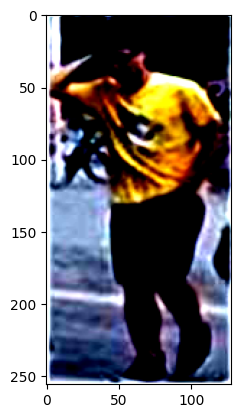

In [12]:
img1 = cv2.imread('Screenshot from 2022-12-05 18-23-11.png')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img1 = transform(img1)

img2 = cv2.imread('Screenshot from 2022-12-05 18-23-25.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
img2 = transform(img2)

img3 = cv2.imread('Screenshot from 2022-12-05 18-27-29.png')
img3 = cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)
img3 = transform(img3)

plt.imshow(img1.permute(1,2,0))

In [ ]:
x1 = model_2(img1.unsqueeze(0).float().cuda())
x2 = model_2(img2.unsqueeze(0).float().cuda())
x3 = model_2(img3.unsqueeze(0).float().cuda())

In [13]:
torch.cdist(x1, x2, p=2.0).detach().cpu()[0][0]

tensor(9.8119)

In [14]:
torch.cdist(x1, x3, p=2.0).detach().cpu()[0][0]

tensor(24.3122)

In [15]:
torch.cdist(x2, x3, p=2.0).detach().cpu()[0][0]

tensor(25.7515)

In [ ]:
img1 = cv2.imread('0002_c1s1_000551_01.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img1 = transform(img1)

img2 = cv2.imread('0002_c1s1_000776_01.jpg')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
img2 = transform(img2)

img3 = cv2.imread('0007_c2s3_071052_01.jpg')
img3 = cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)
img3 = transform(img3)

plt.imshow(img1.permute(1,2,0))

In [28]:
x1 = model_2(img1.unsqueeze(0).float().cuda())
x2 = model_2(img2.unsqueeze(0).float().cuda())
x3 = model_2(img3.unsqueeze(0).float().cuda())

In [29]:
torch.cdist(x1, x2, p=2.0).detach().cpu()[0][0]

tensor(5.4777)

In [30]:
torch.cdist(x1, x3, p=2.0).detach().cpu()[0][0]

tensor(25.9891)

In [31]:
torch.cdist(x2, x3, p=2.0).detach().cpu()[0][0]

tensor(24.8806)

In [ ]:
img1 = cv2.imread('0007_c3s3_077344_04.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img1 = transform(img1)

img2 = cv2.imread('0007_c2s3_071052_01.jpg')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
img2 = transform(img2)

img3 = cv2.imread('0002_c1s1_000551_01.jpg')
img3 = cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)
img3 = transform(img3)

plt.imshow(img1.permute(1,2,0))

In [33]:
x1 = model_2(img1.unsqueeze(0).float().cuda())
x2 = model_2(img2.unsqueeze(0).float().cuda())
x3 = model_2(img3.unsqueeze(0).float().cuda())

In [34]:
torch.cdist(x1, x2, p=2.0).detach().cpu()[0][0]

tensor(7.5681)

In [35]:
torch.cdist(x1, x3, p=2.0).detach().cpu()[0][0]

tensor(25.7958)

In [36]:
torch.cdist(x2, x3, p=2.0).detach().cpu()[0][0]

tensor(25.9891)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


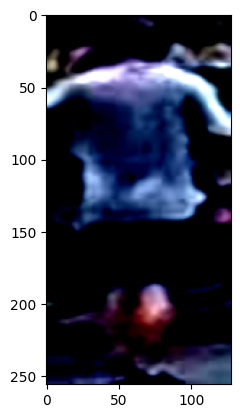

In [14]:
img1 = cv2.imread('0012_c1s1_000776_02.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img1 = transform(img1)

img2 = cv2.imread('0022_c1s1_004051_01.jpg')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
img2 = transform(img2)

img3 = cv2.imread('0035_c5s1_003776_01.jpg')
img3 = cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)
img3 = transform(img3)

plt.imshow(img1.permute(1,2,0))

In [15]:
x1 = model_2(img1.unsqueeze(0).float().cuda())
x2 = model_2(img2.unsqueeze(0).float().cuda())
x3 = model_2(img3.unsqueeze(0).float().cuda())

In [16]:
torch.cdist(x1, x2, p=2.0).detach().cpu().numpy()[0][0]

30.528328

In [45]:
torch.cdist(x1, x3, p=2.0).detach().cpu()[0][0]

tensor(30.4180)

In [46]:
torch.cdist(x2, x3, p=2.0).detach().cpu()[0][0]

tensor(18.2815)

In [1]:
from glob import glob

In [9]:
from sympy.utilities.iterables import multiset_permutations

In [10]:
list(multiset_permutations(['A','B']))

[['A', 'B'], ['B', 'A']]

In [2]:
for indx_i,i in enumerate(glob('reid-data/market1501/bounding_box_train/*.jpg')):
    for indx_j,j in enumerate(glob('reid-data/market1501/bounding_box_train/*.jpg')):       
        if (indx_i == indx_j): continue
        else:
            if i[40:][0:4] == j[40:][0:4]: 
                with open("All_Similars.txt", "a") as f: f.write(f'\n{i}\n{j}')
            else: continue 

In [17]:
with open("All_Similars.txt", "r") as f: 
    x = f.readlines()

In [21]:
mean_value = 0

for i in range(0,len(x),2):
    img1 = cv2.imread(x[i].replace('\n',''))
    img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
    img1 = transform(img1)

    img2 = cv2.imread(x[i+1].replace('\n',''))
    img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
    img2 = transform(img2)
    
    x1 = model_2(img1.unsqueeze(0).float().cuda())
    x2 = model_2(img2.unsqueeze(0).float().cuda())
    
    res = torch.cdist(x1, x2, p=2.0).detach().cpu().numpy()[0][0]
    
    mean_value += (res / (len(x) / 2))

In [22]:
print(f'The Mean Threshhold is {mean_value}')

The Mean Threshhold is 8.15411891935164


In [ ]:
for indx_i,i in enumerate(glob('reid-data/market1501/bounding_box_train/*.jpg')):
    for indx_j,j in enumerate(glob('reid-data/market1501/bounding_box_train/*.jpg')):       
        if (indx_i == indx_j): continue
        else:
            if i[40:][0:4] == j[40:][0:4]: continue
            else: 
                with open("All_diSimilars.txt", "a") as f: f.write(f'\n{i}\n{j}') 